**Universitat Oberta de Catalunya (UOC)**  
**Máster Universitario en Ciencia de Datos**  
**Alumno:** Diego Argüelles García  
**Tutor:** Santiago Rojo Muñoz  
**Título:** Segmentación de clientes y modelos predictivos de fidelización

# Índice

1. [Introducción](#1.-Introducción)
2. [Carga de los datos y primera exploración](#2.-Carga-de-los-datos-y-primera-exploración)
    - 2.1 [Clientes](#2.1-Clientes)
    - 2.2 [Ventas](#2.2-Ventas)
    - 2.3 [Consultas](#2.3-Consultas)
3. [Preprocesado](#3.-Preprocesado)
    - 3.1 [Conversión de campos](#3.1-Conversión-de-campos)
    - 3.2 [Reducción del número de variables](#3.2-Reducción-del-número-de-variables)
    - 3.3 [Asignación de índice al DataFrame clientes](#3.3-Asignación-de-índice-al-DataFrame-clientes)
    - 3.4 [Examen de la distribución](#3.4-Examen-de-la-distribución)
        - 3.4.1 [Examen de la distribución de las variables numéricas](#3.4.1-Examen-de-la-distribución-de-las-variables-numéricas)
        - 3.4.2 [Examen de la distribución de las variables categóricas](#3.4.2-Examen-de-la-distribución-de-las-variables-categóricas)
    - 3.5 [Exclusión de valores de variables categóricas poco representativos](#3.5-Exclusión-de-valores-de-variables-categóricas-poco-representativos)
    - 3.6 [Consolidación de valores de la variable DEPARTAMENTO](#3.6-Consolidación-de-valores-de-la-variable-DEPARTAMENTO)
    - 3.7 [Manejo de valores extremos](#3.7-Manejo-de-valores-extremos)
4. [Primera segmentación](#4.-Primera-segmentación)
    - 4.1 [Normalización de las variables numéricas](#4.1-Normalización-de-las-variables-numéricas)
    - 4.2 [Codificación de FORMAJURIDICA](#4.2-Codificación-de-FORMAJURIDICA)
    - 4.3 [Estandarización de variables](#4.3-Estandarización-de-variables)
    - 4.4 [Determinación de número adecuado de clústeres](#4.4-Determinación-de-número-adecuado-de-clústeres)
    - 4.5 [Segmentación mediante K-MEANS](#4.5-Segmentación-mediante-K-MEANS)
    - 4.6 [Segmentación mediante DBSCAN](#4.6-Segmentación-mediante-DBSCAN)
5. [Segunda segmentación por frecuencia y monto](#5.-Segunda-segmentación-por-frecuencia-y-monto)
    - 5.1 [DBSCAN por frecuencia y monto](#5.1-DBSCAN-por-frecuencia-y-monto)
    - 5.2 [Estudio de la distribución](#5.2-Estudio-de-la-distribución)
    - 5.3 [K-Medoids por frecuencia y monto](#5.3-K-Medoids-por-frecuencia-y-monto)
6. [Segmentación por frecuencia y monto para personas jurídicas](#6.-Segmentación-por-frecuencia-y-monto-para-personas-jurídicas)
    - 6.1 [Preparación del dataframe](#6.1-Preparación-del-dataframe)
    - 6.2 [DBSCAN para frecuencia y monto por persona jurídica](#6.2-DBSCAN-para-frecuencia-y-monto-por-persona-jurídica)
    - 6.3 [Análisis de la distribución de las variables](#6.3-Análisis-de-la-distribución-de-las-variables)
        - 6.3.1 [Análisis de Clústeres en Función de `NUM_COMPRAS` e `IMPORTE_COMPRAS`](#6.3.1-Análisis-de-Clústeres-en-Función-de-NUM_COMPRAS-e-IMPORTE_COMPRAS)
        - 6.3.2 [Análisis Estratégico de Clústeres](#6.3.2-Análisis-Estratégico-de-Clústeres)
7. [Modelo de clasificación](#7.-Modelo-de-clasificación)
    - 7.1 [Preparación del dataframe clientes para personas jurídicas](#7.1-Preparación-del-dataframe-clientes-para-personas-jurídicas)
    - 7.2 [Obtención de nuevos parámetros mediante Feature Engineering](#7.2-Obtención-de-nuevos-parámetros-mediante-Feature-Engineering)
        - 7.2.1 [Feature Engineering aplicado al dataset de ventas](#7.2.1-Feature-Engineering-aplicado-al-dataset-de-ventas)
        - 7.2.2 [Feature Engineering aplicado al dataset de consultas](#7.2.2-Feature-Engineering-aplicado-al-dataset-de-consultas)
    - 7.3 [Ajustes finales](#7.3-Ajustes-finales)
    - 7.4 [Modelo de clasificación con Random Forest](#7.4-Modelo-de-clasificación-con-Random-Forest)
        - 7.4.1 [Interpretación de los resultados del modelo de clasificación Random Forest](#7.4.1-Interpretación-de-los-resultados-del-modelo-de-clasificación-Random-Forest)
    - 7.5 [Balanceo de clases](#7.5-Balanceo-de-clases)
        - 7.5.1 [Interpretación de los resultados del balanceo de clases](#7.5.1-Interpretación-de-los-resultados-del-balanceo-de-clases)
    - 7.6 [Modelo de clasificación con XGBClassifier](#7.6-Modelo-de-clasificación-con-XGBClassifier)
        - 7.6.1 [Interpretación de resultados del modelo XGBoost](#7.6.1-Interpretación-de-resultados-del-modelo-XGBoost)
    - 7.7 [Modelo de clasificación con XGBClassifier y ajuste del peso relativo de las clases](#7.7-Modelo-de-clasificación-con-XGBClassifier-y-ajuste-del-peso-relativo-de-las-clases)
        - 7.7.1 [Interpretación de los resultados del modelo XGBoost con `sample_weight`](#7.7.1-Interpretación-de-los-resultados-del-modelo-XGBoost-con-sample_weight)
        - 7.7.2 [Visualización de la importancia de las variables](#7.7.2-Visualización-de-la-importancia-de-las-variables)
8. [Recomendaciones para CrossSelling, Upselling y Fidelización](#8.-Recomendaciones-para-CrossSelling,-Upselling-y-Fidelización)
    - 8.1 [Recomendaciones para CrossSelling, Upselling y Fidelización entre los grupos de prioridad moderada y prioridad alta](#8.1-Recomendaciones-para-CrossSelling,-Upselling-y-Fidelización-entre-los-grupos-de-prioridad-moderada-y-prioridad-alta)
    - 8.2 [Recomendaciones para CrossSelling, Upselling y Fidelización entre los grupos de prioridad baja y prioridad moderada](#8.2-Recomendaciones-para-CrossSelling,-Upselling-y-Fidelización-entre-los-grupos-de-prioridad-baja-y-prioridad-moderada)

# 1. Introducción

# 2. Carga de los datos y primera exploración

Trabajaremos con tres datasets, cada uno con información específica sobre los clientes y su interacción con el sistema:

- **CLIENTES**: Contiene 9512 registros que describen las características y atributos de los clientes.  
  - **Información general:**
    - Fecha de la primera compra.  
    - Fecha de registro.  
    - Canal de procedencia.  
    - Tipo de cliente: persona jurídica o física.  
  - **Información adicional para personas jurídicas (empresas y empresarios):**
    - Ubicación de la sede social.  
    - Tamaño de la empresa.  
    - Antigüedad.  
    - Forma jurídica.  
    - Estado actual.  
    - Sector de actividad.  
  - **Variables adicionales:**  
    - Datos agrupados sobre consumos y ventas realizadas por el cliente.

- **VENTAS**: Incluye 20537 registros que detallan las compras realizadas por los clientes.

- **CONSULTAS**: Contiene 910738 registros correspondientes al log de consultas realizadas por los clientes en la web.

Todos los datasets están relacionados a través del campo **ID**, que identifica de manera única a cada cliente.

## 2.1 Clientes
Procedemos a cargar la información del dataset CLIENTES.txt y realizar un primer análisis de los datos cargados.

In [6]:
import pandas as pd

# Ruta al archivo
ruta_archivo = r"C:\Users\diego\OneDrive\Desktop\UOC\Semestre 4\TFM\Codigo2\Datos\clientes.txt"

# Cargar el archivo especificando la codificación
clientes_df = pd.read_csv(ruta_archivo, sep="|", encoding="latin-1")

# Mostrar las primeras filas del DataFrame
display(clientes_df.head())

ID      FECHA_REGISTRO CANAL_REGISTRO       FECHA_CLIENTE  \
0  6384286  15/3/2017 15:24:29            WEB  15/3/2017 15:36:22   
1  6384667  15/3/2017 19:18:31            WEB   8/3/2018 11:01:32   
2  6389279  21/3/2017 11:39:08            WEB  21/3/2017 11:39:11   
3  6387954  18/3/2017 19:47:34    Directorios  24/5/2017 22:05:19   
4  6383269   15/3/2017 6:58:58    Directorios   15/3/2017 7:07:12   

   CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA SECTOR  \
0                       0  PERSONA FISICA      9   
1                       0        SOCIEDAD      K   
2                       0        SOCIEDAD      N   
3                       0  PERSONA FISICA      9   
4                       0  PERSONA FISICA      9   

                                         DESC_SECTOR  ESTADO DEPARTAMENTO  \
0                                           NOSECTOR    VIVA          NaN   
1               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA   
2  ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...  ACTIVA      BOLIVAR   
3                                           NOSECTOR    VIVA          NaN   
4                                           NOSECTOR    VIVA          NaN   

    TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
0      NaN             NaN            0             11   
1    MICRO  De 5 a 10 Años          358              1   
2  PEQUEÑA  Más de 10 Años            0             75   
3      NaN             NaN           67             61   
4      NaN             NaN            0              1   

   EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  
0                       3            1               35  
1                       1            1               15  
2                      36           38              904  
3                      10           13              684  
4                       1            1               22

In [7]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      9512 non-null   int64 
 1   FECHA_REGISTRO          9512 non-null   object
 2   CANAL_REGISTRO          9512 non-null   object
 3   FECHA_CLIENTE           9512 non-null   object
 4   CLIENTEPORCAMPAÑAEMAIL  9512 non-null   int64 
 5   FORMAJURIDICA           9512 non-null   object
 6   SECTOR                  9512 non-null   object
 7   DESC_SECTOR             9512 non-null   object
 8   ESTADO                  9512 non-null   object
 9   DEPARTAMENTO            3912 non-null   object
 10  TAMAÑO                  3912 non-null   object
 11  ANTIGUEDAD              3912 non-null   object
 12  DIASCLIENTE             9512 non-null   int64 
 13  CONSUMOSTOTAL           9512 non-null   int64 
 14  EMPRESASUNICAS_CONSULT  9512 non-null   int64 
 15  NUM_

Comprobamos que este dataset está compuesto de **9.512 entradas** con **17 columnas**, que se corresponden con los siguientes campos:

### Campos principales:
- **ID**: Identificador único del cliente.
- **FECHA_REGISTRO**: Fecha en que el cliente se registró en la web.
- **CANAL_REGISTRO**: Canal por el que el cliente fue captado.
- **FECHA_CLIENTE**: Fecha de la primera compra del cliente.
- **CLIENTEPORCAMPAÑAEMAIL**: Indica si la primera compra se produjo a raíz de una campaña de email (1 sí, 0 no).
- **FORMAJURIDICA**: Forma societaria del cliente (persona física o jurídica). Posibles valores:
   1. ADMINISTRACION
   2. EMBAJADAS Y ORGANISMOS INTERNACIONALES
   3. EMPRESARIO
   4. ESAL (Empresa sin Ánimo de Lucro)
   5. PERSONA FISICA (sin sociedad ni actividad empresarial)
   6. SOCIEDAD Colombiana (SAS, SA, LTDA, etc.)
   7. SOCIEDAD EXTRANJERA (matriz en el extranjero)
- **SECTOR** y **DESC_SECTOR**: Indican el sector de actividad del cliente. Estos dos campos son redundantes y se evaluará cuál conservar.
- **ESTADO**: Situación actual del cliente. Posibles valores:
   - ACTIVA
   - EXTINGUIDA
   - INACTIVA
   - INSOLVENTE
   - VIVA (solo personas físicas)
- **DEPARTAMENTO**: Departamento de residencia en Colombia. Tiene valores faltantes (~59%).
- **TAMAÑO**: Tamaño de la sociedad (no aplicable a personas físicas). Posibles valores:
   1. GRANDE
   2. MEDIANA
   3. MICRO
   4. PEQUEÑA
   5. SIN DETERMINAR
- **ANTIGUEDAD**: Antigüedad de la sociedad (no aplicable a personas físicas). Posibles valores:
   - Menos de 3 Meses
   - De 3 a 18 Meses
   - De 18 Meses a 3 Años
   - De 3 a 5 Años
   - De 5 a 10 Años
   - Más de 10 Años
   - SIN FECHA DE CONSTITUCION

### Métricas de actividad:
- **DIASCLIENTE**: Días transcurridos entre la fecha de registro y la primera compra.
- **CONSUMOSTOTAL**: Número total de consumos o consultas realizadas por el cliente.
- **EMPRESASUNICAS_CONSUL**: Número de empresas únicas consultadas por el cliente.
- **NUM_COMPRAS**: Número de compras realizadas por el cliente.
- **IMPORTE_COMPRAS**: Importe total de las compras efectuadas por el cliente.

### Observaciones iniciales:
1. **Valores faltantes:** Las columnas `DEPARTAMENTO`, `TAMAÑO` y `ANTIGUEDAD` presentan un 59% de valores nulos, lo que requerirá tratamiento.
2. **Redundancia:** Evaluaremos si conservar `SECTOR` o `DESC_SECTOR` según su utilidad en el análisis.
3. **Conversión de tipos:** Las fechas se transformarán a tipo `datetime` para análisis temporal.


**Valores faltantes:**
- DEPARTAMENTO: Solo 3912 de las 9512 filas tienen valores.
- TAMAÑO: Solo 3912 de las 9512 filas tienen valores
- ANTIGUEDAD: Solo 3912 de las 9512 filas tienen valores.

A continuación procedemos a un estudio en mayor profundidad acerca de la naturaleza de los valores nulos presentes en clientes.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Verificamos la existencia de valores nulos y vacíos
summary_data = []
for column in clientes_df.columns:
    nan_count = clientes_df[column].isnull().sum()
    empty_count = (clientes_df[column] == "").sum()
    summary_data.append([column, nan_count, empty_count])

summary_df = pd.DataFrame(summary_data, columns=["Campo", "Valores nulos", "Valores vacios"])
summary_df.set_index("Campo", inplace=True)

# Mostramos el resumen de valores nulos y vacíos
display(summary_df)

Valores nulos  Valores vacios
Campo                                                
ID                                  0               0
FECHA_REGISTRO                      0               0
CANAL_REGISTRO                      0               0
FECHA_CLIENTE                       0               0
CLIENTEPORCAMPAÑAEMAIL              0               0
FORMAJURIDICA                       0               0
SECTOR                              0               0
DESC_SECTOR                         0               0
ESTADO                              0               0
DEPARTAMENTO                     5600               0
TAMAÑO                           5600               0
ANTIGUEDAD                       5600               0
DIASCLIENTE                         0               0
CONSUMOSTOTAL                       0               0
EMPRESASUNICAS_CONSULT              0               0
NUM_COMPRAS                         0               0
IMPORTE_COMPRAS                     0               0

Vemos que no hay valores vacíos y que los valores nulos (5600 en cada caso) se concentran en los campos ESTADO, DEPARTAMENTO y ANTIGUEDAD. A continuación procedemos a buscar si existe una conexión que pueda explicar o justificar esos

In [12]:
# Filtrar filas con valores nulos o vacíos
rows_with_issues = clientes_df[(clientes_df.isnull().any(axis=1)) | (clientes_df == "").any(axis=1)]

# Verificar valores únicos en columnas categóricas
categorical_columns = clientes_df.select_dtypes(include=["object"]).columns
unique_values_summary = {
    col: ", ".join(map(str, rows_with_issues[col].dropna().unique())) for col in categorical_columns
}

# Crear un DataFrame con los valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_summary, orient="index", columns=["Valores unicos"])

# Mostrar valores únicos
display(unique_values_df)

Valores unicos
FECHA_REGISTRO  15/3/2017 15:24:29, 18/3/2017 19:47:34, 15/3/2...
CANAL_REGISTRO                              WEB, Directorios, SEM
FECHA_CLIENTE   15/3/2017 15:36:22, 24/5/2017 22:05:19, 15/3/2...
FORMAJURIDICA                                      PERSONA FISICA
SECTOR                                                          9
DESC_SECTOR                                              NOSECTOR
ESTADO                                                       VIVA
DEPARTAMENTO                                                     
TAMAÑO                                                           
ANTIGUEDAD

Tras analizar los valores únicos de las columnas categóricas correspondientes a las filas con valores nulos o vacíos, llegamos a las siguientes conclusiones:

1. **Campos afectados por valores nulos:**
   - Los valores nulos se concentran exclusivamente en las columnas `DEPARTAMENTO`, `TAMAÑO` y `ANTIGUEDAD`.

2. **Patrones observados:**
   - Todas las filas con valores nulos tienen:
     - `FORMAJURIDICA`: PERSONA FISICA.
     - `ESTADO`: IVA.
     - `SECTOR` y `DESC_SECTOR`: Valores genéricos (`9` y `NOSECTOR`).
   - Esto indica que estas columnas (`DEPARTAMENTO`, `TAMAÑO`, `ANTIGUEDAD`) no son aplicables a clientes de tipo persona física.

3. **Conclusión:**
   - Los valores nulos no representan un problema de calidad de datos, sino que reflejan la naturaleza de los clientes de tipo persona física, quienes no tienen información en estas columnas debido a su irrelevancia en este contexto.

Esto nos sugiere la posibilidad de optar por una segregación de datos en una fase posterior durante el análisis, dividiendo el dataset en dos subconjuntos:
     - **Personas físicas:** Para excluir del análisis las columnas no aplicables.
     - **Personas jurídicas:** Donde `DEPARTAMENTO`, `TAMAÑO` y `ANTIGÜEDAD` son relevantes.
     
Por último, comprobamos que no haya entradas con el valor del campo ID duplicado.

In [14]:
# Verificar si hay IDs duplicados
id_duplicados = clientes_df[clientes_df.duplicated(subset=['ID'], keep=False)]

if id_duplicados.empty:
    print("No hay IDs duplicados en el DataFrame.")
else:
    print(f"Se encontraron {id_duplicados.shape[0]} IDs duplicados.")
    display(id_duplicados)

No hay IDs duplicados en el DataFrame.


## 2.2 Ventas
Procedemos a cargar la información del dataset VENTAS.txt y realizar un primer análisis de los datos cargados.

In [16]:
# Ruta al archivo
ruta_archivo_ventas = r"C:\Users\diego\OneDrive\Desktop\UOC\Semestre 4\TFM\Codigo2\Datos\ventas.txt"

# Cargar el archivo especificando la codificación
ventas_df = pd.read_csv(ruta_archivo_ventas, sep="|", encoding="latin-1")

# Mostrar las primeras filas del DataFrame
display(ventas_df.head())

ID         FECHAVENTA PRODUCTOCOMPRADO CANALVENTA  IMPORTE
0  6389279  21/3/2017 0:00:00       VP Informe        WEB       22
1  6389989  21/3/2017 0:00:00       VP Informe        WEB       15
2  6329507   1/2/2017 0:00:00       VP Informe        WEB       35
3  6326580   1/2/2017 0:00:00       VP Informe        WEB       22
4  6326580   1/2/2017 0:00:00       VP Informe        WEB       22

In [17]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20537 entries, 0 to 20536
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                20537 non-null  int64 
 1   FECHAVENTA        20537 non-null  object
 2   PRODUCTOCOMPRADO  20537 non-null  object
 3   CANALVENTA        20537 non-null  object
 4   IMPORTE           20537 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 802.4+ KB


**Descripción del dataset:**
- El dataset está compuesto por **20,537 entradas** y **5 columnas**:
  - **ID:** Identificador único del cliente que ha realizado la compra. Este campo actúa como clave principal para relacionar este dataset con el fichero de clientes. El campo `NUM_COMPRAS` en el fichero de clientes agrega todas las compras efectuadas por el cliente.
  - **FECHAVENTA:** Fecha en que se produjo la venta (compra por parte del cliente).
  - **PRODUCTOCOMPRADO:** Producto comprado por parte del cliente.  
    **Posibles valores:**
    1. Bono: Compra de saldo para consumir productos con una vigencia de 12 meses.
    2. Listado: Compra puntual de un listado o fichero de datos parametrizado para el cliente.
    3. Plan: Suscripción válida para 6 meses, con pagos mensuales y acceso a un conjunto de productos.
    4. Ranking: Compra puntual de un listado con información predefinida, como las principales empresas de un sector.
    5. VP Informe: Venta puntual de un informe específico.
  - **CANALVENTA:** Canal a través del cual se produjo la compra por parte del cliente.  
    **Posibles valores:**
    - CALLCENTER
    - WEB
  - **IMPORTE:** Importe de la compra realizada por el cliente. El campo `IMPORTE_COMPRAS` del fichero de clientes representa un agregado de este campo para cada cliente.

**Observaciones iniciales:**
- No hay valores nulos en este dataset.
- `FECHAVENTA` está en formato `object` y debería ser convertida a `datetime` para análisis temporal.
- Los datos permiten analizar patrones de compra según el producto y el canal.

In [19]:
# Agrupar los datos de ventas por ID para calcular el importe total y número de compras
ventas_agrupadas = ventas_df.groupby('ID').agg(
    total_importe_ventas=('IMPORTE', 'sum'),
    total_num_compras=('IMPORTE', 'count')  # El número de compras es el número de registros
).reset_index()

# Combinar los datos agregados con el fichero de clientes usando la clave ID
coherencia_ventas_df = pd.merge(
    clientes_df[['ID', 'IMPORTE_COMPRAS', 'NUM_COMPRAS']],  # Seleccionamos solo las columnas necesarias
    ventas_agrupadas,
    on='ID',
    how='inner'  # Nos Aseguramos de considerar solo los IDs comunes a ambos DataFrames
)

# Comprobar coherencia
coherencia_ventas_df['importe_coherente'] = coherencia_ventas_df['IMPORTE_COMPRAS'] == coherencia_ventas_df['total_importe_ventas']
coherencia_ventas_df['num_compras_coherente'] = coherencia_ventas_df['NUM_COMPRAS'] == coherencia_ventas_df['total_num_compras']

# Calcular el porcentaje de inconsistencias por separado
porcentaje_inconsistencias_importe = 100 * len(coherencia_ventas_df[~coherencia_ventas_df['importe_coherente']]) / len(coherencia_ventas_df)
porcentaje_inconsistencias_num_compras = 100 * len(coherencia_ventas_df[~coherencia_ventas_df['num_compras_coherente']]) / len(coherencia_ventas_df)

print(f"Porcentaje de inconsistencias en 'IMPORTE_COMPRAS': {porcentaje_inconsistencias_importe:.2f}%")
print(f"Porcentaje de inconsistencias en 'NUM_COMPRAS': {porcentaje_inconsistencias_num_compras:.2f}%")

# Resumen de inconsistencias detalladas
inconsistencias_ventas = coherencia_ventas_df[
    (coherencia_ventas_df['importe_coherente'] == False) | (coherencia_ventas_df['num_compras_coherente'] == False)
]

# Mostrar el número total de inconsistencias
print(f"Total de registros con inconsistencias: {len(inconsistencias_ventas)}")
display(inconsistencias_ventas)

Porcentaje de inconsistencias en 'IMPORTE_COMPRAS': 0.00%
Porcentaje de inconsistencias en 'NUM_COMPRAS': 0.00%
Total de registros con inconsistencias: 0


Empty DataFrame
Columns: [ID, IMPORTE_COMPRAS, NUM_COMPRAS, total_importe_ventas, total_num_compras, importe_coherente, num_compras_coherente]
Index: []

Hemos realizado una comprobación para evaluar la coherencia de los datos entre los datasets `CLIENTES` y `VENTAS`. Específicamente, verificamos:

1. **IMPORTE_COMPRAS:** Si el importe total agregado en el dataset `VENTAS` coincide con el valor reportado en el campo correspondiente en el dataset `CLIENTES`.
2. **NUM_COMPRAS:** Si el número de compras total en el dataset `VENTAS` coincide con el valor reportado en el campo correspondiente en el dataset `CLIENTES`.

**Resultados obtenidos:**
- El porcentaje de inconsistencias en `IMPORTE_COMPRAS` es del **0.00%**.
- El porcentaje de inconsistencias en `NUM_COMPRAS` es del **0.00%**.
- El número total de registros con inconsistencias es **0**.

**Interpretación:**
- Los datos en ambos datasets son completamente coherentes, lo que indica que:
  - La agregación realizada en el dataset `CLIENTES` para los campos `IMPORTE_COMPRAS` y `NUM_COMPRAS` es correcta.
  - No hay registros duplicados o discrepancias entre los dos datasets.
- Esto refleja una alta calidad de los datos en relación con las ventas, lo que facilita el análisis posterior sin necesidad de correcciones adicionales.

**Conclusión:**
La validación confirma que no es necesario realizar ajustes en los datos relacionados con `VENTAS` y `CLIENTES`. Podemos proceder con los análisis restantes, sabiendo que los datos de ambos datasets están correctamente alineados.

## 2.3 Consultas
Procedemos a cargar la información del dataset CONSULTAS.txt y realizar un primer análisis de los datos cargados.

In [22]:
# Ruta al archivo
ruta_archivo_consultas = r"C:\Users\diego\OneDrive\Desktop\UOC\Semestre 4\TFM\Codigo2\Datos\consultas.txt"

# Cargar el archivo especificando la codificación
consultas_df = pd.read_csv(ruta_archivo_consultas, sep="|", encoding="latin-1")

# Mostrar las primeras filas del DataFrame
display(consultas_df.head())

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\806777569.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  consultas_df = pd.read_csv(ruta_archivo_consultas, sep="|", encoding="latin-1")


IDCONSUMO       ID        FECHACONSUMO PRODUCTO       EMPCONSUL_ICI  \
0   76672021  7344051  19/12/2022 0:00:00    Ficha  1700503357600000.0   
1   76672026  7344051  19/12/2022 0:00:00    Ficha  1700012074500000.0   
2   76672035  6371831  19/12/2022 0:00:00    Ficha  1700015801700000.0   
3   76672380  6500105  19/12/2022 0:00:00    Ficha  1700180438500000.0   
4   76671375  7344051  19/12/2022 0:00:00    Ficha  1700547322700000.0   

  EMPCONSUL_SECTOR EMPCONSUL_TAMAÑO EMPCONSUL_DEPARTAMENTO EMPCONSUL_ESTADO  
0                I          PEQUEÑA                BOLIVAR           ACTIVA  
1                C          PEQUEÑA                 BOGOTA           ACTIVA  
2                C            MICRO           CUNDINAMARCA           ACTIVA  
3                G          PEQUEÑA           CUNDINAMARCA           ACTIVA  
4                C            MICRO                BOLIVAR           ACTIVA

In [23]:
consultas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960805 entries, 0 to 960804
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   IDCONSUMO               960805 non-null  int64 
 1   ID                      960805 non-null  int64 
 2   FECHACONSUMO            960805 non-null  object
 3   PRODUCTO                960805 non-null  object
 4   EMPCONSUL_ICI           960589 non-null  object
 5   EMPCONSUL_SECTOR        958330 non-null  object
 6   EMPCONSUL_TAMAÑO        958304 non-null  object
 7   EMPCONSUL_DEPARTAMENTO  958322 non-null  object
 8   EMPCONSUL_ESTADO        958330 non-null  object
dtypes: int64(2), object(7)
memory usage: 66.0+ MB


Procedemos a cargar la información del dataset `CONSULTAS.txt` y realizar un primer análisis de los datos cargados.

**Descripción del dataset:**
- El dataset está compuesto por **960,805 entradas** y **9 columnas**:
  - **IDCONSUMO:** Identificador único de cada consumo o consulta. El campo `CONSUMOSTOTAL` del fichero de clientes representa un agregado de este campo para cada cliente.
  - **ID:** Identificador del cliente que ha realizado la consulta. Este campo actúa como clave principal para relacionar este dataset con el fichero de clientes.
  - **FECHACONSUMO:** Fecha en la que se realizó la consulta.
  - **PRODUCTO:** Tipo de consulta realizada.  
    **Posibles valores:**
    1. Balance y CR: Producto Modular con datos financieros.
    2. Ficha: Datos básicos de identificación.
    3. Perfil: Reporte básico.
    4. Perfil Promocional: Producto promocional al registrarse. Reporte básico.
    5. Reporte Comercial: Reporte sin datos financieros.
    6. Reporte Financiero: Reporte Comercial con datos financieros.
    7. Riesgo: Producto modular para evaluación de riesgo crediticio.
  - **EMPCONSUL_ICI:** Identificador de la empresa sobre la cual se realizó la consulta. El campo `EMPRESASUNICAS_CONSUL` del fichero de clientes representa un agregado de este campo para cada cliente.
  - **EMPCONSUL_SECTOR:** Sector de actividad de la empresa consultada.
  - **EMPCONSUL_TAMAÑO:** Tamaño de la empresa consultada.  
    **Posibles valores:**
    - GRANDE
    - MEDIANA
    - MICRO
    - PEQUEÑA
    - SIN DETERMINAR
  - **EMPCONSUL_DEPARTAMENTO:** Departamento de Colombia en el que se ubica la empresa consultada.
  - **EMPCONSUL_ESTADO:** Situación de la empresa consultada.  
    **Posibles valores:**
    - ACTIVA
    - EXTINGUIDA
    - INACTIVA
    - INSOLVENTE

**Observaciones iniciales:**
1. **Tamaño del dataset:** Este es el dataset más grande hasta ahora, con más de 960,000 registros, lo que representa un alto volumen de interacciones de clientes.
2. **Valores nulos:** Algunas columnas contienen valores nulos:
   - **EMPCONSUL_ICI:** 216 valores nulos.
   - **EMPCONSUL_SECTOR:** 2,475 valores nulos.
   - **EMPCONSUL_TAMAÑO:** 2,501 valores nulos.
   - **EMPCONSUL_DEPARTAMENTO:** 2,483 valores nulos.
   - **EMPCONSUL_ESTADO:** 2,475 valores nulos.
   Esto podría requerir tratamiento dependiendo de la relevancia de estas columnas para el análisis.

**Conclusión inicial:**
El dataset `CONSULTAS` proporciona información detallada sobre las interacciones de los clientes con el sistema, incluyendo el tipo de consulta realizada y las características de las empresas consultadas. Esta información será clave para analizar el comportamiento de los clientes y las tendencias en las consultas realizadas

In [25]:
# Agrupar los datos de consultas por ID para calcular el total de consumos y empresas únicas
consultas_agrupadas = consultas_df.groupby('ID').agg(
    total_consumos=('IDCONSUMO', 'nunique'),  # Total de consultas únicas
    empresas_unicas=('EMPCONSUL_ICI', 'nunique')  # Empresas únicas consultadas
).reset_index()

# Combinar los datos agregados con clientes_df usando una fusión (incluir todos los clientes)
clientes_merged = clientes_df.merge(
    consultas_agrupadas,
    on='ID',
    how='left'  # Usamos left para mantener todos los clientes
)

clientes_merged['total_consumos'] = clientes_merged['total_consumos'].fillna(0)
clientes_merged['empresas_unicas'] = clientes_merged['empresas_unicas'].fillna(0)

# Recalcular coherencia
clientes_merged['consumos_coherente'] = clientes_merged['CONSUMOSTOTAL'] == clientes_merged['total_consumos']
clientes_merged['empresas_coherente'] = clientes_merged['EMPRESASUNICAS_CONSULT'] == clientes_merged['empresas_unicas']

# Calcular porcentajes de inconsistencias
porcentaje_inconsistencias_consumos = 100 * (clientes_merged['consumos_coherente'] == False).mean()
porcentaje_inconsistencias_empresas = 100 * (clientes_merged['empresas_coherente'] == False).mean()

# Mostrar resultados
print(f"Porcentaje de inconsistencias en 'CONSUMOSTOTAL': {porcentaje_inconsistencias_consumos:.2f}%")
print(f"Porcentaje de inconsistencias en 'EMPRESASUNICAS_CONSULT': {porcentaje_inconsistencias_empresas:.2f}%")


Porcentaje de inconsistencias en 'CONSUMOSTOTAL': 56.18%
Porcentaje de inconsistencias en 'EMPRESASUNICAS_CONSULT': 60.19%


**Porcentajes de Inconsistencias**
- **CONSUMOSTOTAL:** El **56.18%** de los registros tiene inconsistencias entre el total de consumos reportado en el dataset `CLIENTES` y el número de consultas únicas en el dataset `CONSULTAS`.
- **EMPRESASUNICAS_CONSULT:** El **60.19%** de los registros tiene inconsistencias entre el número de empresas únicas reportado en `CLIENTES` y el número de empresas consultadas en `CONSULTAS`.

# 3. Preprocesado

## 3.1 Conversión de campos
Comenzaremos por convertir a datetime los campos de fecha de clientes (`FECHA_REGISTRO` y `FECHA_CLIENTE`) para poder trabajar mejor con ellos.

In [28]:
# Convertir campos de fecha en el DataFrame de clientes al tipo datetime
clientes_df['FECHA_REGISTRO'] = pd.to_datetime(clientes_df['FECHA_REGISTRO'], errors='coerce', dayfirst=True)
clientes_df['FECHA_CLIENTE'] = pd.to_datetime(clientes_df['FECHA_CLIENTE'], errors='coerce', dayfirst=True)

# Verificamos la conversión
print(clientes_df.dtypes)

ID                                 int64
FECHA_REGISTRO            datetime64[ns]
CANAL_REGISTRO                    object
FECHA_CLIENTE             datetime64[ns]
CLIENTEPORCAMPAÑAEMAIL             int64
FORMAJURIDICA                     object
SECTOR                            object
DESC_SECTOR                       object
ESTADO                            object
DEPARTAMENTO                      object
TAMAÑO                            object
ANTIGUEDAD                        object
DIASCLIENTE                        int64
CONSUMOSTOTAL                      int64
EMPRESASUNICAS_CONSULT             int64
NUM_COMPRAS                        int64
IMPORTE_COMPRAS                    int64
dtype: object


Convertimos también `FECHACONSUMO`

In [30]:
# Convertir el campo FECHACONSUMO a tipo datetime
consultas_df['FECHACONSUMO'] = pd.to_datetime(consultas_df['FECHACONSUMO'], errors='coerce', dayfirst=True)

# Verificar la conversión
print(consultas_df.dtypes)

IDCONSUMO                          int64
ID                                 int64
FECHACONSUMO              datetime64[ns]
PRODUCTO                          object
EMPCONSUL_ICI                     object
EMPCONSUL_SECTOR                  object
EMPCONSUL_TAMAÑO                  object
EMPCONSUL_DEPARTAMENTO            object
EMPCONSUL_ESTADO                  object
dtype: object


A continuación sustituiremos los valores 0 y 1 del campo `CLIENTEPORCAMPAÑAEMAIL` por algo más descriptivo con el fin de evitar errores.

In [32]:
# Sustituir los valores 0 y 1 por descripciones más claras
clientes_df['CLIENTEPORCAMPAÑAEMAIL'] = clientes_df['CLIENTEPORCAMPAÑAEMAIL'].replace({0: 'No Campaña', 1: 'Por Campaña'})

# Comprobamos que se ha producido el cambio
print(clientes_df['CLIENTEPORCAMPAÑAEMAIL'].unique())

['No Campaña' 'Por Campaña']


## 3.2 Reducción del número de variables

Tenemos tres variables con información relativa al tiempo que un cliente ha sido cliente y a realizado compras:
- `FECHA_CLIENTE`: Fecha en la que el cliente realizo la primera compra.
- `FECHA_REGISTRO`: Fecha en la que el cliente se registró.
- `DIASCLIENTE`: Días transcurridos desde la fecha de registro y la fecha de la primera compra.

Podemos quedarnos con la información de `DIASCLIENTE` y eliminar los otros dos campos al no aportarnos información adicional. Primero comprobaremos que la información de `DIASCLIENTES` es correcta cotejandola con `FECHA_CLIENTE` y `FECHA_REGISTRO` por cada cliente. Si esta no fuese correcta, la sustituiríamos por el valor correcto calculado conforme a los valores de `FECHA_CLIENTE` y `FECHA_REGISTRO` que estimaremos se han introducido correctamente. Después eliminaremos los campos `FECHA_CLIENTE` y `FECHA_REGISTRO` para reducir información redundante. Guardaremos la información en un nuevo dataframe clientes_optimizados_df.

In [34]:
# Crear una copia del dataframe original
clientes_optimizados_df = clientes_df.copy()

# Convertir fechas a formato datetime y normalizarlas (eliminar componente de hora)
clientes_optimizados_df['FECHA_REGISTRO'] = pd.to_datetime(clientes_optimizados_df['FECHA_REGISTRO'], dayfirst=True).dt.normalize()
clientes_optimizados_df['FECHA_CLIENTE'] = pd.to_datetime(clientes_optimizados_df['FECHA_CLIENTE'], dayfirst=True).dt.normalize()

# Calcular la diferencia en días entre 'FECHA_REGISTRO' y 'FECHA_CLIENTE'
clientes_optimizados_df['DIASCLIENTE_CALCULADO'] = (clientes_optimizados_df['FECHA_CLIENTE'] - clientes_optimizados_df['FECHA_REGISTRO']).dt.days

# Comparar los valores de 'DIASCLIENTE' y 'DIASCLIENTE_CALCULADO'
diferencias = clientes_optimizados_df['DIASCLIENTE'] != clientes_optimizados_df['DIASCLIENTE_CALCULADO']
numero_diferencias = diferencias.sum()
porcentaje_diferencias = (numero_diferencias / len(clientes_optimizados_df)) * 100

print(f"Porcentaje de diferencias entre 'DIASCLIENTE' y 'DIASCLIENTE_CALCULADO': {porcentaje_diferencias:.2f}%")

# Reemplazar los valores de 'DIASCLIENTE' con los calculados en caso de discrepancia
clientes_optimizados_df.loc[diferencias, 'DIASCLIENTE'] = clientes_optimizados_df['DIASCLIENTE_CALCULADO']

# Eliminar columnas redundantes
clientes_optimizados_df.drop(columns=['FECHA_REGISTRO', 'FECHA_CLIENTE', 'DIASCLIENTE_CALCULADO'], inplace=True)

# Mostrar el dataframe optimizado
print("Datos optimizados:")
display(clientes_optimizados_df.head())


Porcentaje de diferencias entre 'DIASCLIENTE' y 'DIASCLIENTE_CALCULADO': 2.24%
Datos optimizados:


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA SECTOR  \
0  6384286            WEB             No Campaña  PERSONA FISICA      9   
1  6384667            WEB             No Campaña        SOCIEDAD      K   
2  6389279            WEB             No Campaña        SOCIEDAD      N   
3  6387954    Directorios             No Campaña  PERSONA FISICA      9   
4  6383269    Directorios             No Campaña  PERSONA FISICA      9   

                                         DESC_SECTOR  ESTADO DEPARTAMENTO  \
0                                           NOSECTOR    VIVA          NaN   
1               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA   
2  ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...  ACTIVA      BOLIVAR   
3                                           NOSECTOR    VIVA          NaN   
4                                           NOSECTOR    VIVA          NaN   

    TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
0      NaN             NaN            0             11   
1    MICRO  De 5 a 10 Años          358              1   
2  PEQUEÑA  Más de 10 Años            0             75   
3      NaN             NaN           67             61   
4      NaN             NaN            0              1   

   EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  
0                       3            1               35  
1                       1            1               15  
2                      36           38              904  
3                      10           13              684  
4                       1            1               22

Tenemos dos campos relativos al sector de actividad en el dataset clientes, un campo representa la descripción del sector y el otro codifica el sector, comprobaremos que cada `DESC_SECTOR` se corresponde siempre con el mismo `SECTOR` y eliminaremos `SECTOR` por ser redundante y menos informativa.

In [36]:
# Agrupar por 'SECTOR' y verificar los valores únicos de 'DESC_SECTOR' que existen para cada valor de 'SECTOR'
sectores_descripciones = clientes_optimizados_df.groupby('SECTOR')['DESC_SECTOR'].nunique()

# Verificar si cada valor de 'SECTOR' se corresponde con un único valor de 'DESC_SECTOR'
sectores_multiple_desc = sectores_descripciones[sectores_descripciones > 1]

# Mostrar los sectores con múltiples descripciones si existen
if len(sectores_multiple_desc) > 0:
    print("Existen sectores que se corresponden con más de una descripción:")
    print(sectores_multiple_desc)
else:
    print("Cada valor de 'SECTOR' tiene una única correspondencia con 'DESC_SECTOR'. Se podría prescindir de uno de los dos campos.")

Cada valor de 'SECTOR' tiene una única correspondencia con 'DESC_SECTOR'. Se podría prescindir de uno de los dos campos.


Tras comprobar que cada valor de 'SECTOR' tiene una única correspondencia con 'DESC_SECTOR' eliminamos el campo 'SECTOR' por superfluo.

In [38]:
# Eliminar la columna 'SECTOR' del DataFrame
clientes_optimizados_df = clientes_optimizados_df.drop(columns=['SECTOR'])

print("Columna 'SECTOR' eliminada. Resumen de los datos actualizados:")
display(clientes_optimizados_df.head())

Columna 'SECTOR' eliminada. Resumen de los datos actualizados:


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
0  6384286            WEB             No Campaña  PERSONA FISICA   
1  6384667            WEB             No Campaña        SOCIEDAD   
2  6389279            WEB             No Campaña        SOCIEDAD   
3  6387954    Directorios             No Campaña  PERSONA FISICA   
4  6383269    Directorios             No Campaña  PERSONA FISICA   

                                         DESC_SECTOR  ESTADO DEPARTAMENTO  \
0                                           NOSECTOR    VIVA          NaN   
1               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA   
2  ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...  ACTIVA      BOLIVAR   
3                                           NOSECTOR    VIVA          NaN   
4                                           NOSECTOR    VIVA          NaN   

    TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
0      NaN             NaN            0             11   
1    MICRO  De 5 a 10 Años          358              1   
2  PEQUEÑA  Más de 10 Años            0             75   
3      NaN             NaN           67             61   
4      NaN             NaN            0              1   

   EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  
0                       3            1               35  
1                       1            1               15  
2                      36           38              904  
3                      10           13              684  
4                       1            1               22

## 3.3 Asignación de índice al DataFrame clientes

Consideramos conveniente configurar `ID` como el índice del DataFrame, ya que este campo identifica de forma única a cada cliente, lo que lo hace ideal para esta función. Esta práctica mejora la organización del DataFrame, optimiza operaciones como búsquedas y cruces con otros conjuntos de datos, y garantiza que el valor de `ID` se mantenga intacto al excluirlo de los cálculos estadísticos. Además, asignar `ID` como índice libera espacio en las columnas visibles, facilitando una visualización más ordenada y clara de la información.

In [40]:
# Verificar si 'ID' ya es el índice para evitar errores
if 'ID' in clientes_optimizados_df.columns:
    clientes_optimizados_df = clientes_optimizados_df.set_index('ID')
    print("Se configuró 'ID' como índice del DataFrame.")
else:
    print("'ID' ya está configurado como índice.")

# Mostrar un resumen del DataFrame
display(clientes_optimizados_df.head())

# Verificar el índice actual
print("Índice actual del DataFrame:")
print(clientes_optimizados_df.index)

Se configuró 'ID' como índice del DataFrame.


CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
ID                                                              
6384286            WEB             No Campaña  PERSONA FISICA   
6384667            WEB             No Campaña        SOCIEDAD   
6389279            WEB             No Campaña        SOCIEDAD   
6387954    Directorios             No Campaña  PERSONA FISICA   
6383269    Directorios             No Campaña  PERSONA FISICA   

                                               DESC_SECTOR  ESTADO  \
ID                                                                   
6384286                                           NOSECTOR    VIVA   
6384667               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
6389279  ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...  ACTIVA   
6387954                                           NOSECTOR    VIVA   
6383269                                           NOSECTOR    VIVA   

        DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
ID                                                                          
6384286          NaN      NaN             NaN            0             11   
6384667       BOGOTA    MICRO  De 5 a 10 Años          358              1   
6389279      BOLIVAR  PEQUEÑA  Más de 10 Años            0             75   
6387954          NaN      NaN             NaN           67             61   
6383269          NaN      NaN             NaN            0              1   

         EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  
ID                                                             
6384286                       3            1               35  
6384667                       1            1               15  
6389279                      36           38              904  
6387954                      10           13              684  
6383269                       1            1               22

Índice actual del DataFrame:
Index([6384286, 6384667, 6389279, 6387954, 6383269, 6386670, 6388254, 6386995,
       6385881, 6366812,
       ...
       9793922, 9857268, 9879320, 6476246, 9578636, 9588162, 9979392, 9827679,
       9302464, 9650613],
      dtype='int64', name='ID', length=9512)


## 3.4 Examen de la distribución
A continuación visualizaremos la distribución de las variables númericas y categoricas.

### 3.4.1 Examen de la distribución de las variables numéricas
Procedemos a visualizar la distribución de los datos numéricos e identificar la presencia o no de valores extremos

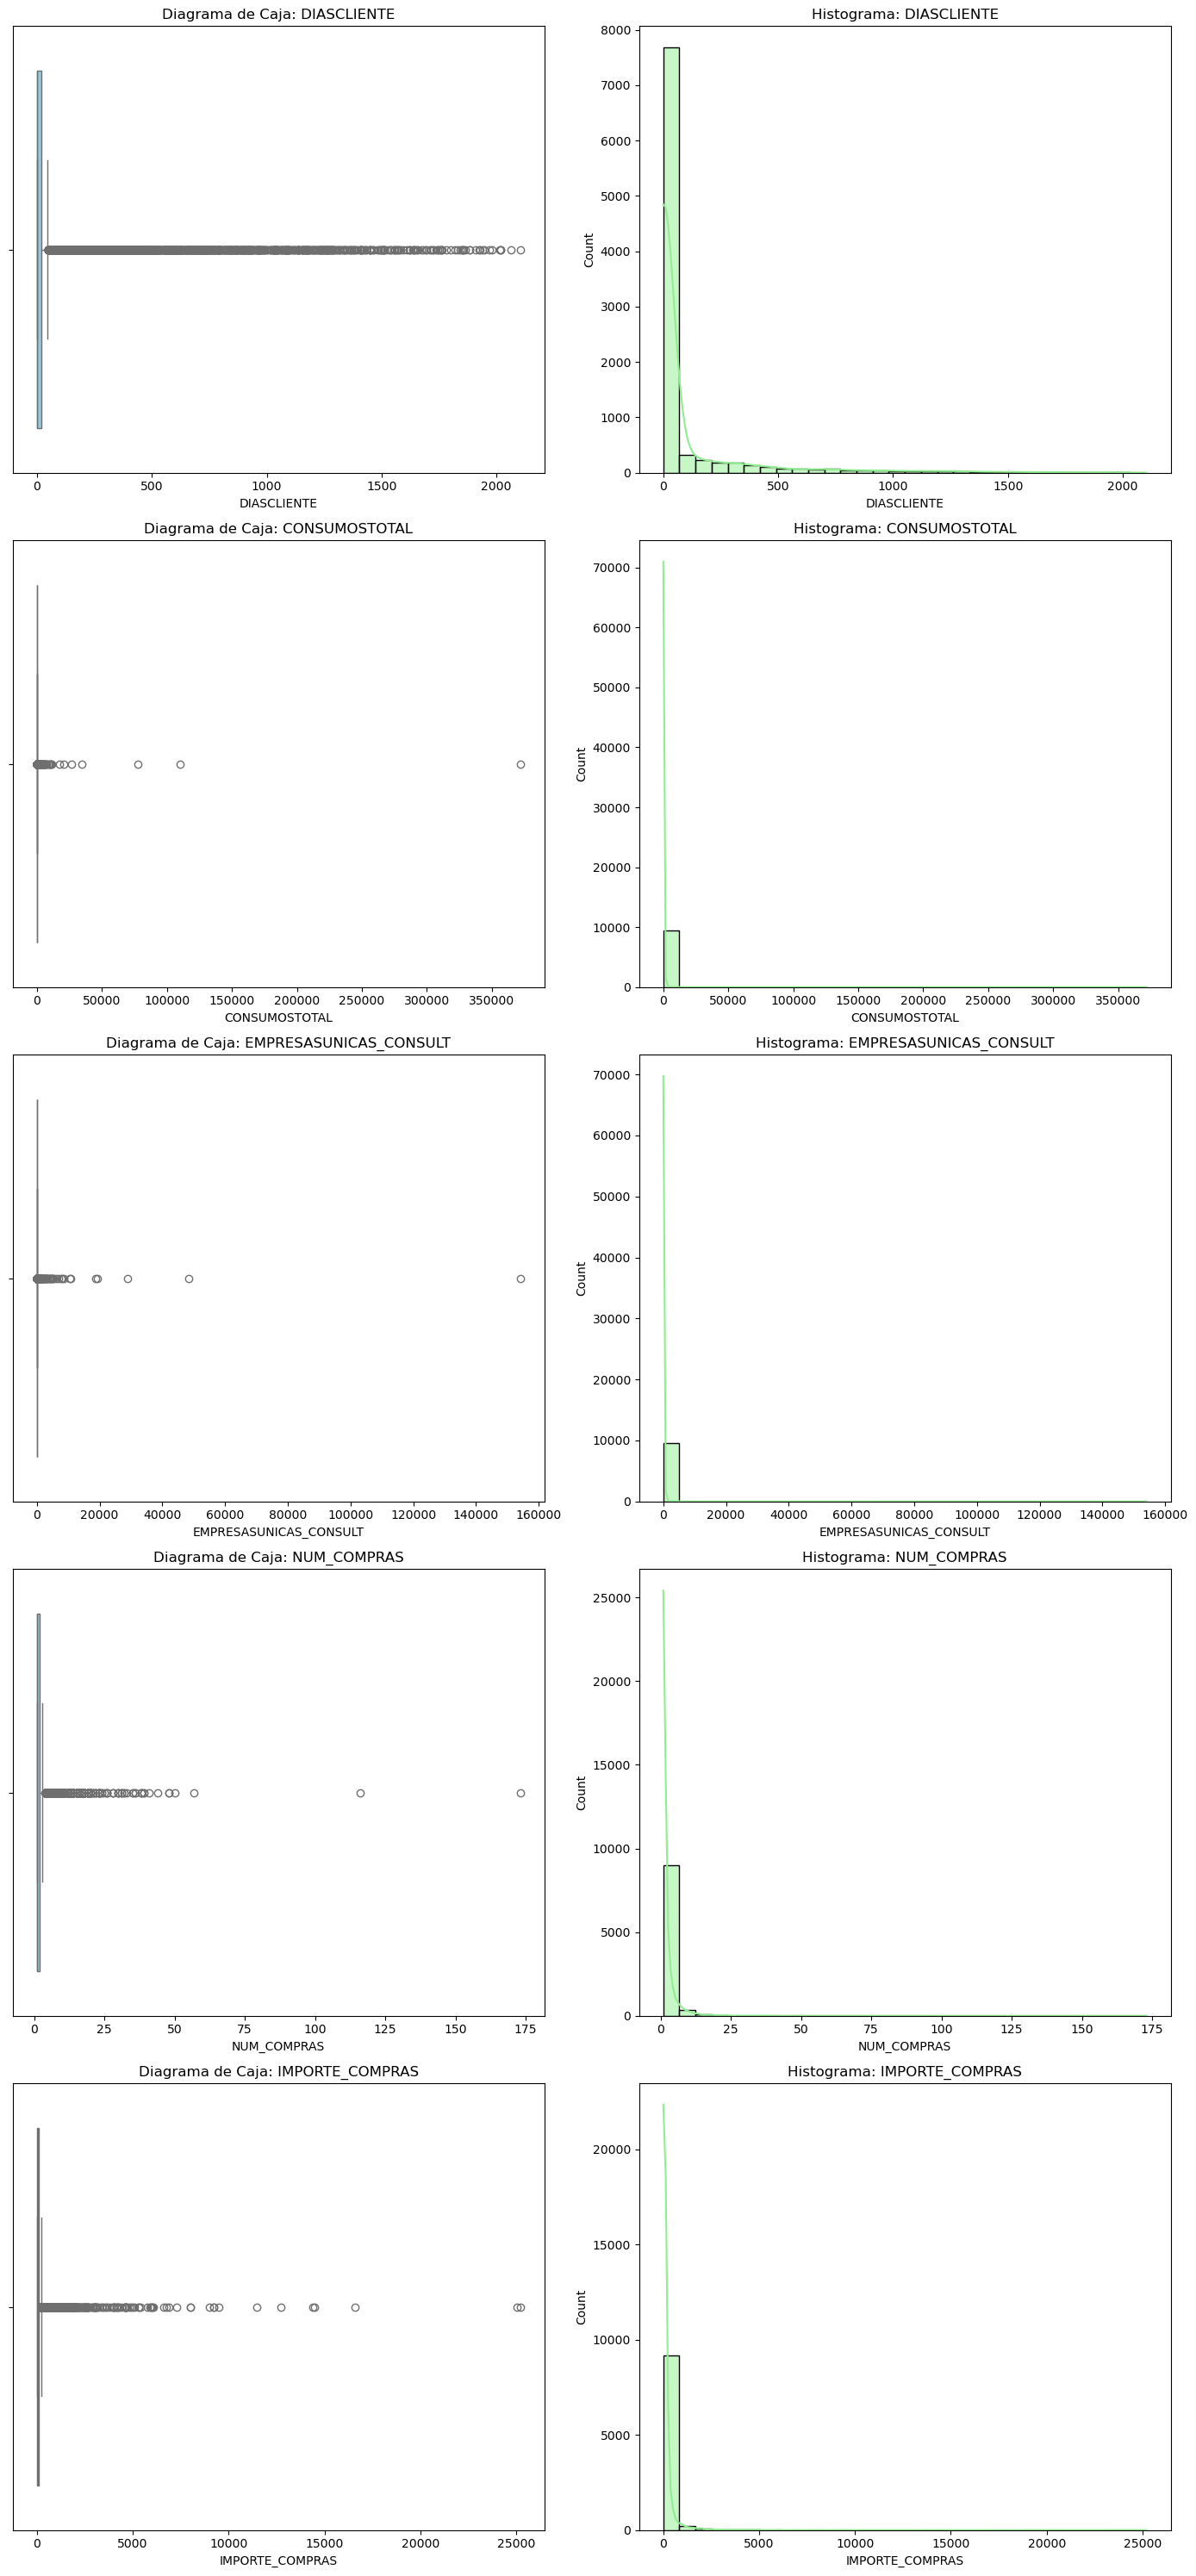

In [42]:
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Identificar las columnas numéricas
columnas_numericas = clientes_optimizados_df.select_dtypes(include=['number']).columns

# Configurar el tamaño de la figura
fig, axes = plt.subplots(len(columnas_numericas), 2, figsize=(14, len(columnas_numericas) * 6))

# Iterar por cada columna numérica y graficar
for i, columna in enumerate(columnas_numericas):
    # Diagrama de caja (Boxplot) para valores extremos
    sns.boxplot(data=clientes_optimizados_df, x=columna, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Diagrama de Caja: {columna}')
    axes[i, 0].set_xlabel(columna)

    # Histograma para distribución
    sns.histplot(data=clientes_optimizados_df, x=columna, kde=True, bins=30, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Histograma: {columna}')
    axes[i, 1].set_xlabel(columna)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

- **Conclusiones Generales:**
    - **Presencia de Outliers**: Todas las variables analizadas presentan valores extremos significativos, que podrían influir en los análisis y resultados.
    - **Distribuciones Sesgadas**: Las distribuciones de las variables están marcadamente sesgadas a la derecha, con la mayoría de los valores concentrados en rangos bajos y una minoría destacándose en rangos altos.

- Posibles Pasos a Seguir:
    - **Limpieza de Outliers**: Identificar y gestionar los valores extremos para minimizar su impacto en el análisis y asegurar resultados más fiables.
    - **Segmentación de Clientes**: Estudiar a los clientes con valores altos para detectar patrones, identificar segmentos con mayor consumo o actividad, y diseñar estrategias personalizadas.
    - **Transformación de Datos**: Aplicar transformaciones, como logaritmos o raíz cuadrada, para normalizar los datos y reducir la influencia de la asimetría en el análisis.

Procederemos a una visualización de los datos aplicando una transformación logaritimca y otra de raíz cuadrada.

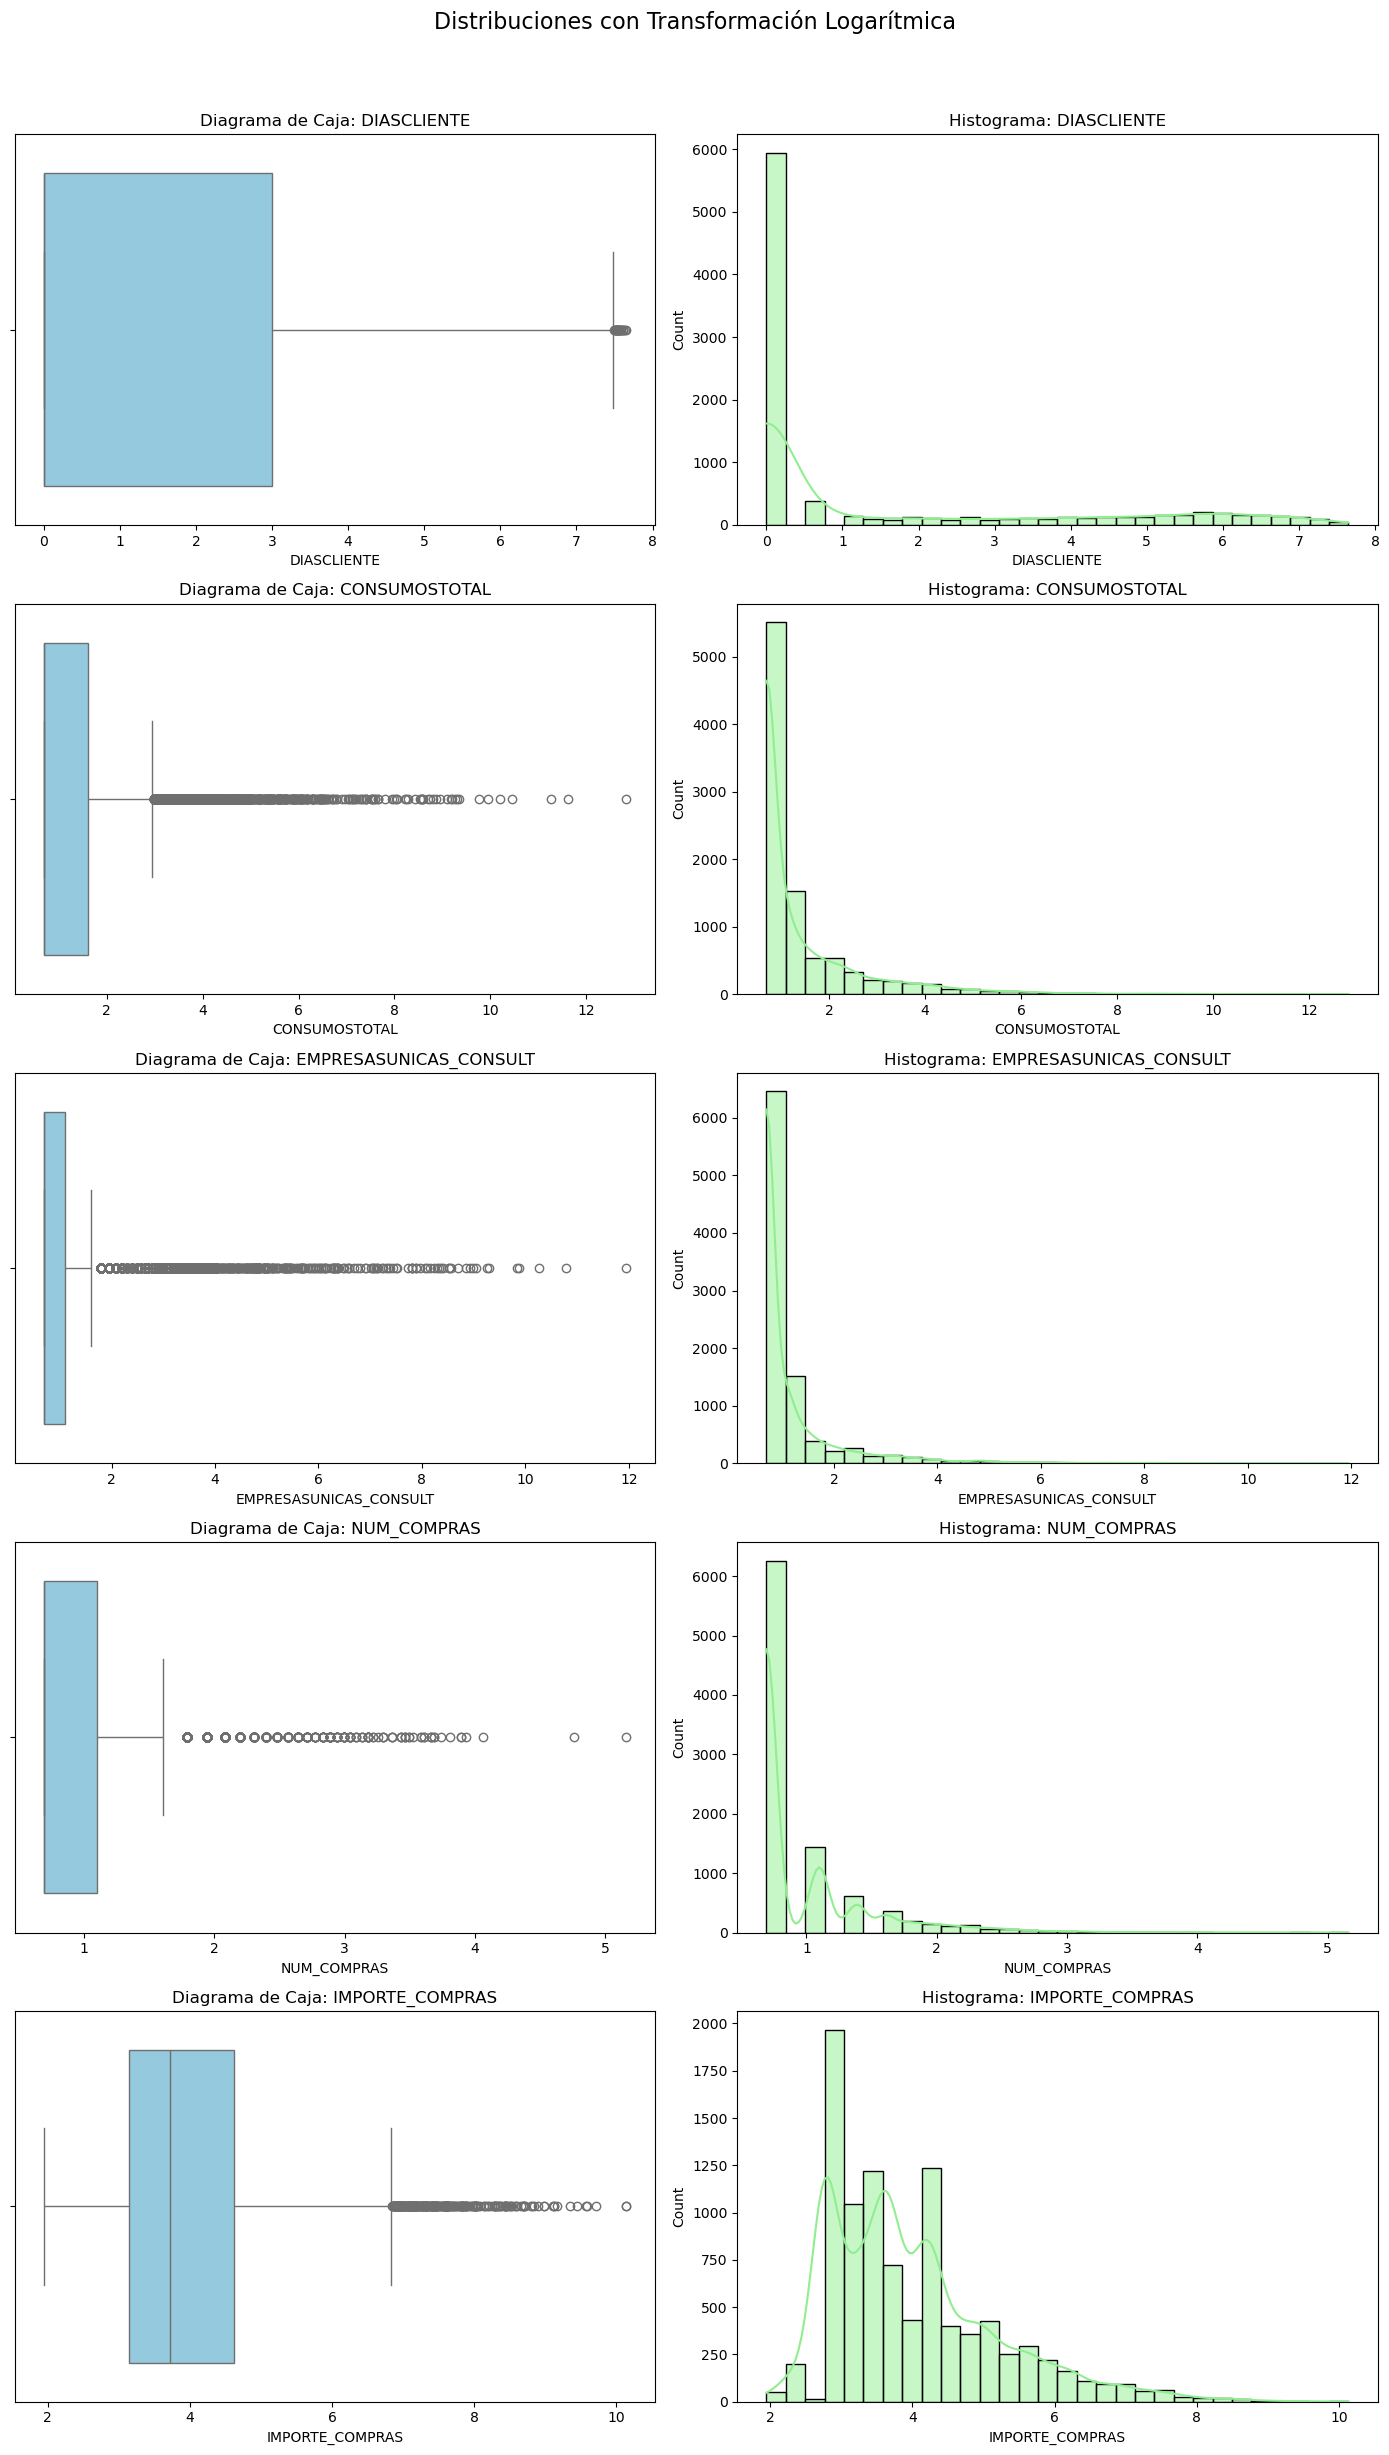

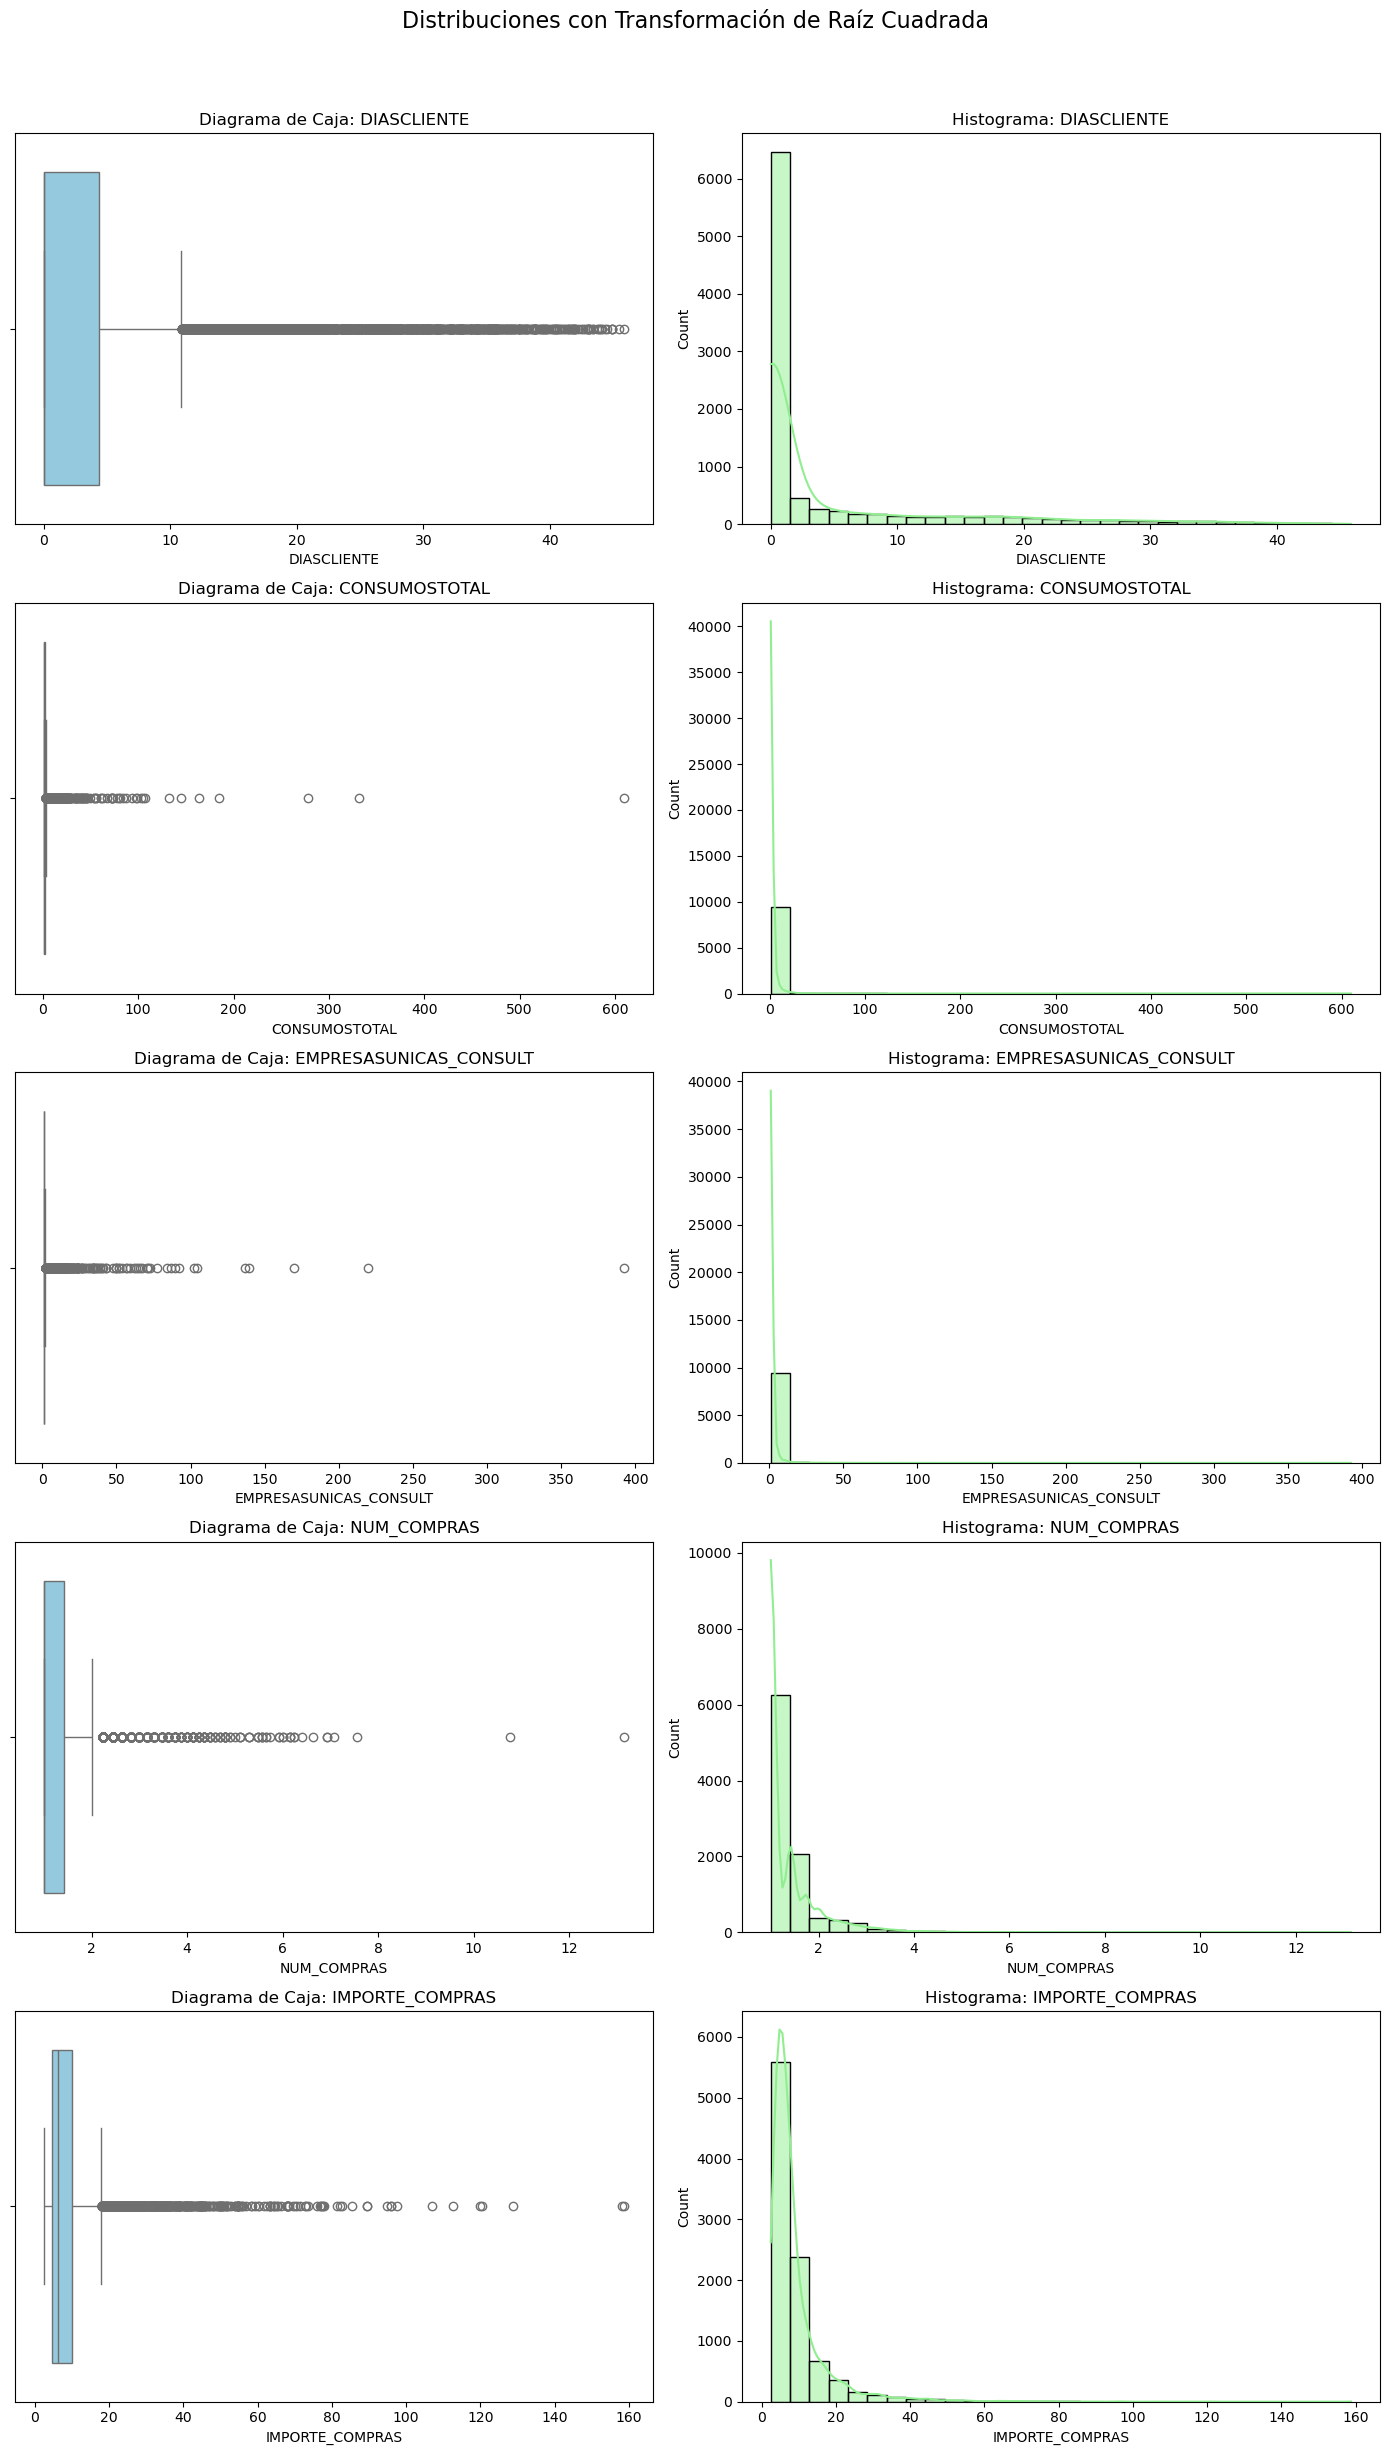

In [44]:
# Crear copias del DataFrame original para las transformaciones
clientes_log_df = clientes_optimizados_df.copy()
clientes_sqrt_df = clientes_optimizados_df.copy()

# Identificar columnas numéricas
columnas_numericas = clientes_optimizados_df.select_dtypes(include=['number']).columns

# Aplicar transformaciones a los nuevos DataFrames
for columna in columnas_numericas:
    # Transformación logarítmica (manejo de valores <= 0)
    clientes_log_df[columna] = np.log1p(clientes_optimizados_df[columna])
    # Transformación raíz cuadrada
    clientes_sqrt_df[columna] = np.sqrt(clientes_optimizados_df[columna])

# Función para crear gráficos de distribución
def visualizar_distribuciones(df, titulo):
    columnas_numericas = df.select_dtypes(include=['number']).columns
    num_columnas = len(columnas_numericas)
    
    fig, axes = plt.subplots(nrows=num_columnas, ncols=2, figsize=(14, 5 * num_columnas))
    fig.suptitle(titulo, fontsize=16)
    
    for i, columna in enumerate(columnas_numericas):
        # Diagrama de caja
        sns.boxplot(data=df, x=columna, ax=axes[i, 0], color='skyblue')
        axes[i, 0].set_title(f'Diagrama de Caja: {columna}')
        
        # Histograma con KDE
        sns.histplot(data=df, x=columna, kde=True, bins=30, ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'Histograma: {columna}')
        axes[i, 1].set_xlabel(columna)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualizar distribuciones para el DataFrame con transformación logarítmica
visualizar_distribuciones(clientes_log_df, 'Distribuciones con Transformación Logarítmica')

# Visualizar distribuciones para el DataFrame con transformación de raíz cuadrada
visualizar_distribuciones(clientes_sqrt_df, 'Distribuciones con Transformación de Raíz Cuadrada')

**Conclusiones**
1. **Asimetría Positiva:** 
   Las distribuciones originales muestran una fuerte asimetría positiva, con la mayoría de los valores concentrados en rangos bajos y colas largas hacia la derecha.

2. **Transformación Logarítmica:**
   - La transformación logarítmica resultó ser la más efectiva para normalizar las distribuciones.
   - Comprime los valores altos, reduciendo la influencia de los outliers.
   - Mejora la homogeneidad de la varianza y facilita la interpretación de las relaciones lineales entre las variables.

3. **Transformación de Raíz Cuadrada:**
   - Aunque también suaviza las distribuciones, no es tan eficaz como la logarítmica para gestionar valores extremadamente altos.

### 3.4.2 Examen de la distribución de las variables categóricas
Procedemos a visualizar la distribución de los datos categóricos.

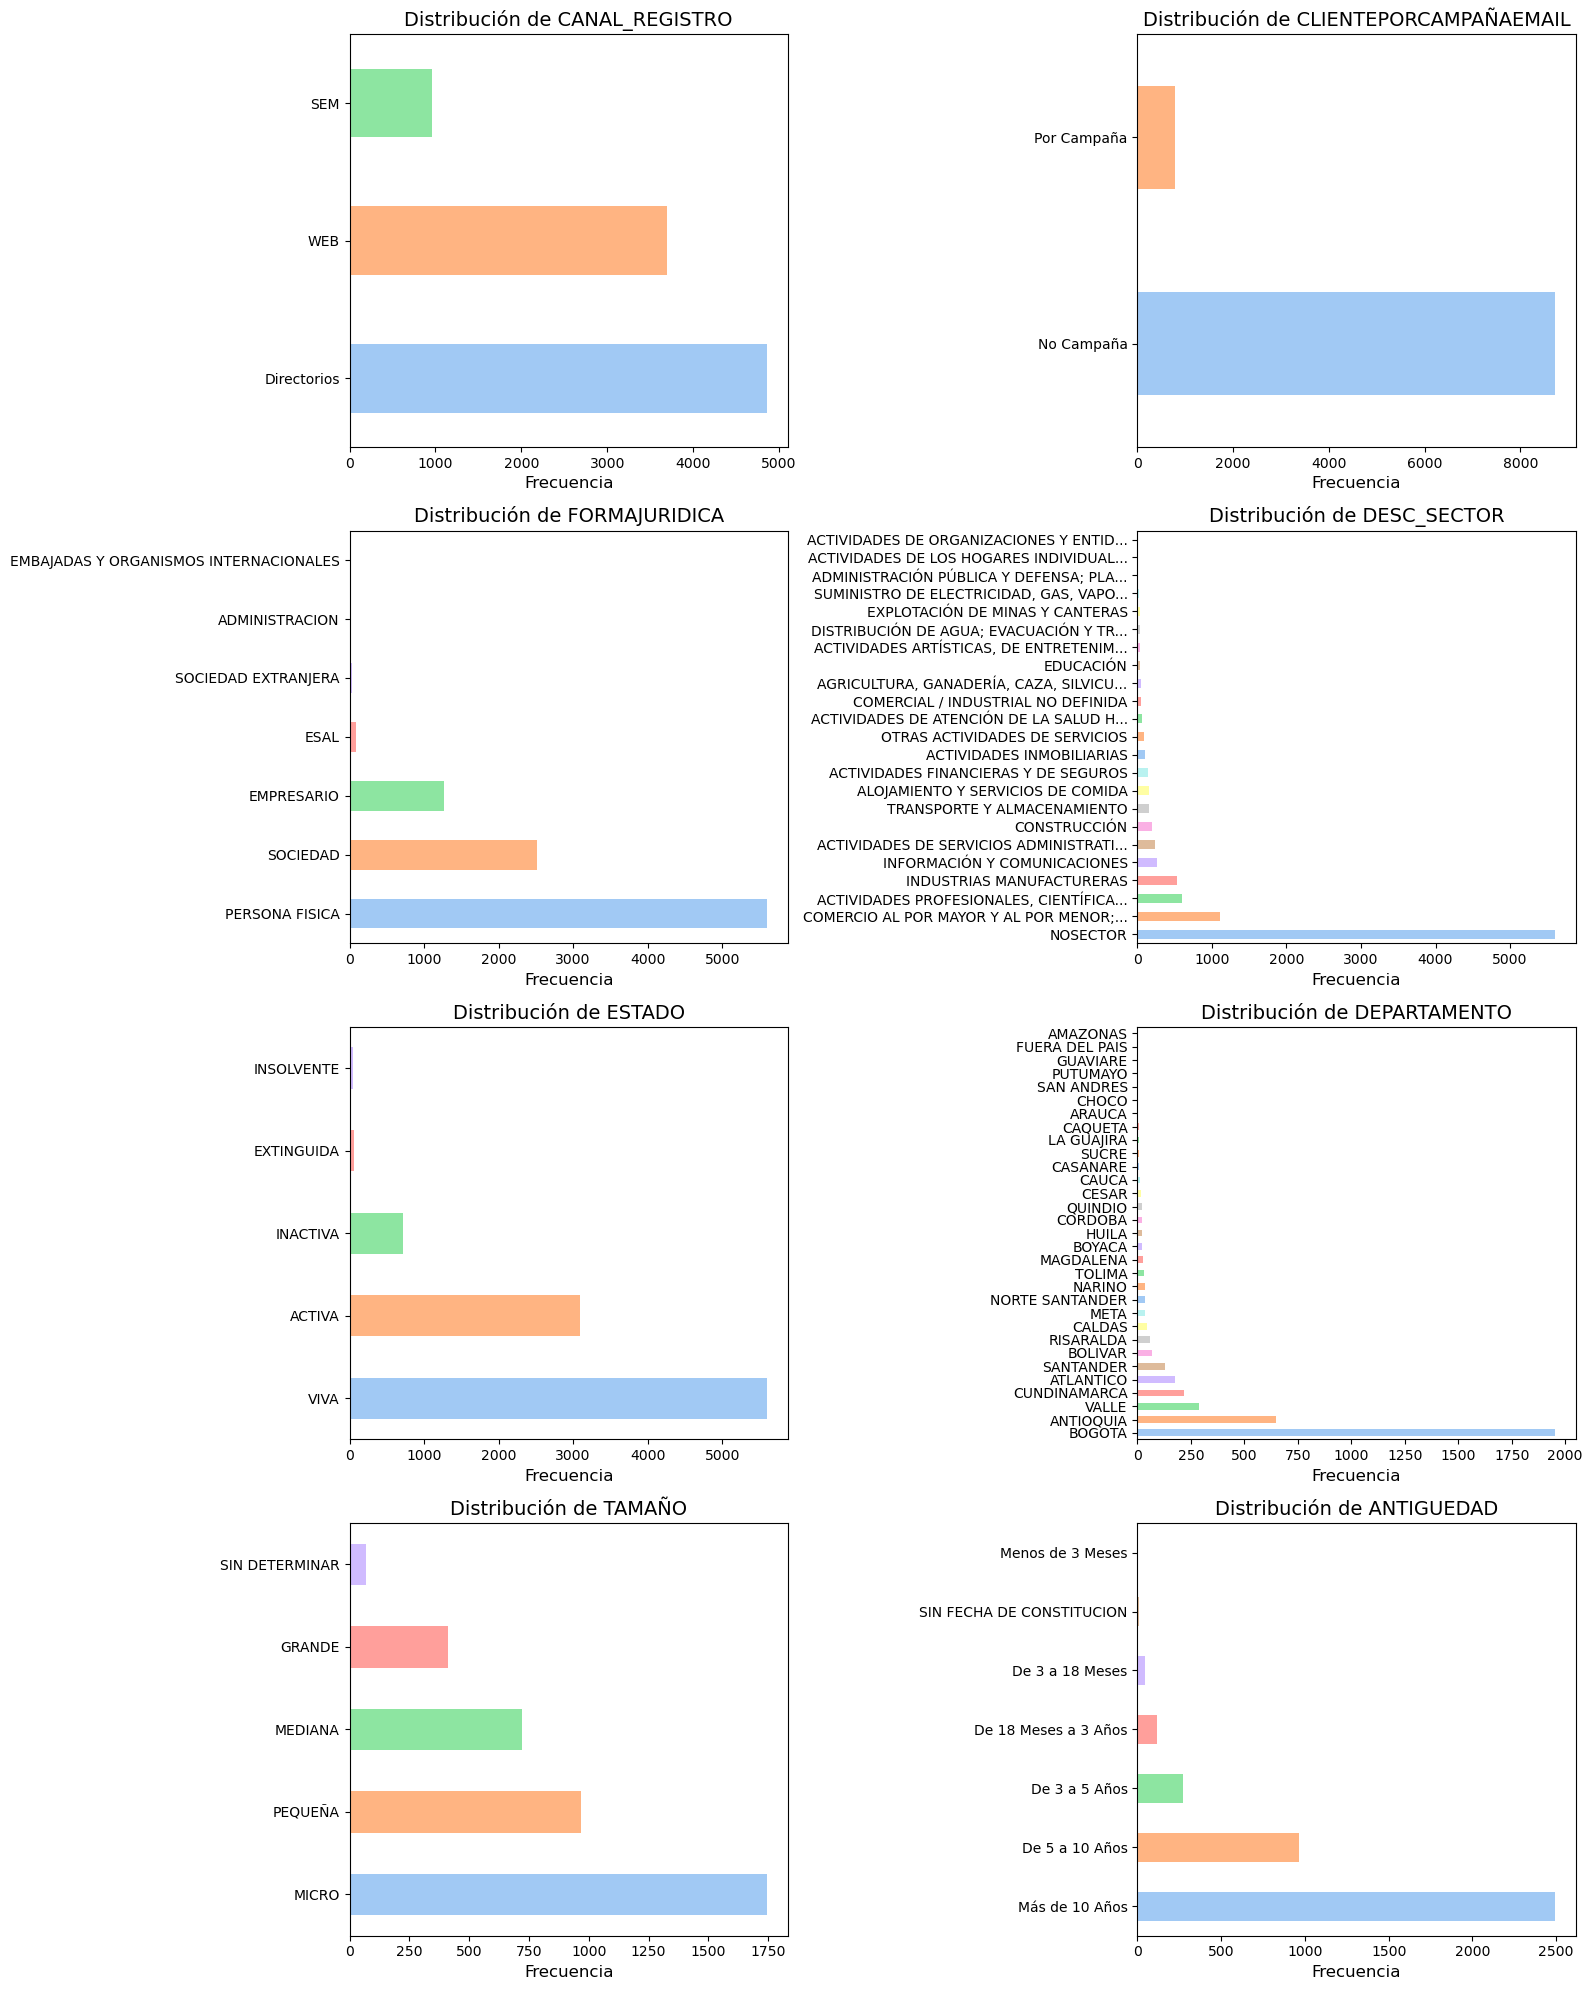

In [47]:
# Identificar las columnas categóricas
columnas_categoricas = clientes_optimizados_df.select_dtypes(include=['object', 'category']).columns

# Limitar la longitud de los valores categóricos a 40 caracteres
def recortar_valores(valores):
    valores.index = [f'{v[:37]}...' if len(v) > 40 else v for v in valores.index]
    return valores

# Configuración para el grid
num_graficos = len(columnas_categoricas)
filas = math.ceil(num_graficos / 2)  # Dos gráficos por fila
fig, axes = plt.subplots(filas, 2, figsize=(16, filas * 5))  # Ajustar el tamaño

# Asegurarse de que "axes" sea un array 2D
axes = axes.flatten() if num_graficos > 1 else [axes]

# Graficar cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    valores = clientes_optimizados_df[columna].value_counts().sort_values(ascending=False)  # Ordenar descendentemente
    valores = recortar_valores(valores)
    valores.plot(kind='barh', color=sns.color_palette("pastel", len(valores)), ax=axes[i])  # Mejorar estética
    axes[i].set_title(f'Distribución de {columna}', fontsize=14)
    axes[i].set_xlabel('Frecuencia', fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)

# Ocultar gráficos vacíos si hay menos de 8 columnas
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

# Ajustar la separación entre gráficos
plt.tight_layout()
plt.show()

**Conclusiones Generales**
1. **CANAL_REGISTRO:**
   - Los canales principales de registro son "Directorios" y "WEB", mientras que "SEM" tiene una menor representación.
   - **Implicación:** Podrían revisarse las estrategias asociadas al canal "SEM" para evaluar su rendimiento y potencial optimización.

2. **CLIENTEPORCAMPAÑAEMAIL:**
   - La mayoría de los clientes no provienen de campañas de email, lo que sugiere una efectividad limitada de este canal.
   - **Implicación:** Es necesario reevaluar la estrategia de campañas de email para maximizar su impacto.

3. **FORMAJURIDICA:**
   - Las "Personas Físicas" y "Sociedades" seguidas de "Empresarios" representan la mayor parte de los clientes
   - **Implicación:** Las estrategias comerciales deben priorizar estos tres segmentos clave. Se pueden excluir las categorías "ESAL", "Sociedad extranjera", "Administración" y "Embajadas y Organismos Oficiales" por el escaso número de clientes que estas representan.

4. **DESC_SECTOR:**
   - El predominio de "NOSECTOR" sugiere que este campo no es relevante para "Personas Físicas".
   - **Implicación:** Considerar excluir esta variable o tratar "NOSECTOR" como una categoría separada.

5. **ESTADO:**
   - Las categorías "VIVA" y "ACTIVA" dominan, lo que indica que los clientes actuales están operativos.
   - **Implicación:** Las empresas en estados "INACTIVA", "EXTINGUIDA" e "INSOLVENTE" podrían ser ignoradas en análisis futuros ya que es de suponer que una sociedad en esos estado no tiene actividad y por tanto no va a ser un cliente.

6. **DEPARTAMENTO:**
   - Bogotá, Antioquia y Valle son los mercados más grandes.
   - **Implicación:** Estas áreas deben ser los focos estratégicos de marketing y estudios de mercado.

7. **TAMAÑO:**
   - Las "MICRO" y "PEQUEÑA" empresas son las más representadas.
   - **Implicación:** Las estrategias deben diseñarse para atender las necesidades específicas de estas empresas.

8. **ANTIGÜEDAD:**
   - La mayoría de los clientes tienen más de 10 años, lo que indica una base consolidada.
   - **Implicación:** Es necesario explorar estrategias para captar clientes con menos antigüedad.


## 3.5 Exclusión de valores de variables categóricas poco representativos

Procedemos a excluir del dataset los campos de variables categoricas que consideramos poco relevantes para el análisis.
Comprobamos antes la relación entre `ESTADO` y `FORMAJURIDICA`

In [50]:
# Verificar si todos los casos de estado 'EXTINGUIDA' corresponden a 'SOCIEDADES'
extinguida_son_sociedades = clientes_optimizados_df[
    clientes_optimizados_df['ESTADO'] == 'ACTIVA']['FORMAJURIDICA'].unique()

# Verificar si todos los casos de estado 'VIVA' corresponden a 'PERSONAS FÍSICAS'
viva_son_personas_fisicas = clientes_optimizados_df[
    clientes_optimizados_df['ESTADO'] == 'VIVA']['FORMAJURIDICA'].unique()

# Mostrar resultados
if len(extinguida_son_sociedades) == 1 and extinguida_son_sociedades[0] == 'SOCIEDAD':
    print("Todos los casos de estado 'ACTIVA' corresponden a 'SOCIEDADES'.")
else:
    print("No todos los casos de estado 'ACTIVA' corresponden a 'SOCIEDADES'.")
    print("Forma(s) jurídica(s) encontrada(s) para 'ACTIVA':", extinguida_son_sociedades)

if len(viva_son_personas_fisicas) == 1 and viva_son_personas_fisicas[0] == 'PERSONA FISICA':
    print("Todos los casos de estado 'VIVA' corresponden a 'PERSONAS FÍSICAS'.")
else:
    print("No todos los casos de estado 'VIVA' corresponden a 'PERSONAS FÍSICAS'.")
    print("Forma(s) jurídica(s) encontrada(s) para 'VIVA':", viva_son_personas_fisicas)

No todos los casos de estado 'ACTIVA' corresponden a 'SOCIEDADES'.
Forma(s) jurídica(s) encontrada(s) para 'ACTIVA': ['SOCIEDAD' 'EMPRESARIO' 'ESAL' 'SOCIEDAD EXTRANJERA'
 'EMBAJADAS Y ORGANISMOS INTERNACIONALES' 'ADMINISTRACION']
Todos los casos de estado 'VIVA' corresponden a 'PERSONAS FÍSICAS'.


Del análisis de las variables categóricas se concluye que:
1. Todos los casos de estado **"VIVA"** corresponden a **"PERSONAS FÍSICAS"**.
2. El estado **"ACTIVA"** aparece en múltiples formas jurídicas, incluyendo **"SOCIEDADES"** y **"EMPRESARIOS"**.

Además, algunas categorías tienen una representación extremadamente baja o son poco relevantes para los objetivos del análisis. Estas categorías pueden:
- Introducir ruido en el análisis.
- Dificultar la interpretación de los resultados.

---
Para mejorar la calidad del análisis, se decidió:
1. **Identificar categorías con poca representación o relevancia.**
   - Por ejemplo, formas jurídicas como **"EMBAJADAS Y ORGANISMOS INTERNACIONALES"** o estados como **"INSOLVENTE"**.
2. **Excluir estas categorías del dataset.**
   - Se asegura que estas exclusiones no comprometan la integridad del análisis.
3. **Simplificar el dataset resultante.**
   - Esto permite centrar el análisis en las categorías más representativas y útiles.

---
Las siguientes categorías han sido identificadas para exclusión debido a su baja representación o relevancia:

- **FORMAJURIDICA:** 
  - *'EMBAJADAS Y ORGANISMOS INTERNACIONALES', 'ADMINISTRACIÓN', 'SOCIEDAD EXTRANJERA', 'ESAL'.*
- **ESTADO:** 
  - *'INACTIVA', 'EXTINGUIDA', 'INSOLVENTE'* (clientes no operativos).
- **TAMAÑO:** 
  - *'SIN DETERMINAR'* (información ambigua).
- **ANTIGÜEDAD:** 
  - *'SIN FECHA DE CONSTITUCIÓN'* (información incompleta).

In [52]:
# Crear una copia del DataFrame para mantener el original intacto
clientes_simplificado_df = clientes_optimizados_df.copy()

# Definir categorías a excluir por variable
categorias_a_excluir = {
    'FORMAJURIDICA': ['EMBAJADAS Y ORGANISMOS INTERNACIONALES', 'ADMINISTRACION', 'SOCIEDAD EXTRANJERA', 'ESAL'],
    'ESTADO': ['INACTIVA', 'EXTINGUIDA', 'INSOLVENTE'],
    'TAMAÑO': ['SIN DETERMINAR'],
    'ANTIGUEDAD': ['SIN FECHA DE CONSTITUCIÓN']
}

# Excluir categorías
for campo, categorias in categorias_a_excluir.items():
    if campo in clientes_simplificado_df.columns:
        clientes_simplificado_df = clientes_simplificado_df[~clientes_simplificado_df[campo].isin(categorias)]

# Mostrar un resumen del DataFrame simplificado
print("Resumen de datos después de la exclusión:")
print(clientes_simplificado_df.info())

Resumen de datos después de la exclusión:
<class 'pandas.core.frame.DataFrame'>
Index: 8555 entries, 6384286 to 9650613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CANAL_REGISTRO          8555 non-null   object
 1   CLIENTEPORCAMPAÑAEMAIL  8555 non-null   object
 2   FORMAJURIDICA           8555 non-null   object
 3   DESC_SECTOR             8555 non-null   object
 4   ESTADO                  8555 non-null   object
 5   DEPARTAMENTO            2955 non-null   object
 6   TAMAÑO                  2955 non-null   object
 7   ANTIGUEDAD              2955 non-null   object
 8   DIASCLIENTE             8555 non-null   int64 
 9   CONSUMOSTOTAL           8555 non-null   int64 
 10  EMPRESASUNICAS_CONSULT  8555 non-null   int64 
 11  NUM_COMPRAS             8555 non-null   int64 
 12  IMPORTE_COMPRAS         8555 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 935.7+ KB
None


## 3.6 Consolidación de valores de la variable DEPARTAMENTO

Consolidación de Departamentos con Baja Representación:

En el dataset original, la variable `DEPARTAMENTO` incluye una gran cantidad de valores categóricos que representan diferentes ubicaciones geográficas. Sin embargo, al analizar la distribución de esta variable, se observa que algunos departamentos tienen una representación inferior al 5% del total. Estos valores con baja representación presentan las siguientes características:

1. **Ruido en el Análisis:**
   - Los departamentos con menos representación pueden introducir ruido en el análisis al no aportar información significativa debido a su bajo volumen.

2. **Complejidad en la Interpretación:**
   - Mantener muchas categorías poco representativas puede dificultar la interpretación de los resultados y la creación de estrategias basadas en los datos.

3. **Optimización del Modelo:**
   - Para técnicas de segmentación o modelado, consolidar valores poco frecuentes ayuda a reducir la dimensionalidad, mejorando la estabilidad y eficiencia de los algoritmos.

---
Para abordar este problema, se adoptó la siguiente estrategia:
1. **Identificar Categorías con Baja Representación:**
   - Se consideran categorías con menos del 5% de representación como "baja representación".
2. **Agrupar Estas Categorías:**
   - Los departamentos con baja representación se agrupan bajo la categoría genérica `OTROS DEPARTAMENTOS`.
3. **Mantener la Información Esencial:**
   - Los departamentos con mayor representación permanecen intactos para garantizar que la información clave no se pierda.
  
Despo

In [54]:
# Crear una copia del DataFrame original
clientes_departamentos_reducidos_df = clientes_simplificado_df.copy()

# Calcular distribución de departamentos
departamento_distribution = clientes_departamentos_reducidos_df['DEPARTAMENTO'].value_counts(normalize=True) * 100

# Identificar departamentos con menos del 5% de representación
low_percentage_departments = departamento_distribution[departamento_distribution < 5].index.tolist()

# Reemplazar los departamentos con menos del 5% por "OTROS DEPARTAMENTOS"
clientes_departamentos_reducidos_df['DEPARTAMENTO'] = clientes_departamentos_reducidos_df['DEPARTAMENTO'].apply(
    lambda x: 'OTROS DEPARTAMENTOS' if x in low_percentage_departments else x
)

# Verificar los cambios
print("Distribución de departamentos después de consolidar:")
print(clientes_departamentos_reducidos_df['DEPARTAMENTO'].value_counts(normalize=True) * 100)

Distribución de departamentos después de consolidar:
DEPARTAMENTO
BOGOTA                 50.016920
OTROS DEPARTAMENTOS    20.913706
ANTIOQUIA              15.769882
VALLE                   7.343486
CUNDINAMARCA            5.956007
Name: proportion, dtype: float64


Comprobamos a continuación la naturaleza de los datos faltantes en `DEPARTAMENTO`.

In [56]:
# Filtrar los registros donde DEPARTAMENTO es NaN
nan_departamentos = clientes_departamentos_reducidos_df[clientes_simplificado_df['DEPARTAMENTO'].isna()]

# Verificar los valores únicos de FORMAJURIDICA en los registros con DEPARTAMENTO NaN
formas_juridicas_nan = nan_departamentos['FORMAJURIDICA'].unique()

# Mostrar los resultados
if len(formas_juridicas_nan) == 1 and formas_juridicas_nan[0] == 'PERSONA FISICA':
    print("Todos los valores NaN en DEPARTAMENTO corresponden a 'PERSONA FISICA'.")
else:
    print("No todos los valores NaN en DEPARTAMENTO corresponden a 'PERSONA FISICA'.")
    print("Formas jurídicas encontradas para valores NaN en DEPARTAMENTO:", formas_juridicas_nan)

Todos los valores NaN en DEPARTAMENTO corresponden a 'PERSONA FISICA'.


El análisis demuestra que los valores faltantes en DEPARTAMENTO no son un problema de calidad de datos, sino una característica implícita de los registros asociados a PERSONA FISICA. Este conocimiento permite tomar decisiones informadas sobre cómo tratarlos en etapas posteriores del análisis.

## 3.7 Manejo de valores extremos

En este problema de segmentación, el objetivo es identificar patrones en los datos de consumo y ventas que permitan clasificar a los clientes y desarrollar estrategias comerciales. Para ello, es fundamental elegir un método adecuado para gestionar los valores extremos, ya que estos pueden distorsionar el análisis, pero también representan información clave sobre clientes de alto valor.

Inicialmente, el método del percentil parecía una opción viable por su simplicidad y robustez frente a distribuciones no normales. Este enfoque permite eliminar valores extremos de manera rápida y efectiva, evitando que distorsionen las métricas. Sin embargo, me generó dudas, ya que un recorte basado en percentiles podría eliminar valores que, aunque extremos, son estratégicamente relevantes. Esto es especialmente importante al considerar el principio de Pareto, según el cual una pequeña proporción de clientes puede generar una gran parte de los ingresos.

Tras reflexionar sobre el impacto potencial de los valores extremos, he optado por el z-score con un umbral amplio de 6 desviaciones estándar. Este método equilibra la eliminación de valores distorsionadores con la conservación de datos cruciales para identificar segmentos de alto valor. Además, modera la influencia de valores extremos verdaderamente anómalos mientras preserva información sobre patrones poco frecuentes pero relevantes. También conserva valores alejados de la media que podrían ser clave para comprender comportamientos únicos, y evita la eliminación indiscriminada que podría ocurrir con el método del percentil, al considerar tanto la dispersión general de los datos como su variabilidad natural.

En este contexto, considero que el uso de un z-score ajustado no solo respeta la naturaleza sesgada de las distribuciones, sino que también asegura que la segmentación refleje tanto las tendencias generales como los casos de alto impacto. Este enfoque lo convierte en la herramienta más adecuada para equilibrar la precisión estadística y la interpretación estratégica de los datos extremos.

Almacenaremos en un diccionario los ids de los outliers de IMPORTE_COMPRAS y NUM_COMPRAS para un análisis posterior por corresponderse al perfil de cliente más interesante.

In [59]:
from scipy.stats import zscore

# Lista de columnas numéricas a procesar
columnas = ['CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT', 'IMPORTE_COMPRAS', 'NUM_COMPRAS', 'DIASCLIENTE']

# Crear una copia del DataFrame original
clientes_departamentos_reducido_sin_outliers_df = clientes_departamentos_reducidos_df.copy()

# Diccionario para registrar estadísticas
outliers_stats = {}
outliers_ids = {'NUM_COMPRAS': [], 'IMPORTE_COMPRAS': []}  # Diccionario para almacenar los IDs de outliers

# Filtrar valores extremos
for columna in columnas:
    # Calcular z-scores
    z_scores = zscore(clientes_departamentos_reducido_sin_outliers_df[columna])
    
    # Identificar outliers
    outliers_condition = (z_scores < -6) | (z_scores > 6)
    
    # Si la columna es NUM_COMPRAS o IMPORTE_COMPRAS, guardar los IDs de los outliers
    if columna in outliers_ids:
        outliers_ids[columna] = clientes_departamentos_reducido_sin_outliers_df.loc[outliers_condition].index.tolist()
    
    # Registrar estadísticas
    num_outliers = outliers_condition.sum()
    total_values = len(clientes_departamentos_reducido_sin_outliers_df[columna])
    outliers_stats[columna] = {
        'Total Valores': total_values,
        'Outliers Eliminados': num_outliers,
        'Porcentaje Eliminado': f"{round((num_outliers / total_values) * 100, 2)}%"
    }
    
    # Filtrar DataFrame
    clientes_departamentos_reducido_sin_outliers_df = clientes_departamentos_reducido_sin_outliers_df[~outliers_condition]

# Mostrar estadísticas finales
print("\nEstadísticas de Outliers Eliminados:")
for columna, stats in outliers_stats.items():
    print(f"\nColumna: {columna}")
    for key, value in stats.items():
        print(f"  {key}: {value}")

print(f"\nFilas originales: {clientes_departamentos_reducidos_df.shape[0]}")
print(f"Filas después de eliminar outliers: {clientes_departamentos_reducido_sin_outliers_df.shape[0]}")

# Mostrar los IDs de los outliers eliminados para NUM_COMPRAS e IMPORTE_COMPRAS
print("\nIDs de outliers eliminados:")
for columna, ids in outliers_ids.items():
    print(f"Columna: {columna} - IDs: {ids}")


Estadísticas de Outliers Eliminados:

Columna: CONSUMOSTOTAL
  Total Valores: 8555
  Outliers Eliminados: 5
  Porcentaje Eliminado: 0.06%

Columna: EMPRESASUNICAS_CONSULT
  Total Valores: 8550
  Outliers Eliminados: 21
  Porcentaje Eliminado: 0.25%

Columna: IMPORTE_COMPRAS
  Total Valores: 8529
  Outliers Eliminados: 32
  Porcentaje Eliminado: 0.38%

Columna: NUM_COMPRAS
  Total Valores: 8497
  Outliers Eliminados: 41
  Porcentaje Eliminado: 0.48%

Columna: DIASCLIENTE
  Total Valores: 8456
  Outliers Eliminados: 31
  Porcentaje Eliminado: 0.37%

Filas originales: 8555
Filas después de eliminar outliers: 8425

IDs de outliers eliminados:
Columna: NUM_COMPRAS - IDs: [6389279, 6545336, 6529908, 6646314, 6588019, 6901357, 6876844, 6848464, 7000522, 7170819, 7112840, 7267692, 7361111, 7432194, 7570735, 8071242, 8395271, 8556038, 8743580, 8796700, 8888045, 9040813, 9151451, 9357411, 9557508, 8835229, 6464093, 9735832, 7196762, 9306799, 7503366, 7697432, 6814188, 8157181, 8779407, 9342394,

# 4. Primera segmentación

Vamos a proceder a una primera segmentación tomando las variables numéricas y la variable PERSONAJURIDICA que consideramos particularmente interesante para esta primera segmentación exploratoria.

## 4.1 Normalización de las variables numéricas
Para ello procederemos a aplicar una normalización logarítmica a las variables numéricas por presentar estas una fuerte asimetria positiva.

In [61]:
# Lista de columnas a transformar
columnas_a_transformar = ['DIASCLIENTE', 'CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT', 'NUM_COMPRAS', 'IMPORTE_COMPRAS']

# Copiar el DataFrame para no alterar el original
clientes_transformados_df = clientes_departamentos_reducido_sin_outliers_df.copy()

# Aplicar la transformación logarítmica
for columna in columnas_a_transformar:
    # Ajustar valores para que sean positivos
    min_valor = clientes_transformados_df[columna].min()
    if min_valor <= 0:
        clientes_transformados_df[columna] = clientes_transformados_df[columna] - min_valor + 1
    # Aplicar logaritmo natural
    clientes_transformados_df[columna] = np.log(clientes_transformados_df[columna])

# Verificar las nuevas distribuciones
print(clientes_transformados_df[columnas_a_transformar].describe())

       DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  NUM_COMPRAS  \
count  8425.000000    8425.000000             8425.000000  8425.000000   
mean      1.497723       0.826549                0.524819     0.392725   
std       2.327520       1.323009                1.048944     0.641752   
min       0.000000       0.000000                0.000000     0.000000   
25%       0.000000       0.000000                0.000000     0.000000   
50%       0.000000       0.000000                0.000000     0.000000   
75%       2.772589       1.386294                0.693147     0.693147   
max       7.436617       7.665753                7.508239     2.995732   

       IMPORTE_COMPRAS  
count      8425.000000  
mean          3.928266  
std           1.164956  
min           1.791759  
25%           3.091042  
50%           3.688879  
75%           4.499810  
max           8.294050  


## 4.2 Codificación de FORMAJURIDICA
A continuación pasamos a codificar la variable categórica `FORMAJURIDICA` para poder aplicar despues algorítmos de segmentación sobre ella, comprobaremos que la codificación ha sido correcta.

In [63]:
# Obtener las categorías únicas de 'FORMAJURIDICA' y ordenarlas alfabéticamente
categorias_ordenadas = sorted(clientes_transformados_df['FORMAJURIDICA'].unique())

# La primera categoría en orden alfabético es la que se eliminará
categoria_eliminada = categorias_ordenadas[0]

# Almacenar la categoría eliminada en un diccionario
categorias_eliminadas = {'FORMAJURIDICA': categoria_eliminada}

# Aplicar One-Hot Encoding a la columna 'FORMAJURIDICA' y eliminar la primera categoría
# clientes_encoded_df = pd.get_dummies(clientes_transformados_df, columns=['FORMAJURIDICA'], prefix='FORMAJURIDICA', drop_first=True)
clientes_encoded_df = pd.get_dummies(clientes_transformados_df, columns=['FORMAJURIDICA'], prefix='FORMAJURIDICA')
# Visualizar las primeras filas del DataFrame transformado
display(clientes_encoded_df.head())

CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL  \
ID                                              
6384286            WEB             No Campaña   
6384667            WEB             No Campaña   
6387954    Directorios             No Campaña   
6383269    Directorios             No Campaña   
6386670    Directorios             No Campaña   

                                  DESC_SECTOR  ESTADO DEPARTAMENTO TAMAÑO  \
ID                                                                          
6384286                              NOSECTOR    VIVA          NaN    NaN   
6384667  ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA  MICRO   
6387954                              NOSECTOR    VIVA          NaN    NaN   
6383269                              NOSECTOR    VIVA          NaN    NaN   
6386670                              NOSECTOR    VIVA          NaN    NaN   

             ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  \
ID                                                                            
6384286             NaN     0.000000       2.397895                1.098612   
6384667  De 5 a 10 Años     5.883322       0.000000                0.000000   
6387954             NaN     4.219508       4.110874                2.302585   
6383269             NaN     0.000000       0.000000                0.000000   
6386670             NaN     6.993015       0.000000                0.000000   

         NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384286     0.000000         3.555348                     False   
6384667     0.000000         2.708050                     False   
6387954     2.564949         6.527958                     False   
6383269     0.000000         3.091042                     False   
6386670     0.000000         2.708050                     False   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  
ID                                                             
6384286                          True                   False  
6384667                         False                    True  
6387954                          True                   False  
6383269                          True                   False  
6386670                          True                   False

## 4.3 Estandarización de variables

In [65]:
# Comprobamos cuantas entradas tenemos para Persona física

# Filtrar las entradas donde FORMAJURIDICA_PERSONA FISICA es igual a TRUE
forma_juridica_persona_fisica_len = len(clientes_encoded_df[clientes_encoded_df['FORMAJURIDICA_PERSONA FISICA'] == True])

# Verificar el número de entradas filtradas
print(f"Total de entradas en FORMAJURIDICA_PERSONA FISICA: {forma_juridica_persona_fisica_len}")

Total de entradas en FORMAJURIDICA_PERSONA FISICA: 5562


In [66]:
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame codificado para la estandarización
clientes_standarized_df = clientes_encoded_df.copy()

# Separar las variables a estandarizar
columnas_a_transformar = ['DIASCLIENTE', 'CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT', 'NUM_COMPRAS', 'IMPORTE_COMPRAS']
variables_a_estandarizar = columnas_a_transformar + [col for col in clientes_encoded_df.columns if col.startswith('FORMAJURIDICA_')]

# Estandarizar las variables
scaler = StandardScaler()
clientes_standarized_df[variables_a_estandarizar] = scaler.fit_transform(clientes_encoded_df[variables_a_estandarizar])

# Verificar las primeras filas del DataFrame estandarizado
display(clientes_standarized_df.head())

CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL  \
ID                                              
6384286            WEB             No Campaña   
6384667            WEB             No Campaña   
6387954    Directorios             No Campaña   
6383269    Directorios             No Campaña   
6386670    Directorios             No Campaña   

                                  DESC_SECTOR  ESTADO DEPARTAMENTO TAMAÑO  \
ID                                                                          
6384286                              NOSECTOR    VIVA          NaN    NaN   
6384667  ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA  MICRO   
6387954                              NOSECTOR    VIVA          NaN    NaN   
6383269                              NOSECTOR    VIVA          NaN    NaN   
6386670                              NOSECTOR    VIVA          NaN    NaN   

             ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  \
ID                                                                            
6384286             NaN    -0.643523       1.187777                0.547053   
6384667  De 5 a 10 Años     1.884349      -0.624786               -0.500360   
6387954             NaN     1.169462       2.482614                1.694917   
6383269             NaN    -0.643523      -0.624786               -0.500360   
6386670             NaN     2.361147      -0.624786               -0.500360   

         NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384286    -0.611993        -0.320132                 -0.269379   
6384667    -0.611993        -1.047497                 -0.269379   
6387954     3.385035         2.231712                 -0.269379   
6383269    -0.611993        -0.718717                 -0.269379   
6386670    -0.611993        -1.047497                 -0.269379   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  
ID                                                             
6384286                      0.717456               -0.611506  
6384667                     -1.393814                1.635306  
6387954                      0.717456               -0.611506  
6383269                      0.717456               -0.611506  
6386670                      0.717456               -0.611506

A continuación creamos un nuevo dataset solo con los campos que queremos usar en la primera segmentacion

In [68]:
# Definir las columnas numéricas a utilizar
columnas_numericas = ['DIASCLIENTE', 'CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT', 'NUM_COMPRAS', 'IMPORTE_COMPRAS']

# Seleccionar las columnas que corresponden al One-Hot Encoding de 'FORMAJURIDICA'
columnas_formajuridica = [col for col in clientes_standarized_df.columns if col.startswith('FORMAJURIDICA_')]

# Combinar ambas listas de columnas
columnas_seleccionadas = columnas_numericas + columnas_formajuridica

# Crear un nuevo DataFrame con las columnas seleccionadas
datos_segmentacion = clientes_standarized_df[columnas_seleccionadas]

display(datos_segmentacion.head())

DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  NUM_COMPRAS  \
ID                                                                         
6384286    -0.643523       1.187777                0.547053    -0.611993   
6384667     1.884349      -0.624786               -0.500360    -0.611993   
6387954     1.169462       2.482614                1.694917     3.385035   
6383269    -0.643523      -0.624786               -0.500360    -0.611993   
6386670     2.361147      -0.624786               -0.500360    -0.611993   

         IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                   
6384286        -0.320132                 -0.269379   
6384667        -1.047497                 -0.269379   
6387954         2.231712                 -0.269379   
6383269        -0.718717                 -0.269379   
6386670        -1.047497                 -0.269379   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  
ID                                                             
6384286                      0.717456               -0.611506  
6384667                     -1.393814                1.635306  
6387954                      0.717456               -0.611506  
6383269                      0.717456               -0.611506  
6386670                      0.717456               -0.611506

## 4.4 Determinación de número adecuado de clústeres
A continuación intentaremos determinar el número adecuado de clústeres mediante la aplicación del método del codo, el coeficiente de la silueta y el índice de Calinski-Harabasz.

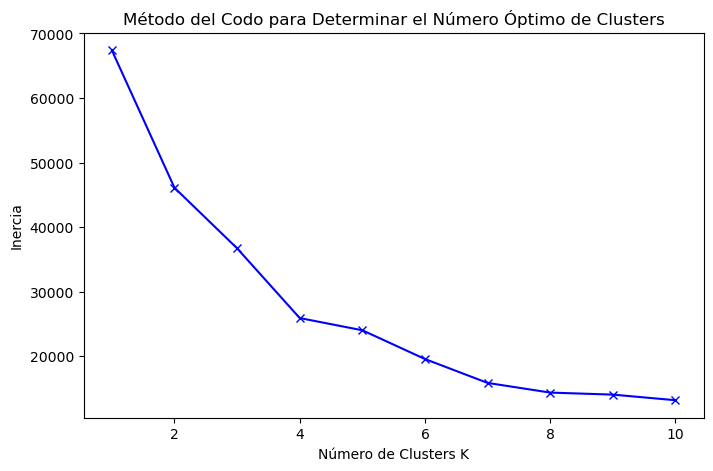

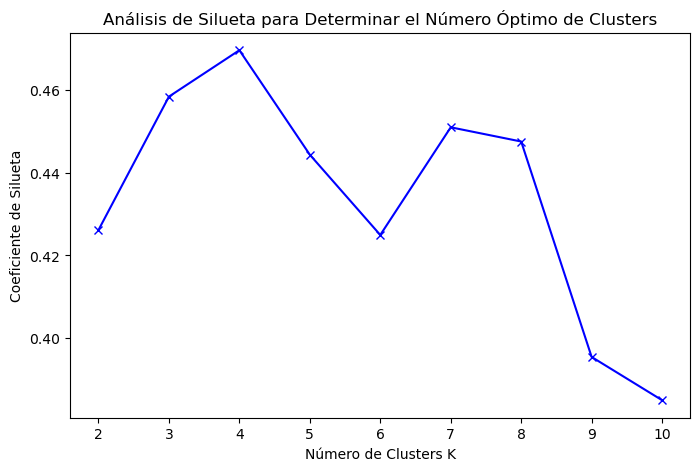

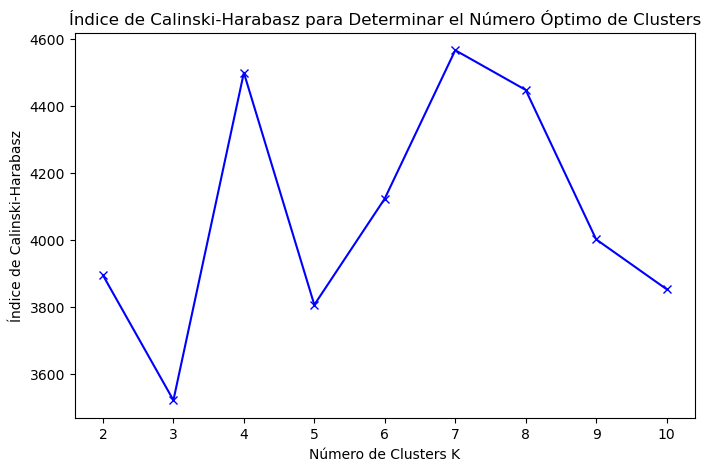

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Método del codo
inercia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_segmentacion)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, 'bx-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

# Coeficiente de silueta
silhouette_avg = []
K = range(2, 11)  # El coeficiente de silueta no está definido para k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(datos_segmentacion)
    silhouette_avg.append(silhouette_score(datos_segmentacion, cluster_labels))

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Coeficiente de Silueta')
plt.title('Análisis de Silueta para Determinar el Número Óptimo de Clusters')
plt.show()

# Calcular el índice de Calinski-Harabasz
calinski_harabasz_scores = []
K = range(2, 11)  # Este índice no está definido para k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(datos_segmentacion)
    calinski_harabasz_scores.append(calinski_harabasz_score(datos_segmentacion, cluster_labels))

# Graficar el índice de Calinski-Harabasz
plt.figure(figsize=(8, 5))
plt.plot(K, calinski_harabasz_scores, 'bx-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz para Determinar el Número Óptimo de Clusters')
plt.show()

**Análisis de los resultados**:
**Método del Codo**
- Aunque el codo más marcado aparece alrededor de **4 clusters**, la disminución en la inercia entre **2 clusters** y **4 clusters** no es lo suficientemente significativa como para justificar el incremento en la complejidad.
- Con **2 clusters**, se logra un buen balance entre simplicidad y separación inicial de los datos.

**Coeficiente de Silueta**
- El valor máximo del coeficiente de silueta se alcanza con **2 clusters** (~0.45), lo que indica que los datos están mejor agrupados internamente y bien separados externamente.
- A medida que se aumenta el número de clusters, el coeficiente disminuye, mostrando que la cohesión y separación de los clusters empeoran.

**Índice de Calinski-Harabasz**
- Este índice también es máximo con **2 clusters**, lo que confirma que esta opción ofrece una buena separación entre clusters y una compactación adecuada.
- Valores más altos del índice indican una mejor formación de clusters, y con **2 clusters** se maximiza.

**Conclusión**
Optaremos por **2 clusters** por considerar que esto nos asegura un modelo de clustering que es fácil de interpretar y manejar y que ofrece un buen equilibrio entre cohesión interna y separación externa, según las métricas evaluadas.

## 4.5 Segmentación mediante K-MEANS
A continuación procedemos a aplicar **K-MEANS** con 2 clusters.

In [72]:
# Número óptimo de clusters
k_optimo = 2  # Reemplaza este valor según los resultados obtenidos

# Aplicar K-Means
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
datos_segmentacion['Cluster'] = kmeans.fit_predict(datos_segmentacion)

# Visualizar los primeros registros con su asignación de cluster
print(datos_segmentacion.head())

         DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  NUM_COMPRAS  \
ID                                                                         
6384286    -0.643523       1.187777                0.547053    -0.611993   
6384667     1.884349      -0.624786               -0.500360    -0.611993   
6387954     1.169462       2.482614                1.694917     3.385035   
6383269    -0.643523      -0.624786               -0.500360    -0.611993   
6386670     2.361147      -0.624786               -0.500360    -0.611993   

         IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                   
6384286        -0.320132                 -0.269379   
6384667        -1.047497                 -0.269379   
6387954         2.231712                 -0.269379   
6383269        -0.718717                 -0.269379   
6386670        -1.047497                 -0.269379   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  Cluster  
ID             

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\1817797902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_segmentacion['Cluster'] = kmeans.fit_predict(datos_segmentacion)


Valores faltantes por columna:
DIASCLIENTE                     0
CONSUMOSTOTAL                   0
EMPRESASUNICAS_CONSULT          0
NUM_COMPRAS                     0
IMPORTE_COMPRAS                 0
FORMAJURIDICA_EMPRESARIO        0
FORMAJURIDICA_PERSONA FISICA    0
FORMAJURIDICA_SOCIEDAD          0
Cluster                         0
dtype: int64
Variabilidad de cada columna:
DIASCLIENTE                     1.000119
CONSUMOSTOTAL                   1.000119
EMPRESASUNICAS_CONSULT          1.000119
NUM_COMPRAS                     1.000119
IMPORTE_COMPRAS                 1.000119
FORMAJURIDICA_EMPRESARIO        1.000119
FORMAJURIDICA_PERSONA FISICA    1.000119
FORMAJURIDICA_SOCIEDAD          1.000119
Cluster                         0.155330
dtype: float64
        PC1       PC2  Cluster
0  0.061000  1.111869        1
1 -0.411848 -2.300810        1
2  4.015364  2.690325        0
3 -1.488032  0.484363        1
4 -1.676200  0.279343        1
                PC1           PC2      Cluster
cou

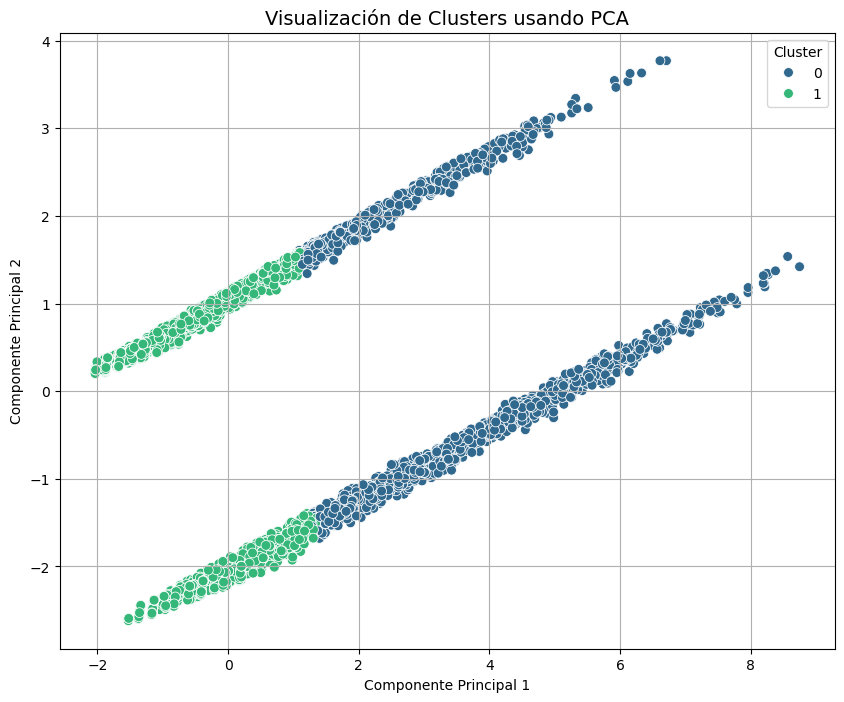

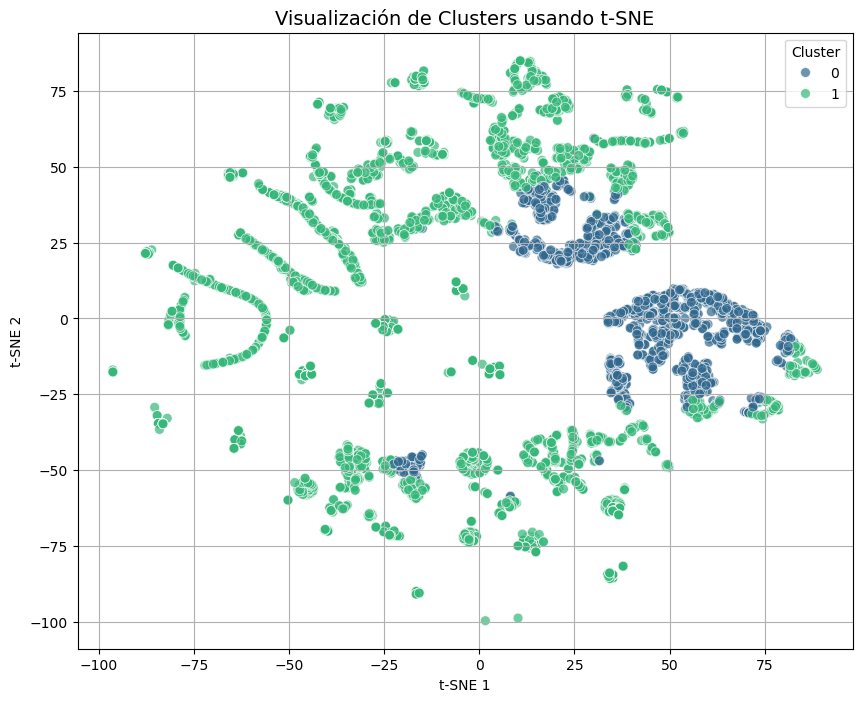

In [73]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Verificar si hay valores faltantes o constantes en datos_segmentacion
print("Valores faltantes por columna:")
print(datos_segmentacion.isnull().sum())

print("Variabilidad de cada columna:")
print(datos_segmentacion.var())

# --- Reducción de dimensionalidad con PCA ---
try:
    pca = PCA(n_components=2)
    pca_resultados = pca.fit_transform(datos_segmentacion.drop('Cluster', axis=1))
except Exception as e:
    print("Error durante la reducción de dimensionalidad con PCA:", e)

# Crear un DataFrame con los resultados de PCA y agregar la columna Cluster
datos_segmentacion_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_segmentacion_pca['Cluster'] = datos_segmentacion['Cluster'].values  

# Verificar que los valores de Cluster se han copiado
print(datos_segmentacion_pca.head())
print(datos_segmentacion_pca.describe())
print("Rango de PC1:", datos_segmentacion_pca['PC1'].min(), datos_segmentacion_pca['PC1'].max())
print("Rango de PC2:", datos_segmentacion_pca['PC2'].min(), datos_segmentacion_pca['PC2'].max())

# Visualizar los clusters en un gráfico 2D con PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=datos_segmentacion_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Visualización de Clusters usando PCA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# --- Reducción de dimensionalidad con t-SNE ---
try:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_resultados = tsne.fit_transform(datos_segmentacion.drop('Cluster', axis=1))
except Exception as e:
    print("Error durante la reducción de dimensionalidad con t-SNE:", e)

# Crear un DataFrame con los resultados de t-SNE y agregar la columna Cluster
datos_segmentacion_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2'])
datos_segmentacion_tsne['Cluster'] = datos_segmentacion['Cluster'].values  # Corregido

# Visualizar los clusters en un gráfico 2D con t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(data=datos_segmentacion_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clusters usando t-SNE', fontsize=14)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


Ahora visualizamos la distribución de 'FORMAJURIDICA_PERSONA FISICA' en los clÚsteres.

Valores faltantes por columna:
DIASCLIENTE                     0
CONSUMOSTOTAL                   0
EMPRESASUNICAS_CONSULT          0
NUM_COMPRAS                     0
IMPORTE_COMPRAS                 0
FORMAJURIDICA_EMPRESARIO        0
FORMAJURIDICA_PERSONA FISICA    0
FORMAJURIDICA_SOCIEDAD          0
Cluster                         0
dtype: int64
Variabilidad de cada columna:
DIASCLIENTE                     1.000119
CONSUMOSTOTAL                   1.000119
EMPRESASUNICAS_CONSULT          1.000119
NUM_COMPRAS                     1.000119
IMPORTE_COMPRAS                 1.000119
FORMAJURIDICA_EMPRESARIO        1.000119
FORMAJURIDICA_PERSONA FISICA    1.000119
FORMAJURIDICA_SOCIEDAD          1.000119
Cluster                         0.155330
dtype: float64


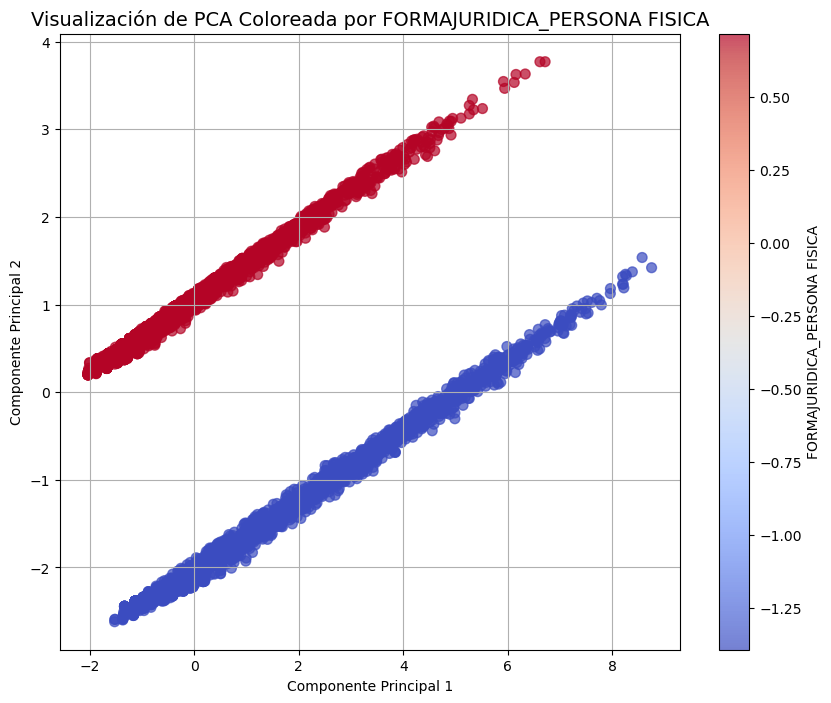

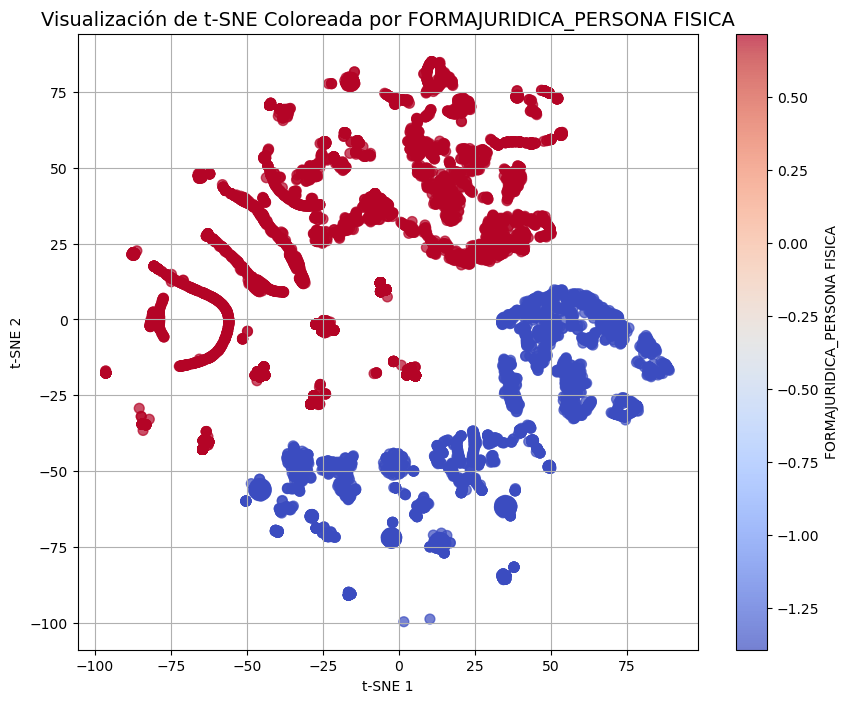

In [75]:
# Verificar si hay valores faltantes o constantes en datos_segmentacion
print("Valores faltantes por columna:")
print(datos_segmentacion.isnull().sum())

print("Variabilidad de cada columna:")
print(datos_segmentacion.var())

# --- Reducción de dimensionalidad con PCA ---
try:
    pca = PCA(n_components=2)
    pca_resultados = pca.fit_transform(datos_segmentacion.drop('Cluster', axis=1))
except Exception as e:
    print("Error durante la reducción de dimensionalidad con PCA:", e)

# Crear un DataFrame con los resultados de PCA y agregar la columna FORMAJURIDICA_PERSONA FISICA
datos_segmentacion_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_segmentacion_pca['FORMAJURIDICA_PERSONA FISICA'] = datos_segmentacion['FORMAJURIDICA_PERSONA FISICA'].values

# Visualizar los resultados de PCA coloreados por FORMAJURIDICA_PERSONA FISICA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    datos_segmentacion_pca['PC1'],
    datos_segmentacion_pca['PC2'],
    c=datos_segmentacion_pca['FORMAJURIDICA_PERSONA FISICA'],  # Colorea por FORMAJURIDICA_PERSONA FISICA
    cmap='coolwarm',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='FORMAJURIDICA_PERSONA FISICA')
plt.title('Visualización de PCA Coloreada por FORMAJURIDICA_PERSONA FISICA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# --- Reducción de dimensionalidad con t-SNE ---
try:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_resultados = tsne.fit_transform(datos_segmentacion.drop('Cluster', axis=1))
except Exception as e:
    print("Error durante la reducción de dimensionalidad con t-SNE:", e)

# Crear un DataFrame con los resultados de t-SNE y agregar la columna FORMAJURIDICA_PERSONA FISICA
datos_segmentacion_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2'])
datos_segmentacion_tsne['FORMAJURIDICA_PERSONA FISICA'] = datos_segmentacion['FORMAJURIDICA_PERSONA FISICA'].values

# Visualizar los resultados de t-SNE coloreados por FORMAJURIDICA_PERSONA FISICA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    datos_segmentacion_tsne['TSNE1'],
    datos_segmentacion_tsne['TSNE2'],
    c=datos_segmentacion_tsne['FORMAJURIDICA_PERSONA FISICA'],  # Colorea por FORMAJURIDICA_PERSONA FISICA
    cmap='coolwarm',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='FORMAJURIDICA_PERSONA FISICA')
plt.title('Visualización de t-SNE Coloreada por FORMAJURIDICA_PERSONA FISICA', fontsize=14)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

## 4.6 Segmentación mediante DBSCAN
Probamos ahora con un algoritmo basado en la densidad usando DBSCAN

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3527113393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_segmentacion['Cluster_DBSCAN'] = dbscan.fit_predict(datos_segmentacion.drop('Cluster', axis=1))


Distribución de clusters encontrados por DBSCAN:
Cluster_DBSCAN
 0    5555
 1    2293
 2     560
-1      17
Name: count, dtype: int64
        PC1       PC2  Cluster_DBSCAN
0  0.061000  1.111869               0
1 -0.411848 -2.300810               1
2  4.015364  2.690325               0
3 -1.488032  0.484363               0
4 -1.676200  0.279343               0
Cluster_DBSCAN
 0    5555
 1    2293
 2     560
-1      17
Name: count, dtype: int64


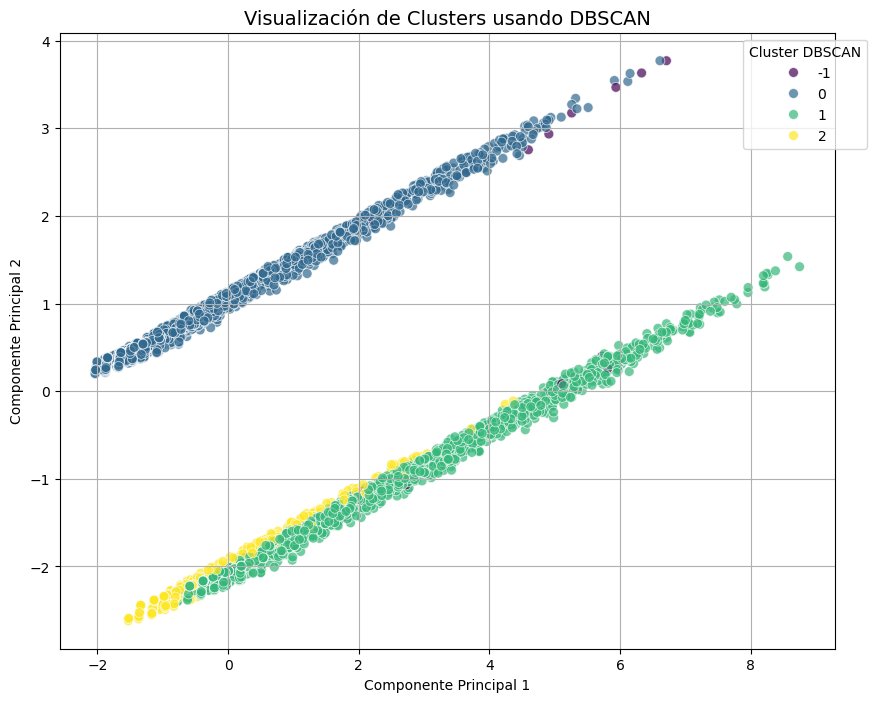

In [77]:
from sklearn.cluster import DBSCAN

# --- Aplicar DBSCAN ---
# Configuración de DBSCAN
dbscan = DBSCAN(eps=2, min_samples=15)
datos_segmentacion['Cluster_DBSCAN'] = dbscan.fit_predict(datos_segmentacion.drop('Cluster', axis=1))

# Verificar la distribución de clusters encontrados
print("Distribución de clusters encontrados por DBSCAN:")
print(datos_segmentacion['Cluster_DBSCAN'].value_counts())

# --- Reducción de dimensionalidad con PCA ---
# Reducir las dimensiones para visualización
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(datos_segmentacion.drop(['Cluster', 'Cluster_DBSCAN'], axis=1))

# Crear un DataFrame con los resultados de PCA y agregar los clusters de DBSCAN
datos_segmentacion_dbscan_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_segmentacion_dbscan_pca['Cluster_DBSCAN'] = datos_segmentacion['Cluster_DBSCAN'].values

# Verificar el contenido del DataFrame
print(datos_segmentacion_dbscan_pca.head())
print(datos_segmentacion_dbscan_pca['Cluster_DBSCAN'].value_counts())

# --- Visualizar los clusters encontrados con DBSCAN ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=datos_segmentacion_dbscan_pca,
    x='PC1',
    y='PC2',
    hue='Cluster_DBSCAN',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Visualización de Clusters usando DBSCAN', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster DBSCAN', loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Visualizamos la distribución de 'FORMAJURIDICA_PERSONA FISICA' en los clústeres con DBSCAN.

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\2109252980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_segmentacion['Cluster_DBSCAN'] = dbscan.fit_predict(datos_segmentacion.drop('Cluster', axis=1))


Distribución de clusters encontrados por DBSCAN:
Cluster_DBSCAN
 0    5555
 1    2293
 2     560
-1      17
Name: count, dtype: int64
        PC1       PC2  Cluster_DBSCAN  FORMAJURIDICA_PERSONA FISICA
0  0.061000  1.111869               0                      0.717456
1 -0.411848 -2.300810               1                     -1.393814
2  4.015364  2.690325               0                      0.717456
3 -1.488032  0.484363               0                      0.717456
4 -1.676200  0.279343               0                      0.717456
Cluster_DBSCAN
 0    5555
 1    2293
 2     560
-1      17
Name: count, dtype: int64


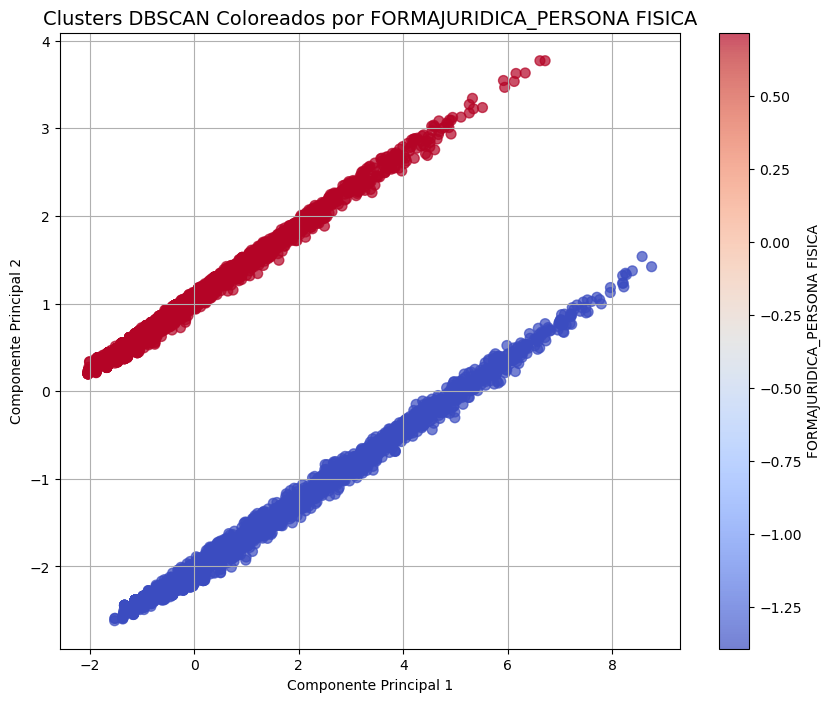

In [79]:
dbscan = DBSCAN(eps=2, min_samples=15)
datos_segmentacion['Cluster_DBSCAN'] = dbscan.fit_predict(datos_segmentacion.drop('Cluster', axis=1))

# Verificar la distribución de clusters encontrados
print("Distribución de clusters encontrados por DBSCAN:")
print(datos_segmentacion['Cluster_DBSCAN'].value_counts())

# --- Reducción de dimensionalidad con PCA ---
# Reducir las dimensiones para visualización
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(datos_segmentacion.drop(['Cluster', 'Cluster_DBSCAN'], axis=1))

# Crear un DataFrame con los resultados de PCA y agregar los clusters de DBSCAN y FORMAJURIDICA_SOCIEDAD
datos_segmentacion_dbscan_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_segmentacion_dbscan_pca['Cluster_DBSCAN'] = datos_segmentacion['Cluster_DBSCAN'].values
datos_segmentacion_dbscan_pca['FORMAJURIDICA_PERSONA FISICA'] = datos_segmentacion['FORMAJURIDICA_PERSONA FISICA'].values

# Verificar el contenido del DataFrame
print(datos_segmentacion_dbscan_pca.head())
print(datos_segmentacion_dbscan_pca['Cluster_DBSCAN'].value_counts())

# --- Visualizar los clusters encontrados con DBSCAN coloreados por FORMAJURIDICA_SOCIEDAD ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    datos_segmentacion_dbscan_pca['PC1'],
    datos_segmentacion_dbscan_pca['PC2'],
    c=datos_segmentacion_dbscan_pca['FORMAJURIDICA_PERSONA FISICA'],  # Colorear por FORMAJURIDICA_SOCIEDAD
    cmap='coolwarm',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='FORMAJURIDICA_PERSONA FISICA')  # Barra de color para FORMAJURIDICA_SOCIEDAD
plt.title('Clusters DBSCAN Coloreados por FORMAJURIDICA_PERSONA FISICA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# 5. Segunda segmentación por frecuencia y monto

Seleccionamos `NUM_COMPRAS` (frecuencia) e `IMPORTE_COMPRAS` (monto) junto con `FORMAJURIDICA`. Utilizaremos DBSCAN dada la distribución alargada de los clústeres.

In [81]:
columnas_seleccionadas = [
    "NUM_COMPRAS",
    "IMPORTE_COMPRAS",
    "FORMAJURIDICA_EMPRESARIO",
    "FORMAJURIDICA_PERSONA FISICA",
    "FORMAJURIDICA_SOCIEDAD"
]

# Crear un nuevo DataFrame con las columnas seleccionadas
datos_frecuencia_monto_df = datos_segmentacion[columnas_seleccionadas]

# Mostrar las primeras filas del nuevo DataFrame
print(datos_frecuencia_monto_df.head())

display(datos_frecuencia_monto_df.head())

         NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384286    -0.611993        -0.320132                 -0.269379   
6384667    -0.611993        -1.047497                 -0.269379   
6387954     3.385035         2.231712                 -0.269379   
6383269    -0.611993        -0.718717                 -0.269379   
6386670    -0.611993        -1.047497                 -0.269379   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  
ID                                                             
6384286                      0.717456               -0.611506  
6384667                     -1.393814                1.635306  
6387954                      0.717456               -0.611506  
6383269                      0.717456               -0.611506  
6386670                      0.717456               -0.611506  


NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384286    -0.611993        -0.320132                 -0.269379   
6384667    -0.611993        -1.047497                 -0.269379   
6387954     3.385035         2.231712                 -0.269379   
6383269    -0.611993        -0.718717                 -0.269379   
6386670    -0.611993        -1.047497                 -0.269379   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  
ID                                                             
6384286                      0.717456               -0.611506  
6384667                     -1.393814                1.635306  
6387954                      0.717456               -0.611506  
6383269                      0.717456               -0.611506  
6386670                      0.717456               -0.611506

## 5.1 DBSCAN por frecuencia y monto

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3930217231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_frecuencia_monto_df['Cluster_DBSCAN'] = dbscan.fit_predict(datos_frecuencia_monto_df)


Distribución de clusters encontrados por DBSCAN:
Cluster_DBSCAN
0    5562
1    2293
2     570
Name: count, dtype: int64
        PC1       PC2  Cluster_DBSCAN  FORMAJURIDICA_PERSONA FISICA
0 -1.140984 -0.208311               0                      0.717456
1  0.855808  1.612105               1                     -1.393814
2  1.780818 -3.180282               0                      0.717456
3 -1.336517 -0.043562               0                      0.717456
4 -1.497806  0.092335               0                      0.717456
Cluster_DBSCAN
0    5562
1    2293
2     570
Name: count, dtype: int64


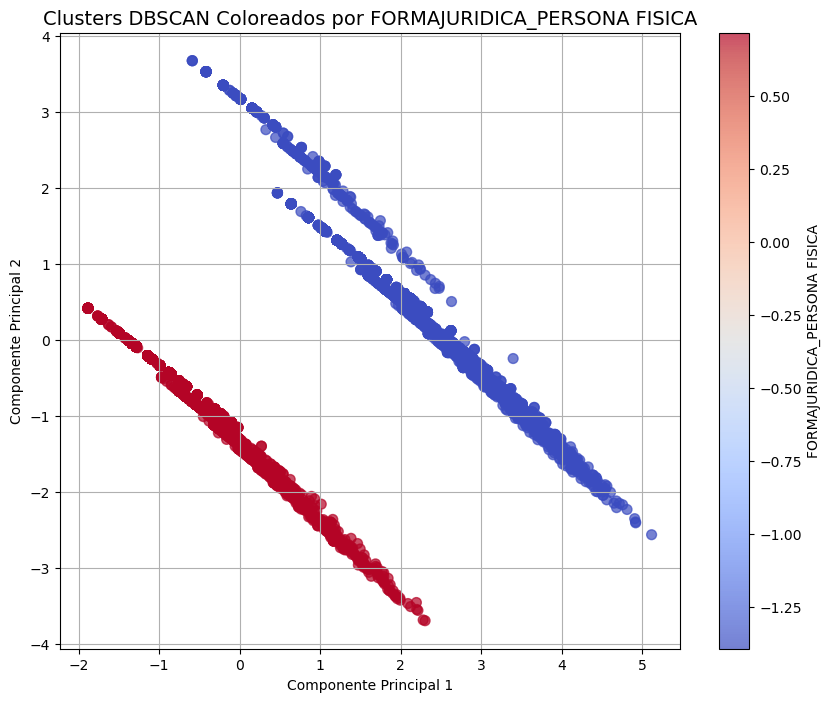

In [83]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=2, min_samples=15)
datos_frecuencia_monto_df['Cluster_DBSCAN'] = dbscan.fit_predict(datos_frecuencia_monto_df)

# Verificar la distribución de clusters encontrados
print("Distribución de clusters encontrados por DBSCAN:")
print(datos_frecuencia_monto_df['Cluster_DBSCAN'].value_counts())

# --- Reducción de dimensionalidad con PCA ---
# Reducir las dimensiones para visualización
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(datos_frecuencia_monto_df.drop(['Cluster_DBSCAN'], axis=1))

# Crear un DataFrame con los resultados de PCA y agregar los clusters de DBSCAN y FORMAJURIDICA_PERSONA FISICA
datos_frecuencia_monto_df_dbscan_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_frecuencia_monto_df_dbscan_pca['Cluster_DBSCAN'] = datos_frecuencia_monto_df['Cluster_DBSCAN'].values
datos_frecuencia_monto_df_dbscan_pca['FORMAJURIDICA_PERSONA FISICA'] = datos_frecuencia_monto_df['FORMAJURIDICA_PERSONA FISICA'].values

# Verificar el contenido del DataFrame
print(datos_frecuencia_monto_df_dbscan_pca.head())
print(datos_frecuencia_monto_df_dbscan_pca['Cluster_DBSCAN'].value_counts())

# --- Visualizar los clusters encontrados con DBSCAN coloreados por FORMAJURIDICA_PERSONA FISICA ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    datos_frecuencia_monto_df_dbscan_pca['PC1'],
    datos_frecuencia_monto_df_dbscan_pca['PC2'],
    c=datos_frecuencia_monto_df_dbscan_pca['FORMAJURIDICA_PERSONA FISICA'],  # Colorear por FORMAJURIDICA_PERSONA FISICA
    cmap='coolwarm',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='FORMAJURIDICA_PERSONA FISICA')  # Barra de color para FORMAJURIDICA_PERSONA FISICA
plt.title('Clusters DBSCAN Coloreados por FORMAJURIDICA_PERSONA FISICA', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


## 5.2 Estudio de la distribución
Comenzamos aplicando ANOVA a DBSCAN y a continuación estudiamos la distribución de las diferentes variables.

In [85]:
from scipy.stats import f_oneway

# Filtrar las observaciones que no son ruido
datos_clustering = datos_frecuencia_monto_df[datos_frecuencia_monto_df['Cluster_DBSCAN'] != -1]

variables = ['NUM_COMPRAS', 'IMPORTE_COMPRAS', 'FORMAJURIDICA_PERSONA FISICA']  # Añade otras columnas si es necesario
resultados_anova = {}

for var in variables:
    grupos = [datos_clustering[datos_clustering['Cluster_DBSCAN'] == cluster][var] for cluster in datos_clustering['Cluster_DBSCAN'].unique()]
    f_stat, p_value = f_oneway(*grupos)
    resultados_anova[var] = {'F-Statistic': f_stat, 'p-value': p_value}

# Mostrar los resultados de ANOVA
import pandas as pd
resultados_anova_df = pd.DataFrame(resultados_anova).T
print(resultados_anova_df)

correlaciones = datos_clustering.corr()['Cluster_DBSCAN'].sort_values(ascending=False)
print("Correlaciones entre Cluster_DBSCAN y las variables:")
print(correlaciones)

                              F-Statistic        p-value
NUM_COMPRAS                    199.231630   2.879371e-85
IMPORTE_COMPRAS                645.865658  1.098380e-261
FORMAJURIDICA_PERSONA FISICA          inf   0.000000e+00
Correlaciones entre Cluster_DBSCAN y las variables:
Cluster_DBSCAN                  1.000000
FORMAJURIDICA_EMPRESARIO        0.698912
FORMAJURIDICA_SOCIEDAD          0.590307
IMPORTE_COMPRAS                 0.198844
NUM_COMPRAS                     0.121436
FORMAJURIDICA_PERSONA FISICA   -0.925297
Name: Cluster_DBSCAN, dtype: float64


C:\Users\diego\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


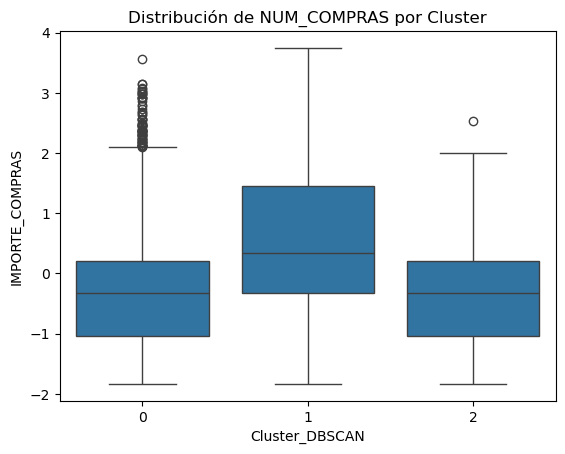

In [86]:
sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS')
plt.title('Distribución de NUM_COMPRAS por Cluster')
plt.show()

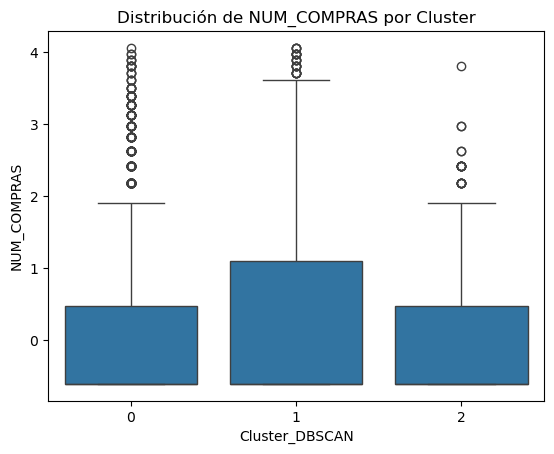

In [87]:
sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='NUM_COMPRAS')
plt.title('Distribución de NUM_COMPRAS por Cluster')
plt.show()

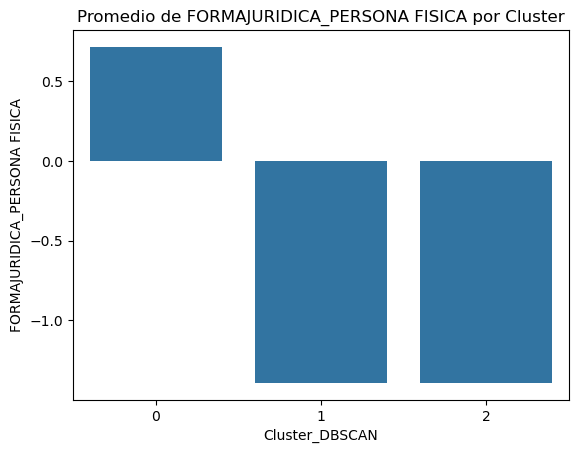

In [88]:
sns.barplot(data=datos_clustering, x='Cluster_DBSCAN', y='FORMAJURIDICA_PERSONA FISICA', estimator=np.mean)
plt.title('Promedio de FORMAJURIDICA_PERSONA FISICA por Cluster')
plt.show()

Resumen estadístico por cluster:
   Cluster_DBSCAN  NUM_COMPRAS_mean  NUM_COMPRAS_std  NUM_COMPRAS_min  \
0               0             -0.13             0.88            -0.61   
1               1              0.35             1.20            -0.61   
2               2             -0.15             0.84            -0.61   

   NUM_COMPRAS_max  IMPORTE_COMPRAS_mean  IMPORTE_COMPRAS_std  \
0             4.06                 -0.22                 0.82   
1             4.06                  0.60                 1.18   
2             3.80                 -0.30                 0.82   

   IMPORTE_COMPRAS_min  IMPORTE_COMPRAS_max  \
0                -1.83                 3.57   
1                -1.83                 3.75   
2                -1.83                 2.53   

   FORMAJURIDICA_PERSONA FISICA_mean  FORMAJURIDICA_PERSONA FISICA_std  \
0                               0.72                              0.00   
1                              -1.39                              0.00   
2 

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\686305358.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')


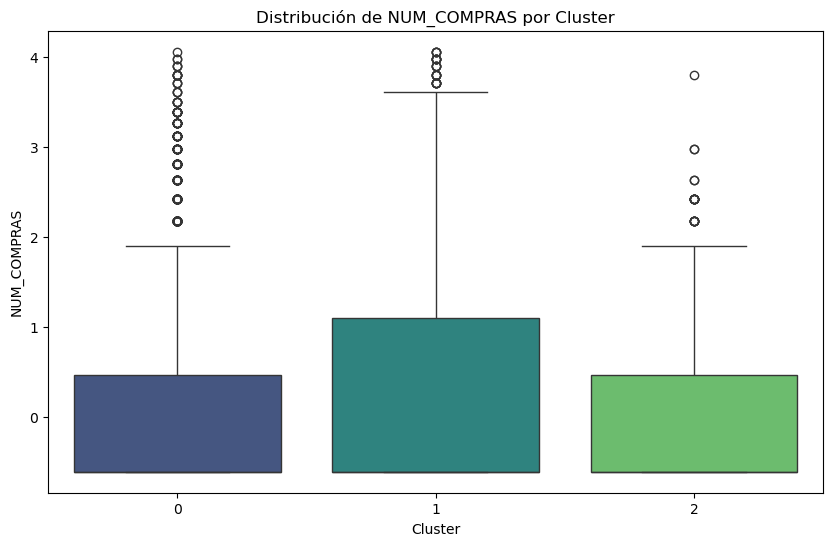

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\686305358.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')


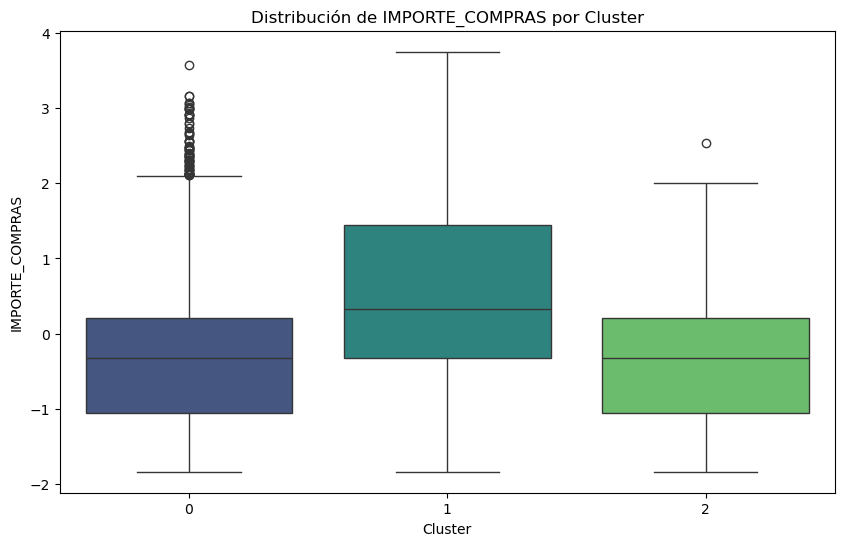

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\686305358.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='FORMAJURIDICA_PERSONA FISICA', palette='viridis')


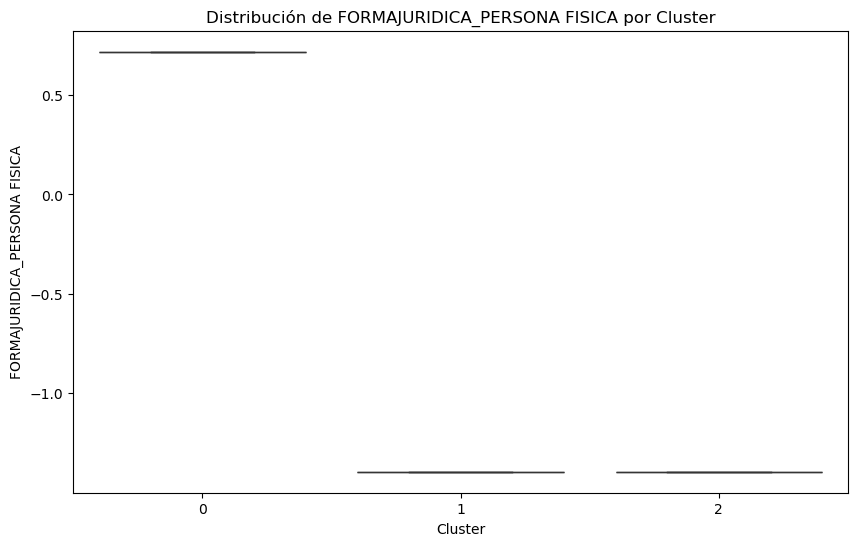

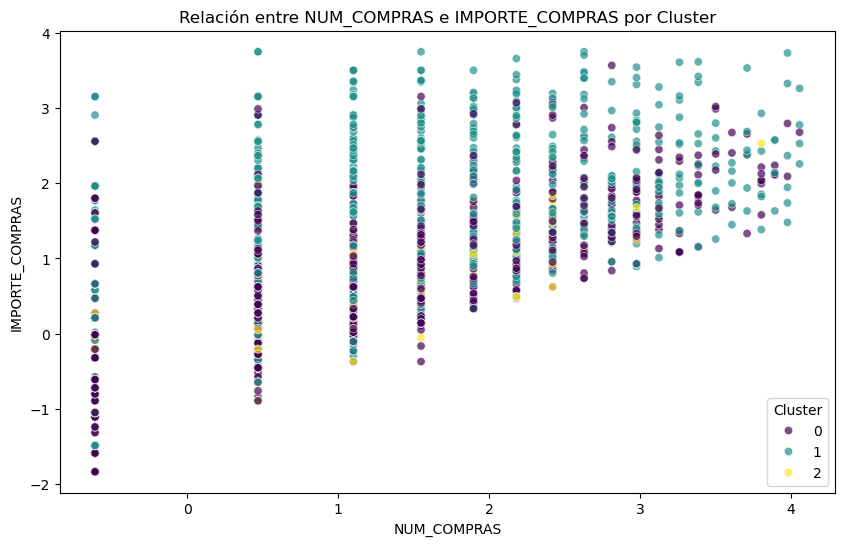

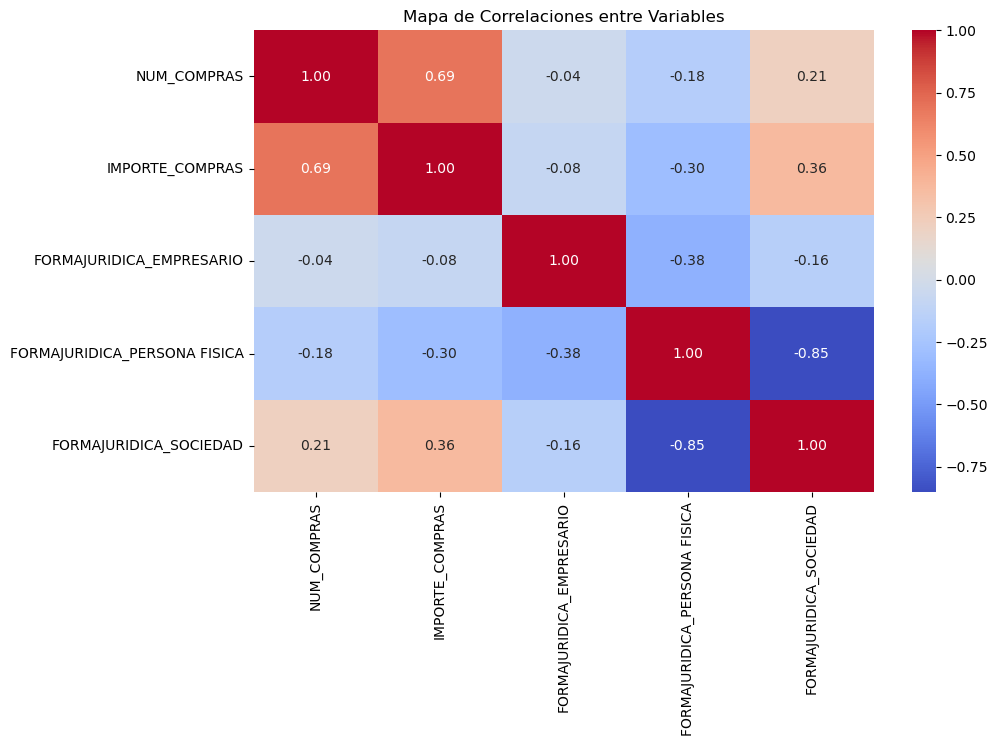

Resultados de ANOVA:
                              F-Statistic  p-value
NUM_COMPRAS                        199.23     0.00
IMPORTE_COMPRAS                    645.87     0.00
FORMAJURIDICA_PERSONA FISICA          inf     0.00


C:\Users\diego\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [89]:
from scipy.stats import f_oneway

# --- Paso 1: Resumen Estadístico por Cluster ---
# Filtrar las observaciones que no son ruido
datos_clustering = datos_frecuencia_monto_df[datos_frecuencia_monto_df['Cluster_DBSCAN'] != -1]

# Resumen estadístico por cluster
resumen_cluster = datos_clustering.groupby('Cluster_DBSCAN').agg({
    'NUM_COMPRAS': ['mean', 'std', 'min', 'max'],
    'IMPORTE_COMPRAS': ['mean', 'std', 'min', 'max'],
    'FORMAJURIDICA_PERSONA FISICA': ['mean', 'std', 'min', 'max']
})

# Renombrar columnas para mayor claridad
resumen_cluster.columns = ['_'.join(col).strip() for col in resumen_cluster.columns.values]
resumen_cluster.reset_index(inplace=True)

# Mostrar el resumen
pd.options.display.float_format = '{:.2f}'.format
print("Resumen estadístico por cluster:")
print(resumen_cluster)

# --- Paso 2: Boxplots para Visualizar Distribuciones ---
# Visualizar la distribución de NUM_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')
plt.title('Distribución de NUM_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('NUM_COMPRAS')
plt.show()

# Visualizar la distribución de IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')
plt.title('Distribución de IMPORTE_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('IMPORTE_COMPRAS')
plt.show()

# Visualizar la distribución de FORMAJURIDICA_PERSONA FISICA por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering, x='Cluster_DBSCAN', y='FORMAJURIDICA_PERSONA FISICA', palette='viridis')
plt.title('Distribución de FORMAJURIDICA_PERSONA FISICA por Cluster')
plt.xlabel('Cluster')
plt.ylabel('FORMAJURIDICA_PERSONA FISICA')
plt.show()

# --- Paso 3: Relación entre Variables por Cluster ---
# Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_clustering,
    x='NUM_COMPRAS',
    y='IMPORTE_COMPRAS',
    hue='Cluster_DBSCAN',
    palette='viridis',
    alpha=0.7
)
plt.title('Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por Cluster')
plt.xlabel('NUM_COMPRAS')
plt.ylabel('IMPORTE_COMPRAS')
plt.legend(title='Cluster')
plt.show()

# --- Paso 4: Heatmap para Analizar Correlaciones ---
# Heatmap de correlaciones
plt.figure(figsize=(10, 6))
correlaciones_cluster = datos_clustering.drop(['Cluster_DBSCAN'], axis=1).corr()
sns.heatmap(correlaciones_cluster, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlaciones entre Variables')
plt.show()

# --- Paso 5: Análisis ANOVA para Determinar Influencia ---
variables = ['NUM_COMPRAS', 'IMPORTE_COMPRAS', 'FORMAJURIDICA_PERSONA FISICA']
resultados_anova = {}

for var in variables:
    grupos = [datos_clustering[datos_clustering['Cluster_DBSCAN'] == cluster][var] for cluster in datos_clustering['Cluster_DBSCAN'].unique()]
    f_stat, p_value = f_oneway(*grupos)
    resultados_anova[var] = {'F-Statistic': f_stat, 'p-value': p_value}

# Mostrar los resultados de ANOVA
resultados_anova_df = pd.DataFrame(resultados_anova).T
print("Resultados de ANOVA:")
print(resultados_anova_df)


## 5.3 K-Medoids por frecuencia y monto

C:\Users\diego\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3199376981.py:8: SettingWithCopyWarning: 


Distribución de clusters encontrados por K-Medoids:
Cluster_KMedoids
0    8425
Name: count, dtype: int64


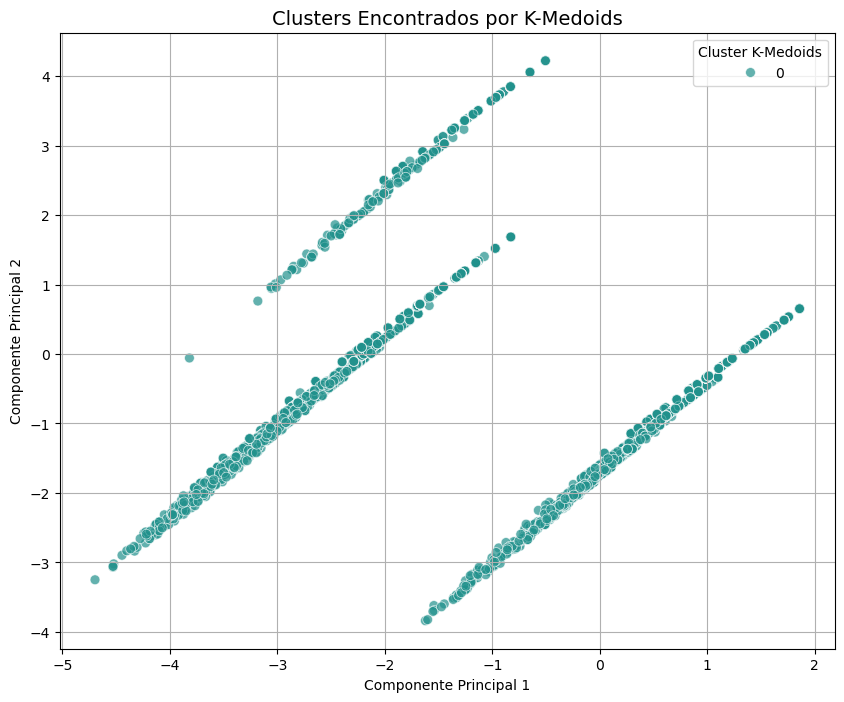

In [91]:
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

# --- Aplicar K-Medoids ---
# Configurar y ajustar el modelo K-Medoids
kmedoids = KMedoids(n_clusters=5, random_state=42)  # Ajusta el número de clusters según tus necesidades
datos_frecuencia_monto_df['Cluster_KMedoids'] = kmedoids.fit_predict(datos_frecuencia_monto_df)

# Verificar la distribución de clusters encontrados
print("Distribución de clusters encontrados por K-Medoids:")
print(datos_frecuencia_monto_df['Cluster_KMedoids'].value_counts())

# --- Reducción de dimensionalidad con PCA ---
# Reducir las dimensiones para visualización
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(datos_frecuencia_monto_df.drop(['Cluster_KMedoids'], axis=1))

# Crear un DataFrame con los resultados de PCA y agregar los clusters de K-Medoids
datos_frecuencia_monto_df_kmedoids_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
datos_frecuencia_monto_df_kmedoids_pca['Cluster_KMedoids'] = datos_frecuencia_monto_df['Cluster_KMedoids'].values

# --- Visualizar los clusters encontrados con K-Medoids ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=datos_frecuencia_monto_df_kmedoids_pca,
    x='PC1',
    y='PC2',
    hue='Cluster_KMedoids',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Clusters Encontrados por K-Medoids', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster K-Medoids', loc='best')
plt.grid(True)
plt.show()

In [92]:
display(datos_frecuencia_monto_df.head())

NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384286        -0.61            -0.32                     -0.27   
6384667        -0.61            -1.05                     -0.27   
6387954         3.39             2.23                     -0.27   
6383269        -0.61            -0.72                     -0.27   
6386670        -0.61            -1.05                     -0.27   

         FORMAJURIDICA_PERSONA FISICA  FORMAJURIDICA_SOCIEDAD  Cluster_DBSCAN  \
ID                                                                              
6384286                          0.72                   -0.61               0   
6384667                         -1.39                    1.64               1   
6387954                          0.72                   -0.61               0   
6383269                          0.72                   -0.61               0   
6386670                          0.72                   -0.61               0   

         Cluster_KMedoids  
ID                         
6384286                 0  
6384667                 0  
6387954                 0  
6383269                 0  
6386670                 0

# 6. Segmentación por frecuencia y monto para personas juridicas
## 6.1 Preparación del dataframe

In [94]:
# Dividir el DataFrame según el valor de FORMAJURIDICA_PERSONA FISICA
persona_fisica_df = clientes_encoded_df[clientes_encoded_df['FORMAJURIDICA_PERSONA FISICA'] == True]
persona_juridica_df = clientes_encoded_df[clientes_encoded_df['FORMAJURIDICA_PERSONA FISICA'] == False]

# Mostrar la cantidad de entradas en cada DataFrame
print(f"Entradas donde FORMAJURIDICA_PERSONA FISICA es positiva (True): {len(persona_fisica_df)}")
print(f"Entradas donde FORMAJURIDICA_PERSONA FISICA es negativa o cero (False): {len(persona_juridica_df)}")

# Eliminar la columna FORMAJURIDICA_PERSONA FISICA
persona_juridica_df = persona_juridica_df.drop('FORMAJURIDICA_PERSONA FISICA', axis=1)

# Mostrar las primeras filas del DataFrame actualizado
print("Primeras filas de persona_juridica_df después de eliminar FORMAJURIDICA_PERSONA FISICA:")
display(persona_juridica_df.head())

Entradas donde FORMAJURIDICA_PERSONA FISICA es positiva (True): 5562
Entradas donde FORMAJURIDICA_PERSONA FISICA es negativa o cero (False): 2863
Primeras filas de persona_juridica_df después de eliminar FORMAJURIDICA_PERSONA FISICA:


CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL  \
ID                                              
6384667            WEB             No Campaña   
6366812    Directorios             No Campaña   
6368307    Directorios             No Campaña   
6366276            WEB             No Campaña   
6366553            SEM             No Campaña   

                                               DESC_SECTOR  ESTADO  \
ID                                                                   
6384667               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
6366812                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
6368307  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
6366276  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
6366553  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

                DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  \
ID                                                                   
6384667               BOGOTA    MICRO  De 5 a 10 Años         5.88   
6366812         CUNDINAMARCA  MEDIANA  Más de 10 Años         0.00   
6368307               BOGOTA  MEDIANA  Más de 10 Años         5.83   
6366276  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años         0.00   
6366553               BOGOTA  PEQUEÑA  Más de 10 Años         1.39   

         CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  \
ID                                                                             
6384667           0.00                    0.00         0.00             2.71   
6366812           2.40                    1.79         2.08             5.56   
6368307           0.69                    0.69         0.00             3.56   
6366276           6.14                    5.46         1.39             7.32   
6366553           3.09                    2.40         0.00             6.91   

         FORMAJURIDICA_EMPRESARIO  FORMAJURIDICA_SOCIEDAD  
ID                                                         
6384667                     False                    True  
6366812                     False                    True  
6368307                     False                    True  
6366276                     False                    True  
6366553                     False                    True

In [95]:
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame codificado para la estandarización
persona_juridica_standarized_df = persona_juridica_df.copy()

# Separar las variables a estandarizar
columnas_a_transformar = ['DIASCLIENTE', 'CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT', 'NUM_COMPRAS', 'IMPORTE_COMPRAS']
variables_a_estandarizar = columnas_a_transformar + [col for col in persona_juridica_df.columns if col.startswith('FORMAJURIDICA_')]

# Estandarizar las variables
scaler = StandardScaler()
persona_juridica_standarized_df[variables_a_estandarizar] = scaler.fit_transform(persona_juridica_df[variables_a_estandarizar])

# Verificar las primeras filas del DataFrame estandarizado
display(persona_juridica_standarized_df.head())

CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL  \
ID                                              
6384667            WEB             No Campaña   
6366812    Directorios             No Campaña   
6368307    Directorios             No Campaña   
6366276            WEB             No Campaña   
6366553            SEM             No Campaña   

                                               DESC_SECTOR  ESTADO  \
ID                                                                   
6384667               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
6366812                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
6368307  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
6366276  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
6366553  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

                DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  \
ID                                                                   
6384667               BOGOTA    MICRO  De 5 a 10 Años         1.82   
6366812         CUNDINAMARCA  MEDIANA  Más de 10 Años        -0.65   
6368307               BOGOTA  MEDIANA  Más de 10 Años         1.80   
6366276  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años        -0.65   
6366553               BOGOTA  PEQUEÑA  Más de 10 Años        -0.07   

         CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  \
ID                                                                             
6384667          -0.77                   -0.64        -0.75            -1.25   
6366812           0.67                    0.65         2.06             0.84   
6368307          -0.35                   -0.14        -0.75            -0.63   
6366276           2.91                    3.31         1.13             2.13   
6366553           1.08                    1.09        -0.75             1.83   

         FORMAJURIDICA_EMPRESARIO  FORMAJURIDICA_SOCIEDAD  
ID                                                         
6384667                     -0.50                    0.50  
6366812                     -0.50                    0.50  
6368307                     -0.50                    0.50  
6366276                     -0.50                    0.50  
6366553                     -0.50                    0.50

In [96]:
columnas_seleccionadas = [
    "NUM_COMPRAS",
    "IMPORTE_COMPRAS",
    "FORMAJURIDICA_EMPRESARIO",
    "FORMAJURIDICA_SOCIEDAD"
]

# Crear un nuevo DataFrame con las columnas seleccionadas
persona_juridica_frecuencia_monto_df = persona_juridica_standarized_df[columnas_seleccionadas]

# Mostrar las primeras filas del nuevo DataFrame
print(persona_juridica_frecuencia_monto_df.head())

display(persona_juridica_frecuencia_monto_df.head())

         NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384667        -0.75            -1.25                     -0.50   
6366812         2.06             0.84                     -0.50   
6368307        -0.75            -0.63                     -0.50   
6366276         1.13             2.13                     -0.50   
6366553        -0.75             1.83                     -0.50   

         FORMAJURIDICA_SOCIEDAD  
ID                               
6384667                    0.50  
6366812                    0.50  
6368307                    0.50  
6366276                    0.50  
6366553                    0.50  


NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384667        -0.75            -1.25                     -0.50   
6366812         2.06             0.84                     -0.50   
6368307        -0.75            -0.63                     -0.50   
6366276         1.13             2.13                     -0.50   
6366553        -0.75             1.83                     -0.50   

         FORMAJURIDICA_SOCIEDAD  
ID                               
6384667                    0.50  
6366812                    0.50  
6368307                    0.50  
6366276                    0.50  
6366553                    0.50

## 6.2 DBSCAN para frecuencia y monto por persona jurídica

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\250999127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'] = dbscan.fit_predict(persona_juridica_frecuencia_monto_df)


Distribución de clusters encontrados por DBSCAN:
Cluster_DBSCAN
 0    1200
 1     699
 2     412
 4     394
 3      79
 5      77
-1       2
Name: count, dtype: int64
    PC1   PC2  Cluster_DBSCAN  FORMAJURIDICA_SOCIEDAD
0 -0.25 -1.53               0                    0.50
1  1.70  1.36               1                    0.50
2  0.03 -1.20               0                    0.50
3  1.93  1.44               1                    0.50
4  1.11  0.09               0                    0.50
Cluster_DBSCAN
 0    1200
 1     699
 2     412
 4     394
 3      79
 5      77
-1       2
Name: count, dtype: int64


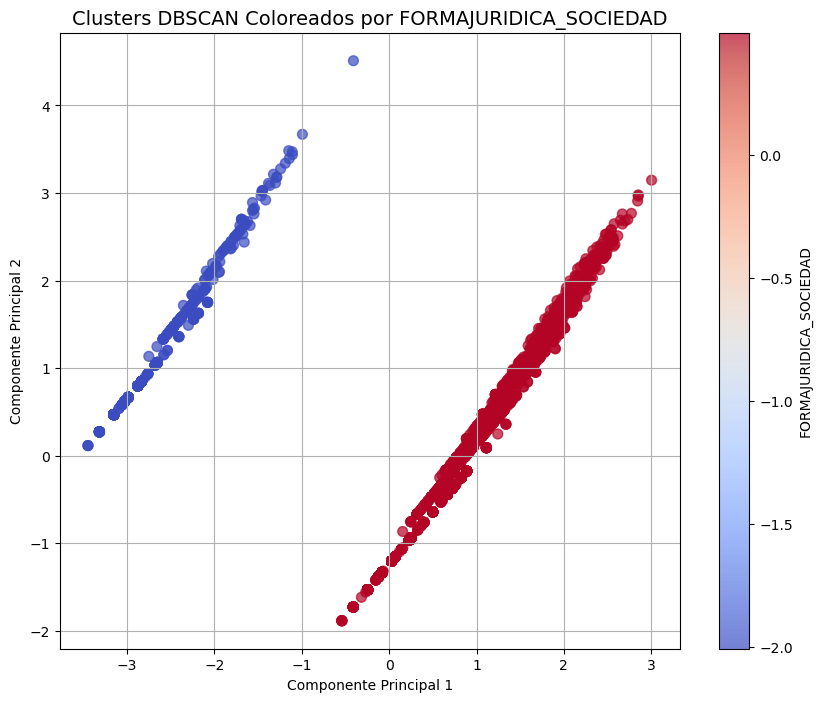

In [98]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.54, min_samples=10)
persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'] = dbscan.fit_predict(persona_juridica_frecuencia_monto_df)

# Verificar la distribución de clusters encontrados
print("Distribución de clusters encontrados por DBSCAN:")
print(persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'].value_counts())

# --- Reducción de dimensionalidad con PCA ---
# Reducir las dimensiones para visualización
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(persona_juridica_frecuencia_monto_df.drop(['Cluster_DBSCAN'], axis=1))

# Crear un DataFrame con los resultados de PCA y agregar los clusters de DBSCAN y FORMAJURIDICA_PERSONA FISICA
persona_juridica_frecuencia_monto_df_dbscan_pca = pd.DataFrame(pca_resultados, columns=['PC1', 'PC2'])
persona_juridica_frecuencia_monto_df_dbscan_pca['Cluster_DBSCAN'] = persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'].values
persona_juridica_frecuencia_monto_df_dbscan_pca['FORMAJURIDICA_SOCIEDAD'] = persona_juridica_frecuencia_monto_df['FORMAJURIDICA_SOCIEDAD'].values

# Verificar el contenido del DataFrame
print(persona_juridica_frecuencia_monto_df_dbscan_pca.head())
print(persona_juridica_frecuencia_monto_df_dbscan_pca['Cluster_DBSCAN'].value_counts())

# --- Visualizar los clusters encontrados con DBSCAN coloreados por FORMAJURIDICA_PERSONA FISICA ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    persona_juridica_frecuencia_monto_df_dbscan_pca['PC1'],
    persona_juridica_frecuencia_monto_df_dbscan_pca['PC2'],
    c=persona_juridica_frecuencia_monto_df_dbscan_pca['FORMAJURIDICA_SOCIEDAD'],  # Colorear por FORMAJURIDICA_SOCIEDAD
    cmap='coolwarm',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='FORMAJURIDICA_SOCIEDAD')  # Barra de color para FORMAJURIDICA_SOCIEDAD
plt.title('Clusters DBSCAN Coloreados por FORMAJURIDICA_SOCIEDAD', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

## 6.3 Análisis de la distribución de las variables

Resumen estadístico por cluster:
   Cluster_DBSCAN  NUM_COMPRAS_mean  NUM_COMPRAS_std  NUM_COMPRAS_min  \
0               0             -0.75             0.00            -0.75   
1               1              1.46             0.68             0.74   
2               2             -0.75             0.00            -0.75   
3               3              0.19             0.00             0.19   
4               4              0.19             0.00             0.19   
5               5              1.21             0.46             0.74   

   NUM_COMPRAS_max  IMPORTE_COMPRAS_mean  IMPORTE_COMPRAS_std  \
0            -0.75                 -0.40                 0.79   
1             3.30                  1.01                 0.80   
2            -0.75                 -0.87                 0.57   
3             0.19                 -0.25                 0.38   
4             0.19                  0.29                 0.77   
5             2.37                  0.34                 0.44   


C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3008051898.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')


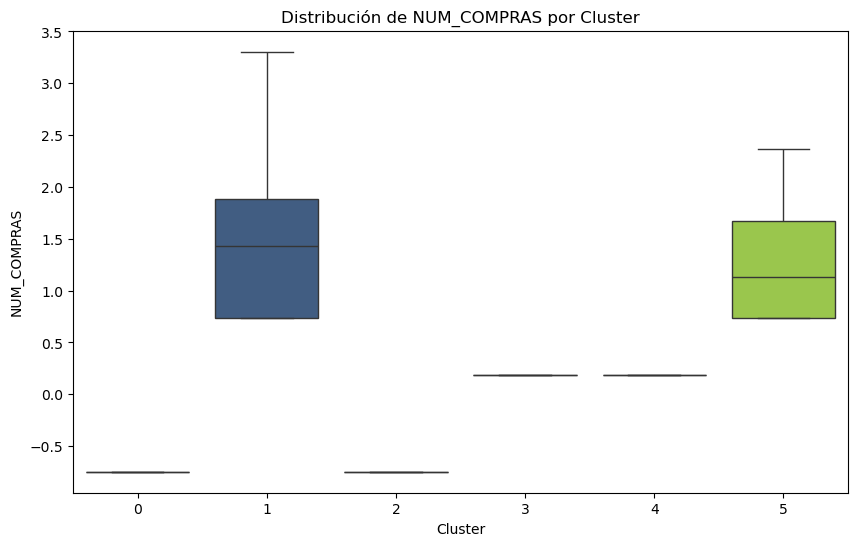

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3008051898.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')


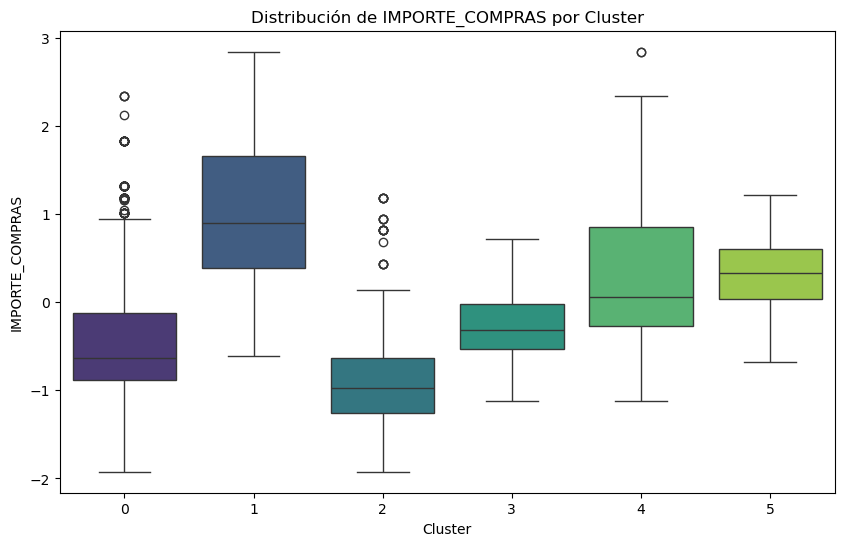

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\3008051898.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='FORMAJURIDICA_SOCIEDAD', palette='viridis')


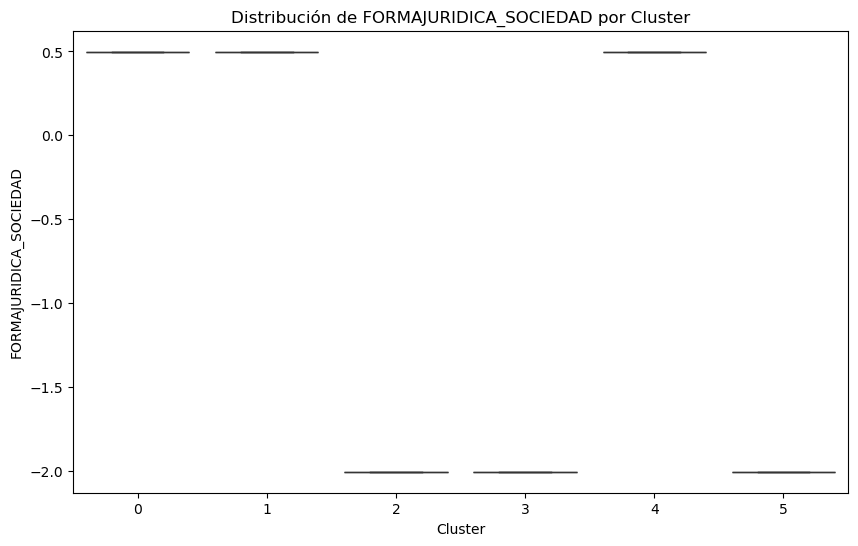

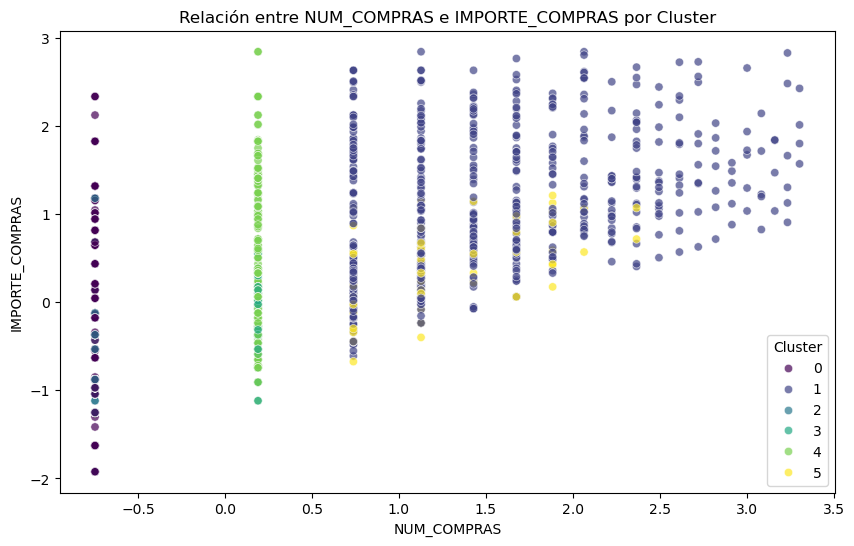

Resultados de ANOVA:
                        F-Statistic  p-value
NUM_COMPRAS                 4186.29     0.00
IMPORTE_COMPRAS              451.53     0.00
FORMAJURIDICA_SOCIEDAD          inf     0.00


C:\Users\diego\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [100]:
# Filtrar las observaciones que no son ruido
datos_clustering_sociedad = persona_juridica_frecuencia_monto_df[persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'] != -1]

# --- Resumen Estadístico por Cluster ---
# Calcular estadísticas descriptivas por cluster
resumen_cluster_sociedad = datos_clustering_sociedad.groupby('Cluster_DBSCAN').agg({
    'NUM_COMPRAS': ['mean', 'std', 'min', 'max'],
    'IMPORTE_COMPRAS': ['mean', 'std', 'min', 'max'],
    'FORMAJURIDICA_SOCIEDAD': ['mean', 'std', 'min', 'max']
})

# Renombrar columnas para mayor claridad
resumen_cluster_sociedad.columns = ['_'.join(col).strip() for col in resumen_cluster_sociedad.columns.values]
resumen_cluster_sociedad.reset_index(inplace=True)

# Mostrar el resumen estadístico
print("Resumen estadístico por cluster:")
print(resumen_cluster_sociedad)

# --- Boxplots para Visualizar Distribuciones ---
# Visualizar la distribución de NUM_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')
plt.title('Distribución de NUM_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('NUM_COMPRAS')
plt.show()

# Visualizar la distribución de IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')
plt.title('Distribución de IMPORTE_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('IMPORTE_COMPRAS')
plt.show()

# Visualizar la distribución de FORMAJURIDICA_SOCIEDAD por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='FORMAJURIDICA_SOCIEDAD', palette='viridis')
plt.title('Distribución de FORMAJURIDICA_SOCIEDAD por Cluster')
plt.xlabel('Cluster')
plt.ylabel('FORMAJURIDICA_SOCIEDAD')
plt.show()

# --- Relación entre Variables por Cluster ---
# Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_clustering_sociedad,
    x='NUM_COMPRAS',
    y='IMPORTE_COMPRAS',
    hue='Cluster_DBSCAN',
    palette='viridis',
    alpha=0.7
)
plt.title('Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por Cluster')
plt.xlabel('NUM_COMPRAS')
plt.ylabel('IMPORTE_COMPRAS')
plt.legend(title='Cluster')
plt.show()

# --- Análisis ANOVA para Determinar Influencia ---
variables = ['NUM_COMPRAS', 'IMPORTE_COMPRAS', 'FORMAJURIDICA_SOCIEDAD']
resultados_anova = {}

for var in variables:
    grupos = [datos_clustering_sociedad[datos_clustering_sociedad['Cluster_DBSCAN'] == cluster][var] for cluster in datos_clustering_sociedad['Cluster_DBSCAN'].unique()]
    f_stat, p_value = f_oneway(*grupos)
    resultados_anova[var] = {'F-Statistic': f_stat, 'p-value': p_value}

# Mostrar los resultados de ANOVA
resultados_anova_df = pd.DataFrame(resultados_anova).T
print("Resultados de ANOVA:")
print(resultados_anova_df)


C:\Users\diego\AppData\Local\Temp\ipykernel_19792\762023828.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')


Resumen estadístico por cluster:
   Cluster_DBSCAN  NUM_COMPRAS_mean  NUM_COMPRAS_std  NUM_COMPRAS_min  \
0               0             -0.75             0.00            -0.75   
1               1              1.46             0.68             0.74   
2               2             -0.75             0.00            -0.75   
3               3              0.19             0.00             0.19   
4               4              0.19             0.00             0.19   
5               5              1.21             0.46             0.74   

   NUM_COMPRAS_max  IMPORTE_COMPRAS_mean  IMPORTE_COMPRAS_std  \
0            -0.75                 -0.40                 0.79   
1             3.30                  1.01                 0.80   
2            -0.75                 -0.87                 0.57   
3             0.19                 -0.25                 0.38   
4             0.19                  0.29                 0.77   
5             2.37                  0.34                 0.44   


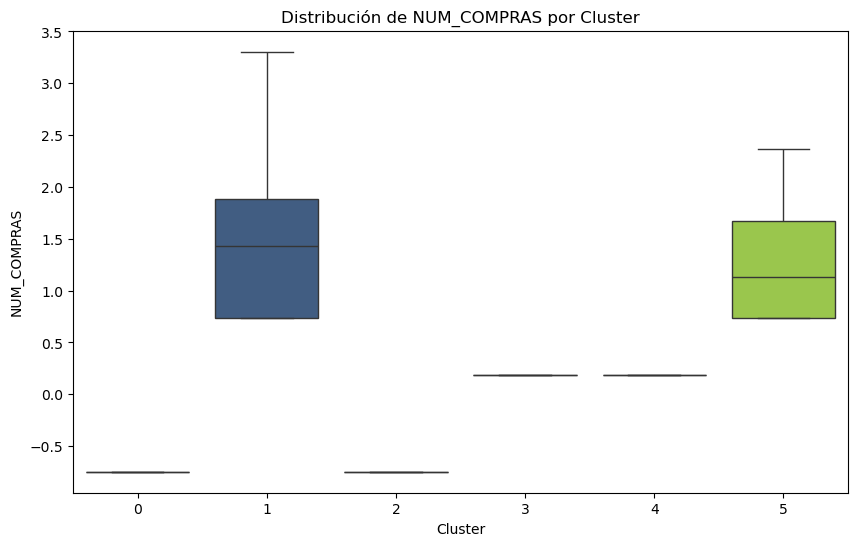

C:\Users\diego\AppData\Local\Temp\ipykernel_19792\762023828.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')


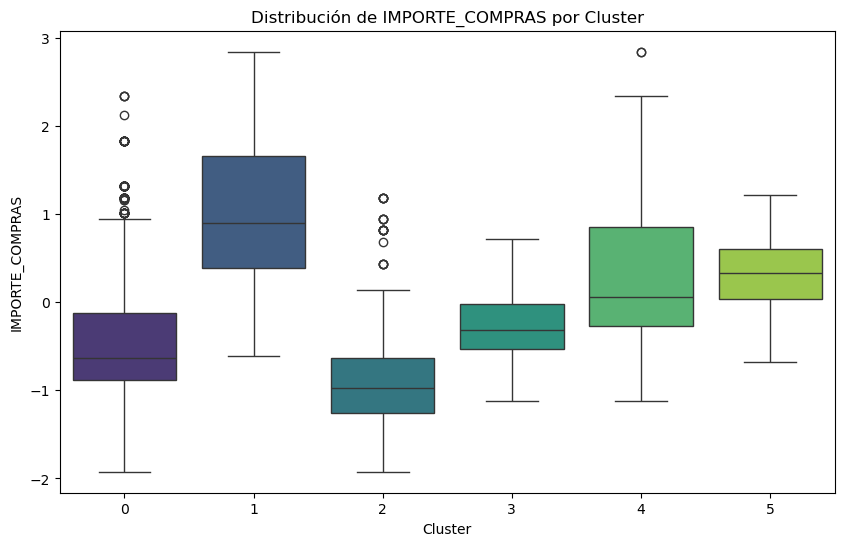

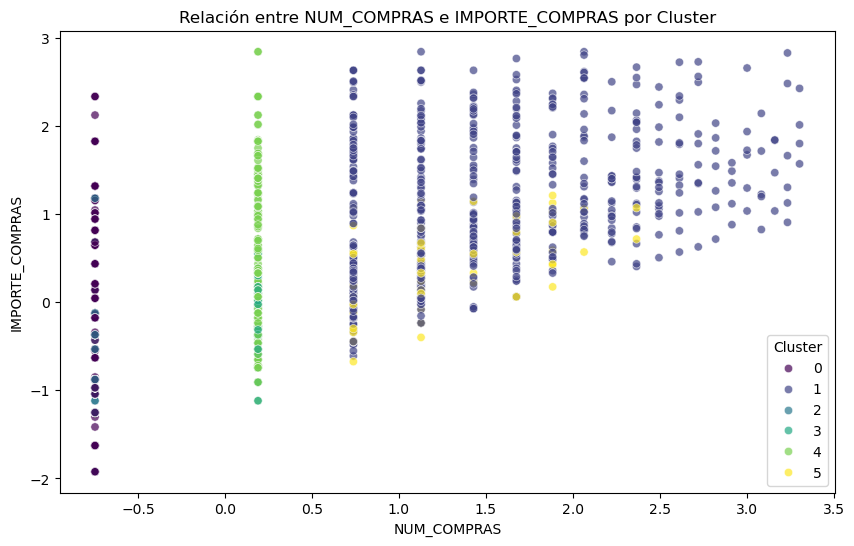

Resultados de ANOVA:
                 F-Statistic  p-value
NUM_COMPRAS          4186.29     0.00
IMPORTE_COMPRAS       451.53     0.00


In [101]:
# Filtrar las observaciones que no son ruido
datos_clustering_sociedad = persona_juridica_frecuencia_monto_df[persona_juridica_frecuencia_monto_df['Cluster_DBSCAN'] != -1]

# --- Resumen Estadístico por Cluster ---
# Calcular estadísticas descriptivas por cluster
resumen_cluster_sociedad = datos_clustering_sociedad.groupby('Cluster_DBSCAN').agg({
    'NUM_COMPRAS': ['mean', 'std', 'min', 'max'],
    'IMPORTE_COMPRAS': ['mean', 'std', 'min', 'max']
})

# Renombrar columnas para mayor claridad
resumen_cluster_sociedad.columns = ['_'.join(col).strip() for col in resumen_cluster_sociedad.columns.values]
resumen_cluster_sociedad.reset_index(inplace=True)

# Mostrar el resumen estadístico
print("Resumen estadístico por cluster:")
print(resumen_cluster_sociedad)

# --- Boxplots para Visualizar Distribuciones ---
# Visualizar la distribución de NUM_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='NUM_COMPRAS', palette='viridis')
plt.title('Distribución de NUM_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('NUM_COMPRAS')
plt.show()

# Visualizar la distribución de IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_clustering_sociedad, x='Cluster_DBSCAN', y='IMPORTE_COMPRAS', palette='viridis')
plt.title('Distribución de IMPORTE_COMPRAS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('IMPORTE_COMPRAS')
plt.show()

# --- Relación entre Variables por Cluster ---
# Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_clustering_sociedad,
    x='NUM_COMPRAS',
    y='IMPORTE_COMPRAS',
    hue='Cluster_DBSCAN',
    palette='viridis',
    alpha=0.7
)
plt.title('Relación entre NUM_COMPRAS e IMPORTE_COMPRAS por Cluster')
plt.xlabel('NUM_COMPRAS')
plt.ylabel('IMPORTE_COMPRAS')
plt.legend(title='Cluster')
plt.show()

# --- Análisis ANOVA para Determinar Influencia ---
variables = ['NUM_COMPRAS', 'IMPORTE_COMPRAS']
resultados_anova = {}

for var in variables:
    grupos = [datos_clustering_sociedad[datos_clustering_sociedad['Cluster_DBSCAN'] == cluster][var] for cluster in datos_clustering_sociedad['Cluster_DBSCAN'].unique()]
    f_stat, p_value = f_oneway(*grupos)
    resultados_anova[var] = {'F-Statistic': f_stat, 'p-value': p_value}

# Mostrar los resultados de ANOVA
resultados_anova_df = pd.DataFrame(resultados_anova).T
print("Resultados de ANOVA:")
print(resultados_anova_df)

**Análisis de los Clústere**s por `NUM_COMPRAS` e `IMPORTE_COMPRAS`
A continuación, se describen las características principales de los clústeres generados por el algoritmo DBSCAN en función de las variables `NUM_COMPRAS` (frecuencia de compras) e `IMPORTE_COMPRAS` (monto de las compras).

---

**Clúster 0**
- **`NUM_COMPRAS`**:
  - Media: -0.75
  - Rango: Constante (-0.75 a -0.75)
- **`IMPORTE_COMPRAS`**:
  - Media: -0.40
  - Rango: -1.92 a 2.34
  - Desviación estándar: 0.79
- **Interpretación**:
  - Este clúster agrupa clientes con **muy baja frecuencia de compras** (`NUM_COMPRAS` es constante y bajo) y un gasto predominantemente negativo o muy bajo.
  - Es un grupo de **clientes inactivos o irrelevantes**.

---

**Clúster 1**
- **`NUM_COMPRAS`**:
  - Media: 1.46
  - Rango: 0.74 a 3.30
  - Desviación estándar: 0.68
- **`IMPORTE_COMPRAS`**:
  - Media: 1.01
  - Rango: -0.61 a 2.84
  - Desviación estándar: 0.80
- **Interpretación**:
  - Este clúster tiene los valores más altos en ambas métricas.
  - Representa a los **clientes más activos y valiosos**, con **alta frecuencia de compras** y **alto gasto**.
  - Debería ser el principal objetivo para estrategias de fidelización y retención.

---

**Clúster 2**
- **`NUM_COMPRAS`**:
  - Media: -0.75
  - Rango: Constante (-0.75 a -0.75)
- **`IMPORTE_COMPRAS`**:
  - Media: -0.87
  - Rango: -1.92 a 1.18
  - Desviación estándar: 0.57
- **Interpretación**:
  - Similar al clúster 0, pero con un gasto promedio más bajo y negativo.
  - Representa **clientes inactivos o irrelevantes**, con **baja frecuencia y gasto nulo o negativo**.

---

**Clúster 3**
- **`NUM_COMPRAS`**:
  - Media: 0.19
  - Rango: Constante (0.19 a 0.19)
- **`IMPORTE_COMPRAS`**:
  - Media: -0.25
  - Rango: -1.12 a 0.72
  - Desviación estándar: 0.38
- **Interpretación**:
  - Clientes con **muy baja frecuencia de compras** y un gasto **predominantemente bajo o negativo**.
  - Este grupo podría incluir clientes ocasionales con poca actividad económica.

---

**Clúster 4**
- **`NUM_COMPRAS`**:
  - Media: 0.19
  - Rango: Constante (0.19 a 0.19)
- **`IMPORTE_COMPRAS`**:
  - Media: 0.29
  - Rango: -1.12 a 2.84
  - Desviación estándar: 0.77
- **Interpretación**:
  - Similar a los clientes del clúster 3 en términos de frecuencia, pero algunos tienen gastos significativamente altos.
  - Representa **clientes esporádicos que ocasionalmente realizan compras de alto valor**.

---

**Clúster 5**
- **`NUM_COMPRAS`**:
  - Media: 1.21
  - Rango: 0.74 a 2.37
  - Desviación estándar: 0.46
- **`IMPORTE_COMPRAS`**:
  - Media: 0.34
  - Rango: -0.67 a 1.21
  - Desviación estándar: 0.44
- **Interpretación**:
  - Clientes con **frecuencia moderada** y **gasto promedio positivo**. Son clientes consistentes y estables, ideales para estrategias de upselling o cross-selling.

---

**Resumen Comparativo de los Clústeres**

| **Clúster** | **`NUM_COMPRAS`**       | **`IMPORTE_COMPRAS`**      | **Descripción**                                     |
|-------------|--------------------------|-----------------------------|-----------------------------------------------------|
| **0**       | Muy bajo (constante)    | Bajo o negativo            | Clientes inactivos o de bajo valor.                |
| **1**       | Alto                    | Alto                       | Clientes más activos y valiosos.                   |
| **2**       | Muy bajo (constante)    | Bajo o negativo            | Clientes inactivos o irrelevantes.                 |
| **3**       | Muy bajo (constante)    | Bajo                       | Clientes ocasionales con bajo impacto.             |
| **4**       | Muy bajo (constante)    | Moderado a alto (variable) | Clientes esporádicos con gastos ocasionalmente altos. |
| **5**       | Moderado                | Moderado                   | Clientes consistentes, gasto equilibrado.     |

---

**Conclusión**
El análisis muestra que los clústeres presentan diferencias claras en la frecuencia de compras y los patrones de gasto, lo que puede ser útil para diseñar estrategias de marketing personalizadas, como enfocarse en los clientes premium del Clúster 1 o entender mejor el comportamiento inconsistente del Clúster 4.

### 6.3.2 Análisis Estratégico de Clústeres

**Fidelización, Cross Selling, Upselling y Exclusión**

A continuación, se analiza cada clúster en función de su potencial para estrategias de fidelización, cross-selling, upselling o exclusión. Este análisis considera los patrones de `NUM_COMPRAS` (frecuencia de compras) e `IMPORTE_COMPRAS` (gasto).

---

**Clústeres y Estrategias**

**Clúster 0** (Muy baja frecuencia y bajo gasto)
- **Características**:
  - Clientes inactivos o muy poco comprometidos.
  - Bajos valores en `NUM_COMPRAS` e `IMPORTE_COMPRAS`.
- **Estrategia Recomendada**: **Ignorar**.
  - Estos clientes no presentan un retorno de inversión atractivo para estrategias de marketing.
  - Podrían requerir un esfuerzo excesivo para activarlos, lo que no justificaría el costo.

---

**Clúster 1** (Alta frecuencia y alto gasto)
- **Características**:
  - Clientes con un alto compromiso: compran frecuentemente y gastan mucho.
  - Representan a los mejores clientes o clientes premium.
- **Estrategia Recomendada**:
  1. **Fidelización**:
     - Implementar programas de lealtad (e.g., descuentos exclusivos, recompensas).
     - Ofrecer atención personalizada para fortalecer su relación con la empresa.
  2. **Upselling**:
     - Ofrecer productos de mayor valor agregado.
     - Proponer upgrades o versiones premium de productos o servicios.
  3. **Cross-Selling**:
     - Promover productos complementarios a sus compras actuales.

---

**Clúster 2** (Baja frecuencia y bajo gasto)
- **Características**:
  - Clientes con bajo compromiso en términos de frecuencia y gasto.
- **Estrategia Recomendada**: **Ignorar**.
  - Similar al Clúster 0, estos clientes tienen un bajo potencial de rentabilidad.
  - La inversión en activarlos probablemente no será efectiva.

---

**Clúster 3** (Muy baja frecuencia, gasto variable con picos altos)
- **Características**:
  - Compras esporádicas, pero algunos clientes realizan gastos significativos.
- **Estrategia Recomendada**:
  1. **Cross-Selling**:
     - Identificar patrones en los productos comprados y sugerir complementos.
  2. **Fidelización**:
     - Incentivar compras más frecuentes mediante descuentos en futuras compras.
  3. **Upselling**:
     - Enfocar esfuerzos en los clientes con picos altos de gasto, ofreciendo productos premium o paquetes más completos.

---

**Clúster 4** (Frecuencia moderada y gasto moderado)
- **Características**:
  - Clientes consistentes con compras regulares y un gasto moderado.
- **Estrategia Recomendada**:
  1. **Fidelización**:
     - Programas de lealtad para mantener la frecuencia de compra.
     - Comunicación regular para fortalecer la relación.
  2. **Cross-Selling**:
     - Ofrecer productos relacionados para incrementar el ticket promedio.
  3. **Upselling**:
     - Introducir productos ligeramente más caros que se ajusten a su comportamiento de compra.

---

**Resumen Estratégico**

| Clúster | Estrategia Recomendada                           | Razón                                                   |
|---------|--------------------------------------------------|---------------------------------------------------------|
| **0**   | **Ignorar**                                      | Muy baja frecuencia y gasto, bajo potencial de retorno. |
| **1**   | **Fidelización, Upselling, Cross-Selling**       | Clientes premium con alta frecuencia y gasto elevado.   |
| **2**   | **Ignorar**                                      | Baja frecuencia y gasto, poco atractivo.               |
| **3**   | **Cross-Selling, Fidelización, Upselling**       | Compras esporádicas con picos altos de gasto.           |
| **4**   | **Fidelización, Cross-Selling, Upselling**       | Clientes moderados con buen potencial de crecimiento.   |

---

**Conclusión**
1. **Clúster 1** es el más adecuado para estrategias completas de fidelización, upselling y cross-selling. Estos clientes son los más valiosos y deben ser prioridad.
2. **Clúster 3** tiene potencial para estrategias dirigidas a clientes de alto gasto ocasional, buscando incrementar frecuencia y diversificación de compras.
3. **Clúster 4** puede crecer mediante cross-selling y upselling, asegurando mantener su comportamiento moderado.
4. **Clústeres 0 y 2** pueden ser ignorados, ya que presentan un bajo retorno potencial para estrategias de marketing.

En nuestra opinión estás estrategias permitirán maximizar la rentabilidad de los clústeres más relevantes a la par que se optimizan los recursos dirigidos a los clientes.

**Análisis Estratégico de los Clústeres**

A continuación, analizamos cada clúster en términos de su idoneidad para **fidelización**, **cross-selling**, **upselling** o si pueden ser **ignorados**.

---

**Clúster 0**
- **Características**:
  - **Muy baja frecuencia de compras** (`NUM_COMPRAS` constante en -0.75).
  - **Bajo gasto o negativo** (`IMPORTE_COMPRAS` media -0.40).
- **Estrategia**:
  - Este clúster representa clientes **inactivos o irrelevantes** con bajo impacto económico.
  - **Acción**: Ignorar o priorizar mínimamente, a menos que existan datos que sugieran un alto potencial de reactivación.

---

**Clúster 1**
- **Características**:
  - **Alta frecuencia de compras** (`NUM_COMPRAS` media 1.46).
  - **Alto gasto promedio** (`IMPORTE_COMPRAS` media 1.01).
- **Estrategia**:
  - Este clúster representa a los **clientes más valiosos**.
  - **Acción**:
    - **Fidelización**: Implementar estrategias de retención como programas de recompensas o descuentos exclusivos.
    - **Cross-selling**: Promover productos complementarios a los que ya compran.
    - **Upselling**: Ofrecer versiones premium de los productos que adquieren.

---

**Clúster 2**
- **Características**:
  - **Muy baja frecuencia de compras** (`NUM_COMPRAS` constante en -0.75).
  - **Bajo gasto o negativo** (`IMPORTE_COMPRAS` media -0.87).
- **Estrategia**:
  - Este clúster es similar al clúster 0, pero con un gasto promedio aún más bajo.
  - **Acción**: Ignorar o priorizar mínimamente, ya que estos clientes no generan valor económico significativo.

---

**Clúster 3**
- **Características**:
  - **Muy baja frecuencia de compras** (`NUM_COMPRAS` constante en 0.19).
  - **Gasto bajo o negativo** (`IMPORTE_COMPRAS` media -0.25).
- **Estrategia**:
  - Este clúster incluye clientes con **muy poca actividad económica**.
  - **Acción**: Ignorar o considerar solo campañas específicas de reactivación si se identifican patrones de potencial.

---

**Clúster 4**
- **Características**:
  - **Muy baja frecuencia de compras** (`NUM_COMPRAS` constante en 0.19).
  - **Gasto moderado a alto ocasional** (`IMPORTE_COMPRAS` media 0.29).
- **Estrategia**:
  - Este clúster incluye **clientes esporádicos** que ocasionalmente generan gastos significativos.
  - **Acción**:
    - **Fidelización**: Diseñar campañas para aumentar su frecuencia de compra.
    - **Cross-selling**: Identificar productos relevantes para ampliar su cartera de compras.
    - **Reactivación**: Enviar promociones personalizadas o comunicaciones para fomentar compras regulares.

---

**Clúster 5**
- **Características**:
  - **Frecuencia moderada de compras** (`NUM_COMPRAS` media 1.21).
  - **Gasto promedio positivo** (`IMPORTE_COMPRAS` media 0.34).
- **Estrategia**:
  - Este clúster representa **clientes consistentes y estables** con potencial para incrementar su valor.
  - **Acción**:
    - **Cross-selling**: Ofrecer productos complementarios a sus compras actuales.
    - **Upselling**: Promover productos de mayor precio o calidad.
    - **Fidelización**: Mantener su lealtad mediante programas de recompensas.

---
**Resumen estratégico**


| **Clúster** | **Estrategia Recomendada**          | **Razón**                                                                 |
|-------------|-------------------------------------|---------------------------------------------------------------------------|
| **0**       | Ignorar                             | Muy baja frecuencia y gasto, bajo potencial de retorno.                  |
| **1**       | Fidelización, Upselling, Cross-Selling | Clientes premium con alta frecuencia y gasto elevado.                    |
| **2**       | Ignorar                             | Muy baja frecuencia y gasto negativo, poco atractivo.                    |
| **3**       | Reactivación                       | Compras muy esporádicas con bajo impacto económico.                      |
| **4**       | Fidelización, Cross-Selling         | Clientes esporádicos con picos ocasionales de gasto significativo.       |
| **5**       | Fidelización, Upselling, Cross-Selling | Clientes consistentes con frecuencia moderada y buen potencial de valor. |

---

**Conclusiones:**
- **Clúster 1**:
  - Máxima prioridad. Estos clientes son los más valiosos y deben ser retenidos activamente con estrategias de fidelización, cross-selling y upselling.
- **Clúster 5**:
  - Alta prioridad. Son clientes estables y consistentes, con buen potencial para estrategias de cross-selling y upselling.
- **Clúster 4**:
  - Moderada prioridad. Clientes esporádicos que pueden ser reactivados y fidelizados para aumentar su frecuencia de compra.
- **Clúster 3**
    - Baja prioridad. Compras muy esporádicas y bajo gasto promedio. Pueden beneficiarse de campañas específicas para aumentar su actividad.
- **Clústeres 0 y 2**:
  - Baja prioridad. Pueden ser ignorados en campañas principales, salvo que se identifiquen oportunidades específicas de reactivación.

Esta estrategia permite enfocar los recursos y energías en los segmentos que generan mayor valor para el negocio.


# 7. Modelo de clasificación
## 7.1 Preparación del dataframe clientes para personas jurídicas

En el paso anterior, realizamos una segmentación por frecuencia y monto para personas jurídicas, obteniendo un DataFrame resultante (`datos_clustering_sociedad`), en el cual cada entrada de persona jurídica fue asignada a un clúster.

A continuación:

1. Asignaremos esos clústeres a las entradas del DataFrame original sin outliers, sin normalizar y sin codificar las variables categóricas (`clientes_departamentos_reducido_sin_outliers_df`).
2. Incorporaremos los outliers de frecuencia y monto correspondientes a los clientes VIP identificados durante la fase de eliminación de outliers (excluyendo aquellos que correspondan a personas físicas).
3. Obtendremos un DataFrame final que incluye:
   - Clientes personas jurídicas, no normalizados y con variables categóricas sin codificar.
   - Los outliers de frecuencia y monto correspondientes a clientes VIP.
   - El clúster al que se asigna cada entrada.

El DataFrame resultante será utilizado como base para construir el modelo de clasificación.

Comenzamos comprobando la distribución de clústeres de `clientes_departamentos_reducido_sin_outliers_df`.

In [106]:
# Contar el número de valores por cada clúster
valores_por_cluster = datos_clustering_sociedad['Cluster_DBSCAN'].value_counts()

print("Cantidad de valores por clúster:")
print(valores_por_cluster)

Cantidad de valores por clúster:
Cluster_DBSCAN
0    1200
1     699
2     412
4     394
3      79
5      77
Name: count, dtype: int64


Comprobamos que `clientes_departamentos_reducido_sin_outliers_df`no a sufrido modificaciones y el número de entradas por cada tipo de `FORMAJURIDICA`.

In [108]:
display(clientes_departamentos_reducido_sin_outliers_df.head())

CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
ID                                                              
6384286            WEB             No Campaña  PERSONA FISICA   
6384667            WEB             No Campaña        SOCIEDAD   
6387954    Directorios             No Campaña  PERSONA FISICA   
6383269    Directorios             No Campaña  PERSONA FISICA   
6386670    Directorios             No Campaña  PERSONA FISICA   

                                  DESC_SECTOR  ESTADO DEPARTAMENTO TAMAÑO  \
ID                                                                          
6384286                              NOSECTOR    VIVA          NaN    NaN   
6384667  ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA  MICRO   
6387954                              NOSECTOR    VIVA          NaN    NaN   
6383269                              NOSECTOR    VIVA          NaN    NaN   
6386670                              NOSECTOR    VIVA          NaN    NaN   

             ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  \
ID                                                                            
6384286             NaN            0             11                       3   
6384667  De 5 a 10 Años          358              1                       1   
6387954             NaN           67             61                      10   
6383269             NaN            0              1                       1   
6386670             NaN         1088              1                       1   

         NUM_COMPRAS  IMPORTE_COMPRAS  
ID                                     
6384286            1               35  
6384667            1               15  
6387954           13              684  
6383269            1               22  
6386670            1               15

In [109]:
forma_juridica_counts = clientes_departamentos_reducido_sin_outliers_df['FORMAJURIDICA'].value_counts()

# Mostrar los resultados
print("Valores únicos en FORMAJURIDICA y el número de entradas:")
print(forma_juridica_counts)

Valores únicos en FORMAJURIDICA y el número de entradas:
FORMAJURIDICA
PERSONA FISICA    5562
SOCIEDAD          2293
EMPRESARIO         570
Name: count, dtype: int64


Revisamos `datos_clustering_sociedad`

In [111]:
display(datos_clustering_sociedad.head())

NUM_COMPRAS  IMPORTE_COMPRAS  FORMAJURIDICA_EMPRESARIO  \
ID                                                                
6384667        -0.75            -1.25                     -0.50   
6366812         2.06             0.84                     -0.50   
6368307        -0.75            -0.63                     -0.50   
6366276         1.13             2.13                     -0.50   
6366553        -0.75             1.83                     -0.50   

         FORMAJURIDICA_SOCIEDAD  Cluster_DBSCAN  
ID                                               
6384667                    0.50               0  
6366812                    0.50               1  
6368307                    0.50               0  
6366276                    0.50               1  
6366553                    0.50               0

A continuación agregamos la información del clúster (`Cluster_DBSCAN`) correspondiente a las personas jurídicas segmentadas en `datos_clustering_sociedad` al dataframe `clientes_departamentos_reducido_sin_outliers_df`. Esto se realiza utilizando la columna `ID` como clave, mediante un `left join`, de modo que se conservan todas las entradas originales del DataFrame base.

In [113]:
# Nos Aseguramos de que 'ID' sea una columna común para realizar el merge
# Si 'ID' está como índice en datos_clustering_sociedad, primero restablecemos el índice
datos_clustering_sociedad_reset = datos_clustering_sociedad.reset_index()

# Realizamos el merge con base en la columna 'ID'
clientes_combinados_df = clientes_departamentos_reducido_sin_outliers_df.merge(
    datos_clustering_sociedad_reset[['ID', 'Cluster_DBSCAN']],  # Seleccionar columnas relevantes
    on='ID',  # Combinar usando la columna 'ID'
    how='left'  # Usar left join para conservar todas las entradas del DataFrame de clientes
)

# Mostrar el resultado
display(clientes_combinados_df.head())

ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
0  6384286            WEB             No Campaña  PERSONA FISICA   
1  6384667            WEB             No Campaña        SOCIEDAD   
2  6387954    Directorios             No Campaña  PERSONA FISICA   
3  6383269    Directorios             No Campaña  PERSONA FISICA   
4  6386670    Directorios             No Campaña  PERSONA FISICA   

                            DESC_SECTOR  ESTADO DEPARTAMENTO TAMAÑO  \
0                              NOSECTOR    VIVA          NaN    NaN   
1  ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA  MICRO   
2                              NOSECTOR    VIVA          NaN    NaN   
3                              NOSECTOR    VIVA          NaN    NaN   
4                              NOSECTOR    VIVA          NaN    NaN   

       ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  \
0             NaN            0             11                       3   
1  De 5 a 10 Años          358              1                       1   
2             NaN           67             61                      10   
3             NaN            0              1                       1   
4             NaN         1088              1                       1   

   NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  
0            1               35             NaN  
1            1               15            0.00  
2           13              684             NaN  
3            1               22             NaN  
4            1               15             NaN

Verificamos la distribución de entradas por clúster (`Cluster_DBSCAN`), incluyendo las entradas con valores `NaN`. Los valores `NaN` corresponden a personas físicas que no fueron segmentadas en `datos_clustering_sociedad`, ya que este proceso se enfocó únicamente en personas jurídicas.

In [115]:
# Contar el número de entradas por cada cluster, incluyendo NaN
conteo_por_cluster = clientes_combinados_df['Cluster_DBSCAN'].value_counts(dropna=False)

# Convertir a DataFrame para mayor claridad
conteo_por_cluster_df = conteo_por_cluster.reset_index()
conteo_por_cluster_df.columns = ['Cluster_DBSCAN', 'Numero_de_Entradas']

# Mostrar los resultados
display(conteo_por_cluster_df)

Cluster_DBSCAN  Numero_de_Entradas
0             NaN                5564
1            0.00                1200
2            1.00                 699
3            2.00                 412
4            4.00                 394
5            3.00                  79
6            5.00                  77

Creamos un DataFrame que contiene a los clientes VIP, seleccionando aquellos identificados como outliers por frecuencia y monto (`NUM_COMPRAS` e `IMPORTE_COMPRAS`). A estos clientes se les asigna un valor de clúster `7` en la columna `Cluster_DBSCAN`.

In [117]:
# Convertir los valores del diccionario outliers_ids a un conjunto para búsqueda eficiente
outliers_ids_set = set(outliers_ids['NUM_COMPRAS']) | set(outliers_ids['IMPORTE_COMPRAS'])

# Restablecer el índice para que 'ID' sea una columna
clientes_departamentos_reducidos_df = clientes_departamentos_reducidos_df.reset_index()

# Convertir los valores del diccionario outliers_ids a un conjunto para búsqueda eficiente
outliers_ids_set = set(outliers_ids['NUM_COMPRAS']) | set(outliers_ids['IMPORTE_COMPRAS'])

# Filtrar las entradas coincidentes
clientes_vip_df = clientes_departamentos_reducidos_df[
    clientes_departamentos_reducidos_df['ID'].isin(outliers_ids_set)
].copy()

# Asignar el valor 7 a la columna Cluster_DBSCAN para las coincidencias
clientes_vip_df['Cluster_DBSCAN'] = 7

# Mostrar el número de coincidencias y el DataFrame resultante
print(f"Total de coincidencias de IDs: {len(clientes_vip_df)}")
display(clientes_vip_df.head())

Total de coincidencias de IDs: 73


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
2    6389279            WEB             No Campaña        SOCIEDAD   
82   6337658            WEB             No Campaña        SOCIEDAD   
280  6420726    Directorios             No Campaña        SOCIEDAD   
384  6545336    Directorios             No Campaña  PERSONA FISICA   
399  6529908            WEB             No Campaña  PERSONA FISICA   

                                           DESC_SECTOR  ESTADO  \
2    ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...  ACTIVA   
82                         TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
280  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   
384                                           NOSECTOR    VIVA   
399                                           NOSECTOR    VIVA   

            DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
2    OTROS DEPARTAMENTOS  PEQUEÑA  Más de 10 Años            0             75   
82   OTROS DEPARTAMENTOS   GRANDE  Más de 10 Años            0            377   
280               BOGOTA  MEDIANA  Más de 10 Años            0            390   
384                  NaN      NaN             NaN            0            125   
399                  NaN      NaN             NaN            0             64   

     EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  
2                        36           38              904               7  
82                      142            7            14500               7  
280                     152           18             5892               7  
384                      21           41             2267               7  
399                      17           32             1646               7

Verificamos que no hay coincidiencias entre entre `clientes_vip_df` y `clientes_combinados_df`.

In [119]:
# Comprobar si hay coincidencias de IDs entre clientes_vip_df y clientes_combinados_df
coincidencias_ids = set(clientes_vip_df['ID']) & set(clientes_combinados_df['ID'])

# Mostrar el número total de coincidencias
print(f"Total de coincidencias de IDs: {len(coincidencias_ids)}")

# Opcional: Mostrar los IDs coincidentes si es necesario
if coincidencias_ids:
    print("IDs coincidentes:")
    print(coincidencias_ids)
else:
    print("No hay coincidencias de IDs.")

Total de coincidencias de IDs: 0
No hay coincidencias de IDs.


Tras comprobar que no hay coincidencias procedemos a combinar ambos dataframes.

In [121]:
# Combinar los dos DataFrames
clientes_combinados_totales_df = pd.concat([clientes_combinados_df, clientes_vip_df], ignore_index=True)

# Mostrar el número total de entradas en el nuevo DataFrame
print(f"Total de entradas en el DataFrame combinado: {len(clientes_combinados_totales_df)}")

# Mostrar las primeras filas del DataFrame combinado
display(clientes_combinados_totales_df.head())

Total de entradas en el DataFrame combinado: 8498


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL   FORMAJURIDICA  \
0  6384286            WEB             No Campaña  PERSONA FISICA   
1  6384667            WEB             No Campaña        SOCIEDAD   
2  6387954    Directorios             No Campaña  PERSONA FISICA   
3  6383269    Directorios             No Campaña  PERSONA FISICA   
4  6386670    Directorios             No Campaña  PERSONA FISICA   

                            DESC_SECTOR  ESTADO DEPARTAMENTO TAMAÑO  \
0                              NOSECTOR    VIVA          NaN    NaN   
1  ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA       BOGOTA  MICRO   
2                              NOSECTOR    VIVA          NaN    NaN   
3                              NOSECTOR    VIVA          NaN    NaN   
4                              NOSECTOR    VIVA          NaN    NaN   

       ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  EMPRESASUNICAS_CONSULT  \
0             NaN            0             11                       3   
1  De 5 a 10 Años          358              1                       1   
2             NaN           67             61                      10   
3             NaN            0              1                       1   
4             NaN         1088              1                       1   

   NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  
0            1               35             NaN  
1            1               15            0.00  
2           13              684             NaN  
3            1               22             NaN  
4            1               15             NaN

In [122]:
# Comprobar si 'ID' está como índice en clientes_departamentos_reducidos_df
if 'ID' not in clientes_departamentos_reducidos_df.columns:
    clientes_departamentos_reducidos_df = clientes_departamentos_reducidos_df.reset_index()

# Obtener las coincidencias de IDs entre ambos DataFrames
coincidencias_ids = set(clientes_combinados_totales_df['ID']) & set(clientes_departamentos_reducidos_df['ID'])

# Mostrar el número total de coincidencias
print(f"Total de coincidencias de IDs: {len(coincidencias_ids)}")

Total de coincidencias de IDs: 8498


Procedemos a borrar las entradas correspondientes a personas físicas, aquellas en las que el valor del clúster es NaN.

In [124]:
# Filtrar las entradas donde Cluster_DBSCAN no sea NaN
clientes_cluster_validos_df = clientes_combinados_totales_df[
    clientes_combinados_totales_df['Cluster_DBSCAN'].notna()
].copy()

# Mostrar el número total de entradas en el nuevo DataFrame
print(f"Total de entradas con Cluster_DBSCAN válido: {len(clientes_cluster_validos_df)}")

# Mostrar las primeras filas del nuevo DataFrame
display(clientes_cluster_validos_df.head())

Total de entradas con Cluster_DBSCAN válido: 2934


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
1   6384667            WEB             No Campaña      SOCIEDAD   
7   6366812    Directorios             No Campaña      SOCIEDAD   
10  6368307    Directorios             No Campaña      SOCIEDAD   
12  6366276            WEB             No Campaña      SOCIEDAD   
13  6366553            SEM             No Campaña      SOCIEDAD   

                                          DESC_SECTOR  ESTADO  \
1                ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
7                         TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
10  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
12  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
13  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

           DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
1                BOGOTA    MICRO  De 5 a 10 Años          358              1   
7          CUNDINAMARCA  MEDIANA  Más de 10 Años            0             11   
10               BOGOTA  MEDIANA  Más de 10 Años          340              2   
12  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0            466   
13               BOGOTA  PEQUEÑA  Más de 10 Años            3             22   

    EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  
1                        1            1               15            0.00  
7                        6            8              261            1.00  
10                       2            1               35            0.00  
12                     235            4             1503            1.00  
13                      11            1             1000            0.00

Comprobamos que hay todavía valores de personas físicas correspondientes a clientes vip.

In [126]:
# Obtener los valores únicos de FORMAJURIDICA y contar sus ocurrencias
forma_juridica_counts = clientes_cluster_validos_df['FORMAJURIDICA'].value_counts()

# Mostrar los resultados
print("Valores únicos de FORMAJURIDICA y sus cantidades:")
print(forma_juridica_counts)

Valores únicos de FORMAJURIDICA y sus cantidades:
FORMAJURIDICA
SOCIEDAD          2351
EMPRESARIO         569
PERSONA FISICA      14
Name: count, dtype: int64


Procedemos a borrar las entradas remanentes de personas físicas.

In [128]:
# Filtrar las entradas donde FORMAJURIDICA no sea "PERSONA FISICA"
clientes_cluster_validos_df = clientes_cluster_validos_df[
    clientes_cluster_validos_df['FORMAJURIDICA'] != "PERSONA FISICA"
].copy()

# Mostrar el número total de entradas después del filtro
print(f"Total de entradas después de eliminar 'PERSONA FISICA': {len(clientes_cluster_validos_df)}")

# Mostrar las primeras filas del DataFrame filtrado
display(clientes_cluster_validos_df.head())

Total de entradas después de eliminar 'PERSONA FISICA': 2920


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
1   6384667            WEB             No Campaña      SOCIEDAD   
7   6366812    Directorios             No Campaña      SOCIEDAD   
10  6368307    Directorios             No Campaña      SOCIEDAD   
12  6366276            WEB             No Campaña      SOCIEDAD   
13  6366553            SEM             No Campaña      SOCIEDAD   

                                          DESC_SECTOR  ESTADO  \
1                ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
7                         TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
10  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
12  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
13  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

           DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
1                BOGOTA    MICRO  De 5 a 10 Años          358              1   
7          CUNDINAMARCA  MEDIANA  Más de 10 Años            0             11   
10               BOGOTA  MEDIANA  Más de 10 Años          340              2   
12  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0            466   
13               BOGOTA  PEQUEÑA  Más de 10 Años            3             22   

    EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  
1                        1            1               15            0.00  
7                        6            8              261            1.00  
10                       2            1               35            0.00  
12                     235            4             1503            1.00  
13                      11            1             1000            0.00

## 7.2 Obtención de nuevos parámetros mediante Feature Engineering
### 7.2.1 Feature Engineering aplicado al dataset de ventas

A partir del DataFrame `ventas_df`, aplicaremos técnicas de Feature Engineering para crear nuevas variables que capturen información adicional sobre el comportamiento de compra de los clientes. Estas variables serán calculadas a nivel de cliente (`ID`) y agregadas al datadrame de clientes `clientes_cluster_validos_df`.

**Nuevas variables**:
- **RECENCIA**: Días transcurridos desde la última compra del cliente hasta la fecha más reciente registrada en el dataset (`FECHAVENTA.max()`).
- **TENDENCIA_GASTO**: Cambio promedio en el importe de las compras del cliente a lo largo del tiempo, calculado mediante una regresión lineal sobre las compras realizadas.
- **TENDENCIA_FRECUENCIA**: Cambio promedio en la frecuencia de compra del cliente, calculado mediante una regresión lineal acumulativa.

El proceso se resume en los siguientes pasos:
1. Calculamos la **recencia** (`RECENCIA`) como el tiempo transcurrido desde la última compra hasta la fecha más reciente en `ventas_df`.
2. Calculamos las tendencias de **gasto** y **frecuencia**:
   - **TENDENCIA_GASTO**: Pendiente de una regresión lineal entre el importe de compra y el número de compras realizadas.
   - **TENDENCIA_FRECUENCIA**: Pendiente de una regresión lineal entre la frecuencia acumulada y las compras realizadas.
3. Combinamos estas nuevas variables en un DataFrame (`ventas_enriquecidas`) que luego es unido al DataFrame base de clientes (`clientes_cluster_validos_df`).

El resultado es un DataFrame enriquecido (`clientes_enriquecidos_df`) que contiene la información original de los clientes y las nuevas variables calculadas mediante Feature Engineering.


In [130]:
# Convertir FECHAVENTA a formato datetime
ventas_df['FECHAVENTA'] = pd.to_datetime(ventas_df['FECHAVENTA'], dayfirst=True)

# Determinar la fecha más reciente en ventas_df que pasaremos a considerar como la fecha actual
fecha_actual = ventas_df['FECHAVENTA'].max()

# Agrupar por ID para calcular las nuevas variables
ventas_agg = ventas_df.groupby('ID').agg(
    RECENCIA=('FECHAVENTA', lambda x: (fecha_actual - x.max()).days),  # Días desde la última compra
).reset_index()

# Calcular la tendencia del gasto y frecuencia
from sklearn.linear_model import LinearRegression

# Preparar estructura para almacenar las tendencias
tendencias = {'ID': [], 'TENDENCIA_GASTO': [], 'TENDENCIA_FRECUENCIA': []}

for cliente_id, group in ventas_df.groupby('ID'):
    if len(group) > 1:  # Necesitamos al menos dos puntos para calcular una regresión
        # Preparar datos para la regresión del gasto
        x_gasto = np.arange(len(group)).reshape(-1, 1)
        y_gasto = group['IMPORTE'].values
        modelo_gasto = LinearRegression().fit(x_gasto, y_gasto)
        
        # Preparar datos para la regresión de frecuencia
        x_freq = np.arange(len(group)).reshape(-1, 1)
        y_freq = np.arange(1, len(group) + 1)  # Cantidad acumulada de compras
        modelo_freq = LinearRegression().fit(x_freq, y_freq)
        
        # Guardamos los resultados
        tendencias['ID'].append(cliente_id)
        tendencias['TENDENCIA_GASTO'].append(modelo_gasto.coef_[0])
        tendencias['TENDENCIA_FRECUENCIA'].append(modelo_freq.coef_[0])
    else:
        # Gestionar los casos en los que no hay suficientes datos para calcular tendencias
        tendencias['ID'].append(cliente_id)
        tendencias['TENDENCIA_GASTO'].append(0)
        tendencias['TENDENCIA_FRECUENCIA'].append(0)

# Convertir las tendencias a un DataFrame
tendencias_df = pd.DataFrame(tendencias)

# Combinar los resultados
ventas_enriquecidas = ventas_agg.merge(tendencias_df, on='ID', how='left')

# Enriquecer el DataFrame de clientes
clientes_enriquecidos_df = clientes_cluster_validos_df.merge(ventas_enriquecidas, on='ID', how='left')

# Mostrar el resultado
print(f"Total de entradas enriquecidas: {len(clientes_enriquecidos_df)}")
display(clientes_enriquecidos_df.head())

Total de entradas enriquecidas: 2920


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
0  6384667            WEB             No Campaña      SOCIEDAD   
1  6366812    Directorios             No Campaña      SOCIEDAD   
2  6368307    Directorios             No Campaña      SOCIEDAD   
3  6366276            WEB             No Campaña      SOCIEDAD   
4  6366553            SEM             No Campaña      SOCIEDAD   

                                         DESC_SECTOR  ESTADO  \
0               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
1                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
2  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
4  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

          DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
0               BOGOTA    MICRO  De 5 a 10 Años          358              1   
1         CUNDINAMARCA  MEDIANA  Más de 10 Años            0             11   
2               BOGOTA  MEDIANA  Más de 10 Años          340              2   
3  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0            466   
4               BOGOTA  PEQUEÑA  Más de 10 Años            3             22   

   EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  \
0                       1            1               15            0.00   
1                       6            8              261            1.00   
2                       2            1               35            0.00   
3                     235            4             1503            1.00   
4                      11            1             1000            0.00   

   RECENCIA  TENDENCIA_GASTO  TENDENCIA_FRECUENCIA  
0      1967             0.00                  0.00  
1       252             2.65                  1.00  
2      1998             0.00                  0.00  
3      1498            29.10                  1.00  
4      2337             0.00                  0.00

Al analizar las variables **`TENDENCIA_GASTO`** y **`TENDENCIA_FRECUENCIA`**, observamos que una gran cantidad de valores son iguales a `0`:
- **Total de valores 0 en `TENDENCIA_GASTO`**: 1,951
- **Total de valores 0 en `TENDENCIA_FRECUENCIA`**: 1,613

Estos valores `0` pueden indicar:
1. **Falta de tendencia**:
   - Los clientes no muestran un cambio significativo en su gasto o frecuencia a lo largo del tiempo.
   - Esto podría ser característico de clientes con un comportamiento estable o inactivo.

2. **Datos insuficientes**:
   - Los valores `0` pueden ser el resultado de tener pocos datos transaccionales disponibles para calcular una tendencia, lo que podría indicar clientes con pocas compras.

Dado que una gran proporción de los datos tiene el valor `0`, esto podría afectar la capacidad de los modelos de clasificación para interpretar correctamente estas variables. Por ello, decidimos transformar estos valores en variables binarias:
- **`TENDENCIA_GASTO_ES_CERO`**: Indica si la tendencia de gasto es `0`.
- **`TENDENCIA_FRECUENCIA_ES_CERO`**: Indica si la tendencia de frecuencia es `0`.

**Ventajas de esta transformación:**
1. **Diferenciación explícita**:
   - Al agregar estas variables binarias, los modelos pueden tratar explícitamente los valores `0` como una categoría especial, lo que podría mejorar el desempeño predictivo.

2. **Facilidad de interpretación**:
   - Estas variables binarias son más fáciles de interpretar y permiten identificar rápidamente patrones en los datos.

3. **Conservación de la información original**:
   - La creación de nuevas variables no afecta las columnas originales (`TENDENCIA_GASTO` y `TENDENCIA_FRECUENCIA`), lo que asegura que se mantenga toda la información para análisis posteriores.

Con esta estrategia, buscamos maximizar la utilidad de los datos disponibles y permitir que los modelos de clasificación identifiquen patrones más efectivos.

In [132]:
# Contar valores 0 en cada columna
zeros_tendencia_gasto = (clientes_enriquecidos_df['TENDENCIA_GASTO'] == 0).sum()
zeros_tendencia_frecuencia = (clientes_enriquecidos_df['TENDENCIA_FRECUENCIA'] == 0).sum()

# Mostrar los resultados
print(f"Total de valores 0 en TENDENCIA_GASTO: {zeros_tendencia_gasto}")
print(f"Total de valores 0 en TENDENCIA_FRECUENCIA: {zeros_tendencia_frecuencia}")


Total de valores 0 en TENDENCIA_GASTO: 1951
Total de valores 0 en TENDENCIA_FRECUENCIA: 1613


In [133]:
clientes_enriquecidos_df['TENDENCIA_GASTO_ES_CERO'] = (clientes_enriquecidos_df['TENDENCIA_GASTO'] == 0).astype(int)
clientes_enriquecidos_df['TENDENCIA_FRECUENCIA_ES_CERO'] = (clientes_enriquecidos_df['TENDENCIA_FRECUENCIA'] == 0).astype(int)
display(clientes_enriquecidos_df.head())

ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
0  6384667            WEB             No Campaña      SOCIEDAD   
1  6366812    Directorios             No Campaña      SOCIEDAD   
2  6368307    Directorios             No Campaña      SOCIEDAD   
3  6366276            WEB             No Campaña      SOCIEDAD   
4  6366553            SEM             No Campaña      SOCIEDAD   

                                         DESC_SECTOR  ESTADO  \
0               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
1                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
2  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
4  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

          DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  CONSUMOSTOTAL  \
0               BOGOTA    MICRO  De 5 a 10 Años          358              1   
1         CUNDINAMARCA  MEDIANA  Más de 10 Años            0             11   
2               BOGOTA  MEDIANA  Más de 10 Años          340              2   
3  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0            466   
4               BOGOTA  PEQUEÑA  Más de 10 Años            3             22   

   EMPRESASUNICAS_CONSULT  NUM_COMPRAS  IMPORTE_COMPRAS  Cluster_DBSCAN  \
0                       1            1               15            0.00   
1                       6            8              261            1.00   
2                       2            1               35            0.00   
3                     235            4             1503            1.00   
4                      11            1             1000            0.00   

   RECENCIA  TENDENCIA_GASTO  TENDENCIA_FRECUENCIA  TENDENCIA_GASTO_ES_CERO  \
0      1967             0.00                  0.00                        1   
1       252             2.65                  1.00                        0   
2      1998             0.00                  0.00                        1   
3      1498            29.10                  1.00                        0   
4      2337             0.00                  0.00                        1   

   TENDENCIA_FRECUENCIA_ES_CERO  
0                             1  
1                             0  
2                             1  
3                             0  
4                             1

### 7.2.1 Feature Engineering aplicado al dataset de consultas

A partir del dataframe consultas_df, aplicaremos técnicas de Feature Engineering para crear nuevas variables que capturen información adicional sobre el comportamiento de compra de los clientes. Estas variables serán calculadas a nivel de cliente (ID) y agregadas al datadrame de clientes clientes_cluster_validos_df. Comprobaremos primero la estructura de consultas_df.

In [135]:
display(consultas_df.head())

IDCONSUMO       ID FECHACONSUMO PRODUCTO       EMPCONSUL_ICI  \
0   76672021  7344051   2022-12-19    Ficha 1700503357600000.00   
1   76672026  7344051   2022-12-19    Ficha 1700012074500000.00   
2   76672035  6371831   2022-12-19    Ficha 1700015801700000.00   
3   76672380  6500105   2022-12-19    Ficha 1700180438500000.00   
4   76671375  7344051   2022-12-19    Ficha 1700547322700000.00   

  EMPCONSUL_SECTOR EMPCONSUL_TAMAÑO EMPCONSUL_DEPARTAMENTO EMPCONSUL_ESTADO  
0                I          PEQUEÑA                BOLIVAR           ACTIVA  
1                C          PEQUEÑA                 BOGOTA           ACTIVA  
2                C            MICRO           CUNDINAMARCA           ACTIVA  
3                G          PEQUEÑA           CUNDINAMARCA           ACTIVA  
4                C            MICRO                BOLIVAR           ACTIVA

In [136]:
consultas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960805 entries, 0 to 960804
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   IDCONSUMO               960805 non-null  int64         
 1   ID                      960805 non-null  int64         
 2   FECHACONSUMO            960805 non-null  datetime64[ns]
 3   PRODUCTO                960805 non-null  object        
 4   EMPCONSUL_ICI           960589 non-null  object        
 5   EMPCONSUL_SECTOR        958330 non-null  object        
 6   EMPCONSUL_TAMAÑO        958304 non-null  object        
 7   EMPCONSUL_DEPARTAMENTO  958322 non-null  object        
 8   EMPCONSUL_ESTADO        958330 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 66.0+ MB


**Objetivo**

El objetivo principal es calcular variables adicionales a partir del dataset de consultas (`consultas_df`) que permitan enriquecer el DataFrame de clientes (`clientes_enriquecidos_df`). Estas nuevas variables ayudarán a capturar patrones relacionados con la actividad de consulta de los clientes y servirán como insumos para modelos de clasificación que analicen qué factores determinan la asignación de un cliente a un clúster específico.

---

**Variables creadas**

- **`FRECUENCIA_CONSUMOS`**:
   - **Descripción**: Promedio de consultas realizadas por cliente en un intervalo de tiempo.
   - **Cálculo**: Número total de consultas dividido por la duración de la actividad del cliente en días.

- **`RECENCIA_CONSUMOS`**:
   - **Descripción**: Días transcurridos desde la última consulta del cliente hasta la fecha más reciente en el dataset.
   - **Cálculo**: Diferencia entre la última fecha de consulta (`FECHACONSUMO.max()`) y la última consulta registrada para cada cliente.

- **Distribución por tipo de producto (`PORCENTAJE_*`)**:
   - **Descripción**: Porcentaje de consultas realizadas para cada tipo de producto (`PRODUCTO`).
   - **Cálculo**: Conteo de cada tipo de producto dividido por el total de consultas realizadas por el cliente.

---

**Proceso de enriquecimiento**
1. **Cálculo de variables**:
   - Se agregan las variables mencionadas agrupando el dataset `consultas_df` por `ID`.
   - Se utiliza `merge` para integrar las nuevas variables al DataFrame principal de clientes, `clientes_enriquecidos_df`.

2. **Manejo de valores faltantes**:
     - `FRECUENCIA_CONSUMOS` y `RECENCIA_CONSUMOS`: Se rellenan con valores que reflejen inactividad (p. ej., recencia máxima posible).

3. **Resultados**:
   - Un DataFrame enriquecido (`clientes_enriquecidos_df`) que incluye información tanto de compras como de consultas, listo para aplicar modelos de clasificación.

In [138]:
# Asegurarnos de que FECHACONSUMO está en formato datetime
consultas_df['FECHACONSUMO'] = pd.to_datetime(consultas_df['FECHACONSUMO'])

# Determinar la fecha más reciente del dataset de consultas
fecha_actual = consultas_df['FECHACONSUMO'].max()

# Agrupar por ID para calcular FRECUENCIA_CONSUMOS y RECENCIA_CONSUMOS
consultas_agrupadas = consultas_df.groupby('ID').agg(
    TOTAL_CONSUMOS=('IDCONSUMO', 'count'),  # Total de consultas
    ULTIMA_CONSULTA=('FECHACONSUMO', 'max'),  # Última consulta registrada
    DURACION_ACTIVIDAD=('FECHACONSUMO', lambda x: (x.max() - x.min()).days + 1)  # Duración de actividad en días
).reset_index()

# Calcular RECENCIA_CONSUMOS
consultas_agrupadas['RECENCIA_CONSUMOS'] = (fecha_actual - consultas_agrupadas['ULTIMA_CONSULTA']).dt.days

# Calcular FRECUENCIA_CONSUMOS
consultas_agrupadas['FRECUENCIA_CONSUMOS'] = consultas_agrupadas.apply(
    lambda row: 0 if row['DURACION_ACTIVIDAD'] <= 0 else row['TOTAL_CONSUMOS'] / row['DURACION_ACTIVIDAD'], axis=1
)

# Crear una tabla pivote para calcular la distribución por tipo de producto
productos_pivot = consultas_df.pivot_table(
    index='ID',
    columns='PRODUCTO',
    aggfunc='size',
    fill_value=0
).div(consultas_df.groupby('ID')['IDCONSUMO'].size(), axis=0).add_prefix('PORCENTAJE_').reset_index()

# Mostrar las primeras filas del DataFrame resultante
display(consultas_agrupadas.head())
display(productos_pivot.head())

ID  TOTAL_CONSUMOS ULTIMA_CONSULTA  DURACION_ACTIVIDAD  \
0  6308758              10      2017-01-30                   1   
1  6309127              22      2022-12-17                2138   
2  6309222               9      2019-11-22                 124   
3  6309808              15      2021-06-08                 369   
4  6310095               7      2017-01-05                   1   

   RECENCIA_CONSUMOS  FRECUENCIA_CONSUMOS  
0               2370                10.00  
1                223                 0.01  
2               1344                 0.07  
3                780                 0.04  
4               2395                 7.00

PRODUCTO       ID  PORCENTAJE_Balance y CR  PORCENTAJE_Ficha  \
0         6308758                     0.00              0.50   
1         6309127                     0.09              0.59   
2         6309222                     0.00              0.44   
3         6309808                     0.07              0.60   
4         6310095                     0.00              0.71   

PRODUCTO  PORCENTAJE_Perfil  PORCENTAJE_Perfil Promocional  \
0                      0.00                           0.50   
1                      0.14                           0.00   
2                      0.00                           0.00   
3                      0.00                           0.00   
4                      0.00                           0.00   

PRODUCTO  PORCENTAJE_Reporte Comercial  PORCENTAJE_Reporte Financiero  \
0                                 0.00                           0.00   
1                                 0.05                           0.00   
2                                 0.00                           0.00   
3                                 0.13                           0.20   
4                                 0.00                           0.29   

PRODUCTO  PORCENTAJE_Riesgo  
0                      0.00  
1                      0.14  
2                      0.56  
3                      0.00  
4                      0.00

In [139]:
# Combinar consultas_agrupadas con clientes_enriquecidos_df
clientes_enriquecidos_df = clientes_enriquecidos_df.merge(
    consultas_agrupadas[['ID', 'RECENCIA_CONSUMOS', 'FRECUENCIA_CONSUMOS']], 
    on='ID', 
    how='left'  # Usamos 'left' para mantener todas las entradas de clientes_enriquecidos_df
)

# Combinar productos_pivot con clientes_enriquecidos_df
clientes_enriquecidos_df = clientes_enriquecidos_df.merge(
    productos_pivot, 
    on='ID', 
    how='left'
)

# Rellenar valores NaN con 0 para las nuevas columnas
clientes_enriquecidos_df.fillna(0, inplace=True)

# Mostrar el resultado
print(f"Total de entradas enriquecidas: {len(clientes_enriquecidos_df)}")
display(clientes_enriquecidos_df.head())

Total de entradas enriquecidas: 2920


ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
0  6384667            WEB             No Campaña      SOCIEDAD   
1  6366812    Directorios             No Campaña      SOCIEDAD   
2  6368307    Directorios             No Campaña      SOCIEDAD   
3  6366276            WEB             No Campaña      SOCIEDAD   
4  6366553            SEM             No Campaña      SOCIEDAD   

                                         DESC_SECTOR  ESTADO  \
0               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
1                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
2  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
4  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

          DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  ...  \
0               BOGOTA    MICRO  De 5 a 10 Años          358  ...   
1         CUNDINAMARCA  MEDIANA  Más de 10 Años            0  ...   
2               BOGOTA  MEDIANA  Más de 10 Años          340  ...   
3  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0  ...   
4               BOGOTA  PEQUEÑA  Más de 10 Años            3  ...   

   TENDENCIA_FRECUENCIA_ES_CERO  RECENCIA_CONSUMOS  FRECUENCIA_CONSUMOS  \
0                             1               0.00                 0.00   
1                             0             191.00                 0.01   
2                             1            1491.00                 2.00   
3                             0            1320.00                 0.47   
4                             1             935.00                 0.02   

   PORCENTAJE_Balance y CR  PORCENTAJE_Ficha  PORCENTAJE_Perfil  \
0                     0.00              0.00               0.00   
1                     0.00              0.64               0.00   
2                     0.00              1.00               0.00   
3                     0.09              0.59               0.23   
4                     0.00              0.55               0.00   

   PORCENTAJE_Perfil Promocional  PORCENTAJE_Reporte Comercial  \
0                           0.00                          0.00   
1                           0.00                          0.36   
2                           0.00                          0.00   
3                           0.00                          0.01   
4                           0.00                          0.00   

   PORCENTAJE_Reporte Financiero  PORCENTAJE_Riesgo  
0                           0.00               0.00  
1                           0.00               0.00  
2                           0.00               0.00  
3                           0.03               0.05  
4                           0.41               0.05  

[5 rows x 29 columns]

In [140]:
# Seleccionar las nuevas columnas relacionadas con consultas
nuevas_columnas = [
    'RECENCIA_CONSUMOS', 'FRECUENCIA_CONSUMOS',
    'PORCENTAJE_Balance y CR', 'PORCENTAJE_Ficha', 'PORCENTAJE_Perfil',
    'PORCENTAJE_Perfil Promocional', 'PORCENTAJE_Reporte Comercial',
    'PORCENTAJE_Reporte Financiero', 'PORCENTAJE_Riesgo'
]

# Contar valores iguales a 0 en cada columna
valores_cero = clientes_enriquecidos_df[nuevas_columnas].apply(lambda x: (x == 0).sum())

# Mostrar los resultados
print("Número de valores 0 en cada columna:")
print(valores_cero)

Número de valores 0 en cada columna:
RECENCIA_CONSUMOS                1273
FRECUENCIA_CONSUMOS              1273
PORCENTAJE_Balance y CR          2389
PORCENTAJE_Ficha                 1392
PORCENTAJE_Perfil                2368
PORCENTAJE_Perfil Promocional    2799
PORCENTAJE_Reporte Comercial     2426
PORCENTAJE_Reporte Financiero    2227
PORCENTAJE_Riesgo                2350
dtype: int64


## 7.3 Ajustes finales

Eliminamos del dataframe que usaremos para el modelado las variables que usamos en la segmentación.

In [142]:
# Eliminar NUM_COMPRAS e IMPORTE_COMPRAS del DataFrame
clientes_modelo_df = clientes_enriquecidos_df.drop(['NUM_COMPRAS', 'IMPORTE_COMPRAS'], axis=1)

# Confirmar las columnas restantes
print(clientes_modelo_df.columns)

Index(['ID', 'CANAL_REGISTRO', 'CLIENTEPORCAMPAÑAEMAIL', 'FORMAJURIDICA',
       'DESC_SECTOR', 'ESTADO', 'DEPARTAMENTO', 'TAMAÑO', 'ANTIGUEDAD',
       'DIASCLIENTE', 'CONSUMOSTOTAL', 'EMPRESASUNICAS_CONSULT',
       'Cluster_DBSCAN', 'RECENCIA', 'TENDENCIA_GASTO', 'TENDENCIA_FRECUENCIA',
       'TENDENCIA_GASTO_ES_CERO', 'TENDENCIA_FRECUENCIA_ES_CERO',
       'RECENCIA_CONSUMOS', 'FRECUENCIA_CONSUMOS', 'PORCENTAJE_Balance y CR',
       'PORCENTAJE_Ficha', 'PORCENTAJE_Perfil',
       'PORCENTAJE_Perfil Promocional', 'PORCENTAJE_Reporte Comercial',
       'PORCENTAJE_Reporte Financiero', 'PORCENTAJE_Riesgo'],
      dtype='object')


**Simplificación del análisis**
   - Los 7 clústeres originales se agrupan en 3 grupos de prioridad para reducir la complejidad del análisis, facilitando la interpretación y el diseño de estrategias.
   - Los grupos se definen en función de la relevancia de los clústeres para el negocio:
     - **Grupo 1 (Baja prioridad):** Clientes menos activos o con menor impacto en términos de gasto y frecuencia (clústeres 0, 2 y 3).
     - **Grupo 2 (Prioridad moderada):** Clientes con potencial de crecimiento moderado (cúster 4).
     - **Grupo 3 (Máxima prioridad):** Clientes clave, con alta actividad y gasto, que representan las mayores oportunidades de fidelización, upselling y cross-selling (clústeres 1, 5 y 7).
   - Esta agrupación permite asignar recursos y esfuerzos de manera más eficiente:
     - **Baja prioridad:** Recursos mínimos.
     - **Moderada prioridad:** Intervenciones específicas para maximizar su potencial.
     - **Máxima prioridad:** Inversiones significativas en estrategias de fidelización y personalización.

Al agrupar los clústeres, se pueden construir modelos de clasificación más robustos para predecir la pertenencia de un cliente a un grupo prioritario. Esto simplifica el problema de predicción y mejora la estabilidad del modelo.

In [144]:
# Creamos un nuevo DataFrame basado en clientes_modelo_df
clientes_modelo_agrupados_df = clientes_modelo_df.copy()

# Crear una nueva columna para el grupo de prioridad
clientes_modelo_agrupados_df['GRUPO_PRIORIDAD'] = clientes_modelo_agrupados_df['Cluster_DBSCAN'].map({
    0: 1,  # Baja prioridad
    2: 1,  # Baja prioridad
    3: 1,  # Baja prioridad
    4: 2,  # Prioridad moderada
    1: 3,  # Máxima prioridad
    5: 3,  # Máxima prioridad
    7: 3   # Máxima prioridad
})

# Eliminar la columna Cluster_DBSCAN del nuevo DataFrame
clientes_modelo_agrupados_df = clientes_modelo_agrupados_df.drop('Cluster_DBSCAN', axis=1)

# Mostrar las primeras filas del nuevo DataFrame
display(clientes_modelo_agrupados_df.head())

ID CANAL_REGISTRO CLIENTEPORCAMPAÑAEMAIL FORMAJURIDICA  \
0  6384667            WEB             No Campaña      SOCIEDAD   
1  6366812    Directorios             No Campaña      SOCIEDAD   
2  6368307    Directorios             No Campaña      SOCIEDAD   
3  6366276            WEB             No Campaña      SOCIEDAD   
4  6366553            SEM             No Campaña      SOCIEDAD   

                                         DESC_SECTOR  ESTADO  \
0               ACTIVIDADES FINANCIERAS Y DE SEGUROS  ACTIVA   
1                        TRANSPORTE Y ALMACENAMIENTO  ACTIVA   
2  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
3  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...  ACTIVA   
4  ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS  ACTIVA   

          DEPARTAMENTO   TAMAÑO      ANTIGUEDAD  DIASCLIENTE  ...  \
0               BOGOTA    MICRO  De 5 a 10 Años          358  ...   
1         CUNDINAMARCA  MEDIANA  Más de 10 Años            0  ...   
2               BOGOTA  MEDIANA  Más de 10 Años          340  ...   
3  OTROS DEPARTAMENTOS  PEQUEÑA  De 5 a 10 Años            0  ...   
4               BOGOTA  PEQUEÑA  Más de 10 Años            3  ...   

   RECENCIA_CONSUMOS  FRECUENCIA_CONSUMOS  PORCENTAJE_Balance y CR  \
0               0.00                 0.00                     0.00   
1             191.00                 0.01                     0.00   
2            1491.00                 2.00                     0.00   
3            1320.00                 0.47                     0.09   
4             935.00                 0.02                     0.00   

   PORCENTAJE_Ficha  PORCENTAJE_Perfil  PORCENTAJE_Perfil Promocional  \
0              0.00               0.00                           0.00   
1              0.64               0.00                           0.00   
2              1.00               0.00                           0.00   
3              0.59               0.23                           0.00   
4              0.55               0.00                           0.00   

   PORCENTAJE_Reporte Comercial  PORCENTAJE_Reporte Financiero  \
0                          0.00                           0.00   
1                          0.36                           0.00   
2                          0.00                           0.00   
3                          0.01                           0.03   
4                          0.00                           0.41   

   PORCENTAJE_Riesgo  GRUPO_PRIORIDAD  
0               0.00                1  
1               0.00                3  
2               0.00                1  
3               0.05                3  
4               0.05                1  

[5 rows x 27 columns]

## 7.4 modelo de clasificación con Random Forest

En este punto construiremos un modelo de clasificación basado en **Random Forest** para predecir la **prioridad del grupo** (`GRUPO_PRIORIDAD`) de los clientes, utilizando las demás características del dataset como variables predictoras. Esto permitirá identificar patrones que influyen en la clasificación de los clientes en los distintos grupos de prioridad.

---

Para ello llevaremos a cabo los siguientes pasos:

1. **Preparación de los Datos**
   - **Variables Predictoras (X)**: Se seleccionan todas las columnas excepto `ID` (irrelevante para la predicción) y `GRUPO_PRIORIDAD` (variable objetivo).
   - **Variable Objetivo (y)**: Es la columna `GRUPO_PRIORIDAD`, que representa la prioridad del cliente (1, 2 o 3).

2. **Codificación de Variables Categóricas**
   - Se utiliza **One-Hot Encoding** para transformar las variables categóricas en un formato numérico binario que el modelo puede interpretar. 

3. **División del Dataset**
   - Los datos se dividen en dos conjuntos:
     - **Entrenamiento (80%)**: Para construir el modelo.
     - **Prueba (20%)**: Para evaluar su rendimiento.
   - La división utiliza la opción `stratify=y` para mantener la proporción de las clases en ambos conjuntos, dada la naturaleza desbalanceada del dataset.

4. **Entrenamiento del Modelo**
   - Se emplea el algoritmo de **Random Forest** por su robustez frente a datos desbalanceados y combinar múltiples árboles de decisión para mejorar la precisión.
   - Se especifican 100 estimadores (`n_estimators=100`) y una semilla aleatoria (`random_state=42`) para garantizar reproducibilidad.

5. **Evaluación del Modelo**
   - Se calcula el **Accuracy** global, que mide el porcentaje de predicciones correctas.
   - Se genera un **Classification Report**, que proporciona métricas detalladas (precisión, recall y F1-Score) para cada clase, junto con el soporte (número de ejemplos reales por clase).

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Dividir el dataset en variables predictoras (X) y variable objetivo (y)
X = clientes_modelo_agrupados_df.drop(['ID', 'GRUPO_PRIORIDAD'], axis=1)
y = clientes_modelo_agrupados_df['GRUPO_PRIORIDAD']

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo Random Forest
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9041095890410958
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       338
           2       0.80      0.56      0.66        79
           3       0.79      0.90      0.84       167

    accuracy                           0.90       584
   macro avg       0.86      0.82      0.83       584
weighted avg       0.90      0.90      0.90       584



### 7.4.1 Interpretación de los resultados del modelo de clasificación Random Forest

El modelo Random Forest obtuvo un **accuracy global del 90.4%**, lo que indica que predice correctamente los grupos de prioridad en el 90.4% de los casos del conjunto de prueba. Sin embargo, al desglosar las métricas por clase, se observan diferencias significativas en el rendimiento.

---

**Análisis por clústeres (Grupos de Prioridad)**

| **Grupo** | **Precision** | **Recall** | **F1-Score** | **Soporte** |
|-----------|---------------|------------|--------------|-------------|
| **1** (Baja prioridad)       | **0.99**      | **0.99**     | **0.99**      | 338         |
| **2** (Prioridad moderada)   | **0.80**      | **0.56**     | **0.66**      | 79          |
| **3** (Máxima prioridad)     | **0.79**      | **0.90**     | **0.84**      | 167         |

**Observaciones por grupo**
- **Grupo 1 (Baja prioridad)**:
  - Desempeño excepcional con un **F1-Score de 0.99**. 
  - Esto se debe en parte al gran número de entradas en esta clase, lo que facilita al modelo aprender patrones consistentes.

- **Grupo 2 (Prioridad moderada)**:
  - El desempeño es inferior, con un **F1-Score de 0.66**. 
  - El modelo tiene dificultades para detectar casos de esta clase, como se refleja en el bajo **recall de 56%**.
  - Este grupo tiene el menor número de ejemplos (79), lo que contribuye al bajo rendimiento.

- **Grupo 3 (Máxima prioridad)**:
  - Buen equilibrio entre precisión y recall, con un **F1-Score de 0.84**.
  - El **recall de 90%** sugiere que el modelo detecta casi todos los casos de esta clase, aunque a costa de un número moderado de falsos positivos.

---

**Métricas Globales**

| **Métrica**       | **Significado**                                                                             | **Resultado**                                                                  |
|--------------------|--------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Accuracy**       | Medida general de las predicciones correctas.                                              | Muy alta (90.4%), pero podría estar influenciada por el desequilibrio de clases.         |
| **Macro Recall**   | Capacidad promedio del modelo para identificar correctamente los positivos en cada clase.   | Moderada (82%), indicando que el modelo podría estar perdiendo algunos ejemplos positivos. |
| **Macro F1-Score** | Equilibrio promedio entre precisión y recall en cada clase.                                 | Moderado-alto (83%), sugiriendo un buen balance entre las predicciones correctas y fallidas. |

---

**Posibles opciones para mejorar el modelo**

**Balancear las clases**
- **Problema**: El desequilibrio en los datos afecta la capacidad del modelo para detectar correctamente clases con menor soporte (Grupo 2).
- **Solución**:
  - Aplicar técnicas de sobremuestreo (e.g., **SMOTE**) para aumentar los ejemplos del Grupo 2.
  - Alternativamente, submuestrear el Grupo 1 para equilibrar los datos.
  - Usar pesos de clase en el modelo: `class_weight='balanced'`.

**Optimización de hiperparámetros**
- Ajustar parámetros como:
  - `n_estimators`: Número de árboles en el bosque.
  - `max_depth`: Profundidad máxima de los árboles.
  - `min_samples_split`: Número mínimo de muestras para dividir un nodo.
- Implementar **GridSearchCV** o **RandomizedSearchCV** para buscar los valores óptimos.

**Probar Otros Modelos**
- **CatBoost**: Maneja automáticamente las variables categóricas y podría mejorar el rendimiento, especialmente en clases minoritarias.
- **Gradient Boosting**: Modelos como **XGBoost** o **LightGBM** podrían ser más robustos frente al desequilibrio de clases.

**Incorporar Visualizaciones**
- Generar una **matriz de confusión** para identificar patrones de errores entre las clases.
- Analizar la importancia de las variables para entender cuáles son más relevantes en la clasificación.

---

**Conclusión**

El modelo tiene un buen desempeño general, pero hay espacio para mejorar el rendimiento en las clases menos representadas, especialmente el Grupo 2 (Prioridad moderada). Se podrían aplicar estrategias de balanceo y ajustar hiperparámetros para intentar ayudar a mejorar la clasificación en estas clases.

## 7.5 Balanceo de clases 

Trataremos ahora de ajustar los pesos de clase del modelo Random Forest mediante el parámetro `class_weight='balanced'`. Esto tiene como objetivo abordar el desequilibrio de clases en el dataset, donde el **Grupo 2 (Prioridad moderada)** tiene un menor número de ejemplos en comparación con los otros grupos.

---

**Objetivos**
- **Compensar el desequilibrio de las clases**:
   - Las clases minoritarias, como el **Grupo 2**, tienden a tener un bajo desempeño en modelos estándar debido a su escasa representación.
   - Al ajustar los pesos, se otorga más importancia a las clases con menos ejemplos, incentivando al modelo a prestarles más atención durante el entrenamiento.

- **Mejorar el recall de las clases minoritarias**:
   - En el modelo original, el **Grupo 2** tuvo un **recall bajo (56%)**, lo que indica que muchos casos de esta clase no fueron identificados correctamente.
   - Con este ajuste, el objetivo es aumentar el **recall** para mejorar la detección de clases minoritarias.

- **Evaluar el impacto del balanceo en el desempeño Global**:
   - Se busca determinar si este ajuste mejora las métricas globales (e.g., **Accuracy**, **Macro Recall**, **Macro F1-Score**) sin comprometer el rendimiento de las clases mayoritarias.

In [149]:
# Ajustar pesos de clase en Random Forest
clf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9058219178082192
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       338
           2       0.81      0.53      0.64        79
           3       0.79      0.92      0.85       167

    accuracy                           0.91       584
   macro avg       0.86      0.81      0.83       584
weighted avg       0.91      0.91      0.90       584



### 7.5.1 Interpretación de los resultados del balanceo de clases

**Análisis de resultados**

El modelo Random Forest ajustado con `class_weight='balanced'` ha mejorado ligeramente en comparación con el modelo anterior. 

**Resultados globales**
| **Métrica**        | **Resultado**   |
|---------------------|-----------------|
| **Accuracy**        | 90.6%          |
| **Macro Recall**    | 81%            |
| **Macro F1-Score**  | 83%            |

- **Accuracy**: Se mantiene similar al modelo anterior (90.4%), lo que indica que el ajuste de pesos de clase no ha afectado negativamente la capacidad general del modelo para clasificar correctamente.
- **Macro Recall**: Permanece en 81%, reflejando que el modelo sigue teniendo desafíos en la detección de ejemplos de clases minoritarias.
- **Macro F1-Score**: Se mantiene en 83%, indicando un equilibrio razonable entre precisión y recall en promedio.

---

**Análisis por grupos**
| **Grupo** | **Precision** | **Recall** | **F1-Score** | **Soporte** |
|-----------|---------------|------------|--------------|-------------|
| **1** (Baja prioridad)       | **0.99**      | **0.99**     | **0.99**      | 338         |
| **2** (Prioridad moderada)   | **0.81**      | **0.53**     | **0.64**      | 79          |
| **3** (Máxima prioridad)     | **0.79**      | **0.92**     | **0.85**      | 167         |

**Observaciones por grupo**:
1. **Grupo 1 (Baja prioridad)**:
   - Se mantiene el excelente desempeño, con un **F1-Score de 0.99**.
   - Esto refleja que el modelo sigue siendo muy efectivo en la predicción de este grupo mayoritario.
   
2. **Grupo 2 (Prioridad moderada)**:
   - El desempeño sigue siendo el más bajo, con un **F1-Score de 0.64**.
   - El **recall de 53%** indica que el modelo aún tiene dificultades para identificar correctamente casos de este grupo, a pesar del ajuste de pesos.
   
3. **Grupo 3 (Máxima prioridad)**:
   - Se observa una mejora en el **F1-Score (0.85)** gracias al aumento del **recall (92%)**, lo que sugiere que el modelo es más efectivo detectando esta clase.

---

**Conclusiones**

El ajuste de pesos de clase ha mejorado ligeramente el desempeño del modelo en el **Grupo 3 (Máxima prioridad)**, aumentando el **recall** y, por ende, el **F1-Score**. Sin embargo, el **Grupo 2 (Prioridad moderada)** sigue siendo el más desafiante para el modelo, lo cual podría requerir técnicas adicionales de balanceo, como **sobremuestreo (SMOTE)** o modelos alternativos.

## 7.6 Modelo de clasificación con XGBClassiffier

Este código implementa un **modelo de clasificación con XGBoost**, un algoritmo basado en árboles de decisión que es eficiente y eficaz en problemas multiclasificados con datos heterogéneos y clases desbalanceadas.

**Ventajas de XGBoost**
- **Manejo de clases desbalanceadas:** Soporta ajustes con parámetros como `scale_pos_weight` para mejorar el rendimiento en clases minoritarias.
- **Eficiencia y precisión:** Construye árboles de decisión secuencialmente para minimizar errores y mejorar predicciones.
- **Adaptabilidad a datos heterogéneos:** Funciona bien con variables categóricas codificadas (One-Hot Encoding) y variables numéricas.
- **Interpretabilidad:** Facilita la identificación de las variables más relevantes.

**Descripción del proceso**
- **Preparación del dataset:**
   - Transformamos las variables categóricas mediante **One-Hot Encoding**.
   - Dividimos los datos en conjuntos de entrenamiento y prueba (80/20), estratificando por las clases para mantener su distribución.

- **Configuración del modelo:**
   - Usamos `n_estimators=200`, `max_depth=6` y `learning_rate=0.1` para optimizar el rendimiento y prevenir sobreajuste.
   - Evaluamos el modelo con `mlogloss` como métrica de desempeño.

- **Evaluación del modelo:**
   - Realizamos predicciones en el conjunto de prueba.
   - Analizamos las métricas de clasificación, incluyendo accuracy, precision, recall y F1-score para cada grupo de prioridad.

In [152]:
from xgboost import XGBClassifier

# Dividir el dataset en variables predictoras (X) y variable objetivo (y)
X = clientes_modelo_agrupados_df.drop(['ID', 'GRUPO_PRIORIDAD'], axis=1)
y = clientes_modelo_agrupados_df['GRUPO_PRIORIDAD']

# Recodificar las clases para empezar desde 0
y = y - 1  # Recodificar las clases de 1, 2, 3 a 0, 1, 2

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo XGBoost
xgb_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,    # Número de árboles
    max_depth=6,         # Profundidad máxima de los árboles
    learning_rate=0.1,   # Tasa de aprendizaje
    eval_metric='mlogloss'    # Métrica para evaluar el modelo
)
xgb_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test + 1, y_pred + 1))  # Convertir clases a 1, 2, 3 para interpretación

Accuracy: 0.9195205479452054
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       338
           2       0.78      0.68      0.73        79
           3       0.84      0.89      0.86       167

    accuracy                           0.92       584
   macro avg       0.87      0.85      0.86       584
weighted avg       0.92      0.92      0.92       584



### 7.6.1 Interpretación de resultados del modelo XGBoost

El modelo **XGBoost** alcanzó un **accuracy global del 91.95%**, lo que significa que clasifica correctamente a los clientes en los grupos de prioridad en aproximadamente 92 de cada 100 casos en el conjunto de prueba. Sin embargo, al analizar las métricas por clase, se observan variaciones en el rendimiento dependiendo del grupo.

---

**Desempeño por grupo de prioridad**

| **Grupo** | **Precision** | **Recall** | **F1-Score** | **Soporte** |
|-----------|---------------|------------|--------------|-------------|
| **1** (Baja prioridad)       | **0.99**      | **0.99**     | **0.99**      | 338         |
| **2** (Prioridad moderada)   | **0.78**      | **0.68**     | **0.73**      | 79          |
| **3** (Máxima prioridad)     | **0.84**      | **0.89**     | **0.86**      | 167         |

---
**Observaciones por grupo**
1. **Grupo 1 (Baja prioridad):**
   - **F1-Score de 0.99**, mostrando un desempeño excelente.
   - El alto número de casos (338) facilita que el modelo aprenda patrones consistentes para esta clase.

2. **Grupo 2 (Prioridad moderada):**
   - **F1-Score de 0.73**, el más bajo entre las clases.
   - Un **recall de 68%** indica que el modelo no logra identificar correctamente todos los casos del Grupo 2.
   - Esto se debe en parte al menor soporte (79), lo que dificulta el aprendizaje de patrones para esta clase.

3. **Grupo 3 (Máxima prioridad):**
   - **F1-Score de 0.86**, mostrando un buen equilibrio entre precisión y recall.
   - Un **recall de 89%** indica que el modelo es eficaz detectando la mayoría de los casos de este grupo.

---

**Métricas globales**

| **Métrica**       | **Significado**                                                                             | **Resultado**                                                                  |
|--------------------|--------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Accuracy**       | Medida general de las predicciones correctas.                                              | Muy alta (91.95%), pero influenciada por el desequilibrio de clases.           |
| **Macro Recall**   | Capacidad promedio del modelo para identificar correctamente los positivos en cada clase.   | Moderada-alta (85%), indicando que el modelo pierde algunos ejemplos positivos.|
| **Macro F1-Score** | Equilibrio promedio entre precisión y recall en cada clase.                                 | Moderada-alta (86%), mostrando un buen balance entre las predicciones correctas y fallidas. |

---

**Conclusiones**
El modelo **XGBoost** tiene un buen desempeño general, con un **accuracy del 91.95%** y un balance aceptable entre las métricas globales. No obstante, el rendimiento es desigual entre los grupos, siendo el **Grupo 2 (Prioridad moderada)** el que proporciona peores resultados. Esto sugiere que podría ser necesario:
- Balancear mejor las clases mediante técnicas como SMOTE o mediante pesos personalizados,.
- Ajustar hiperparámetros específicos para mejorar el recall del Grupo 2.

## 7.7 Modelo de clasificación conXGBClassiffier y ajuste del peso relativo de las clases

En esta sección, implementamos un modelo de clasificación utilizando de nuevo **XGBClassifier**, ajustando los pesos relativos de las clases mediante el uso de `sample_weight`. Este enfoque busca mejorar el rendimiento del modelo, especialmente para las clases menos representadas.

**Enfoque**
- **Balanceo de las clases con `sample_weight`:**
   - A diferencia de `scale_pos_weight`, que ajusta los pesos de las clases a nivel global, `sample_weight` asigna un peso a cada ejemplo individual. Esto permite un ajuste más granular, adaptable a la distribución real de los datos de entrenamiento.
   - **Ventaja:** Ofrece mayor flexibilidad para manejar el desbalance de clases, asegurando que los ejemplos de clases menos representadas (como el Grupo 2) tengan una mayor influencia durante el entrenamiento del modelo.

- **Cálculo manual de pesos de clase:**
   - Los pesos para cada clase se calculan dividiendo el total de ejemplos entre tres veces el número de ejemplos de cada clase. Esto garantiza que las clases menos representadas reciban un peso proporcionalmente mayor.
   - **Impacto esperado:** Al aplicar estos pesos en `sample_weight`, el modelo asigna mayor importancia a las clases minoritarias, reduciendo el sesgo hacia la clase mayoritaria y mejorando el recall para esas clases.

**Relación con el código**
- Se utiliza `y_train.map(class_weights)` para asignar los pesos calculados a cada ejemplo.
- Los pesos se pasan al modelo a través del parámetro `sample_weight` durante el ajuste del modelo (`fit`).
- La métrica `mlogloss` evalúa el rendimiento del modelo durante el entrenamiento, considerando los pesos asignados.

**Beneficios esperados**
- **Mejor desempeño en clases minoritarias:** Este enfoque debe mejorar la capacidad del modelo para identificar correctamente los ejemplos de las clases menos representadas, como el Grupo 2.
- **Rendimiento balanceado:** Al ajustar el impacto relativo de cada clase, se espera obtener un modelo que tenga un mejor equilibrio en métricas como el recall y el F1-Score para todas las clases.

Estas mejoras deberían contribuir a un mejor balance en el rendimiento entre las distintas clases, especialmente para la clase menos representada (Grupo 2), sin comprometer la interpretación de los resultados.

In [155]:
from xgboost import plot_importance

# Dividir el dataset en variables predictoras (X) y variable objetivo (y)
X = clientes_modelo_agrupados_df.drop(['ID', 'GRUPO_PRIORIDAD'], axis=1)
y = clientes_modelo_agrupados_df['GRUPO_PRIORIDAD']

# Recodificar las clases para que comiencen desde 0
y = y - 1

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calcular los pesos de clase manualmente
class_weights = len(y_train) / (3 * y_train.value_counts())
weights = y_train.map(class_weights)

# Entrenar el modelo XGBoost sin el parámetro scale_pos_weight
xgb_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='mlogloss'
)

xgb_clf.fit(X_train, y_train, sample_weight=weights)

# Realizar predicciones
y_pred = xgb_clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test + 1, y_pred + 1))  # Convertir las clases de nuevo a 1, 2, 3 para la interpretación

Accuracy: 0.9246575342465754
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       338
           2       0.80      0.72      0.76        79
           3       0.86      0.88      0.87       167

    accuracy                           0.92       584
   macro avg       0.88      0.87      0.87       584
weighted avg       0.92      0.92      0.92       584



### 7.7.1 Interpretación de los resultados del modelo XGBoost con `sample_weight`

**Métricas globales**
- **Accuracy:** 92.5%
  - El modelo clasifica correctamente el 92.5% de los casos en el conjunto de prueba.
  - Una mejora respecto a los modelos anteriores, lo que indica un mejor desempeño global.

- **Macro Avg:**
  - **Precision:** 88%
  - **Recall:** 87%
  - **F1-Score:** 87%
  - Estas métricas reflejan un buen equilibrio en el desempeño promedio del modelo para todas las clases, independientemente de su tamaño.

- **Weighted Avg:**
  - **Precision, Recall, F1-Score:** 92%
  - Las métricas ponderadas, que tienen en cuenta el tamaño de cada clase, son consistentes con el alto valor de la accuracy global.

---

**Análisis por grupo de prioridad**

| **Grupo** | **Precision** | **Recall** | **F1-Score** | **Soporte** |
|-----------|---------------|------------|--------------|-------------|
| **1** (Baja prioridad)       | **0.98**      | **0.99**     | **0.99**      | 338         |
| **2** (Prioridad moderada)   | **0.80**      | **0.72**     | **0.76**      | 79          |
| **3** (Máxima prioridad)     | **0.86**      | **0.88**     | **0.87**      | 167         |

**Observaciones por grupo**
- **Grupo 1 (Baja prioridad):**
  - **F1-Score:** 0.99
  - El modelo tiene un desempeño excelente en esta clase, con casi todas las predicciones correctas.
  - Esto puede deberse al gran tamaño del grupo, lo que proporciona más ejemplos para aprender.

- **Grupo 2 (Prioridad moderada):**
  - **F1-Score:** 0.76 (mejora respecto a versiones anteriores del modelo).
  - **Recall:** 72%
    - El modelo ha mejorado su capacidad para identificar correctamente los casos del Grupo 2.
    - Aún existe margen de mejora, pero los ajustes realizados han reducido el sesgo hacia las clases mayoritarias.

- **Grupo 3 (Máxima prioridad):**
  - **F1-Score:** 0.87
  - Buen balance entre precisión y recall, con un alto rendimiento general en esta clase.

---

**Conclusiones**
- **Mejoras Observadas:**
   - El **accuracy** y las métricas por clase muestran una mejora significativa en el balance del modelo.
   - El **grupo 2** (Prioridad moderada), anteriormente problemático, ha mejorado notablemente en recall (72%) y F1-Score (0.76).

- **Balance de Clases:**
   - El uso de `sample_weight` ha reducido el sesgo hacia el Grupo 1, permitiendo un mejor reconocimiento de los Grupos 2 y 3.

- **Áreas de Mejora:**
   - Aunque el Grupo 2 ha mejorado, todavía tiene el menor recall (72%) y podría beneficiarse de más ejemplos mediante técnicas como **SMOTE** o un ajuste adicional de hiperparámetros.

. **Conclusión general:**
   - Este modelo demuestra un balance adecuado entre precisión y recall en todas las clases, logrando un desempeño sólido incluso en un conjunto desbalanceado.
   - Es una mejora significativa respecto a los modelos anteriores, especialmente en términos de manejo de las clases menos representadas.

**Mostramos a continuación un cuadro comparativo de las métricas de predicción para los diferentes modelos de clasificación:**

Cuadro Comparativo de Métricas de Predicción:


Modelo  Accuracy (%)  F1-Score (Macro)  \
0                       Random Forest         90.40                86   
1  Random Forest (Balanceo de Clases)         91.20                87   
2                             XGBoost         91.95                87   
3             XGBoost (Sample Weight)         92.50                87   

   Recall (Macro %)  F1-Score Grupo Moderado  
0                82                     0.66  
1                84                     0.70  
2                85                     0.73  
3                87                     0.76

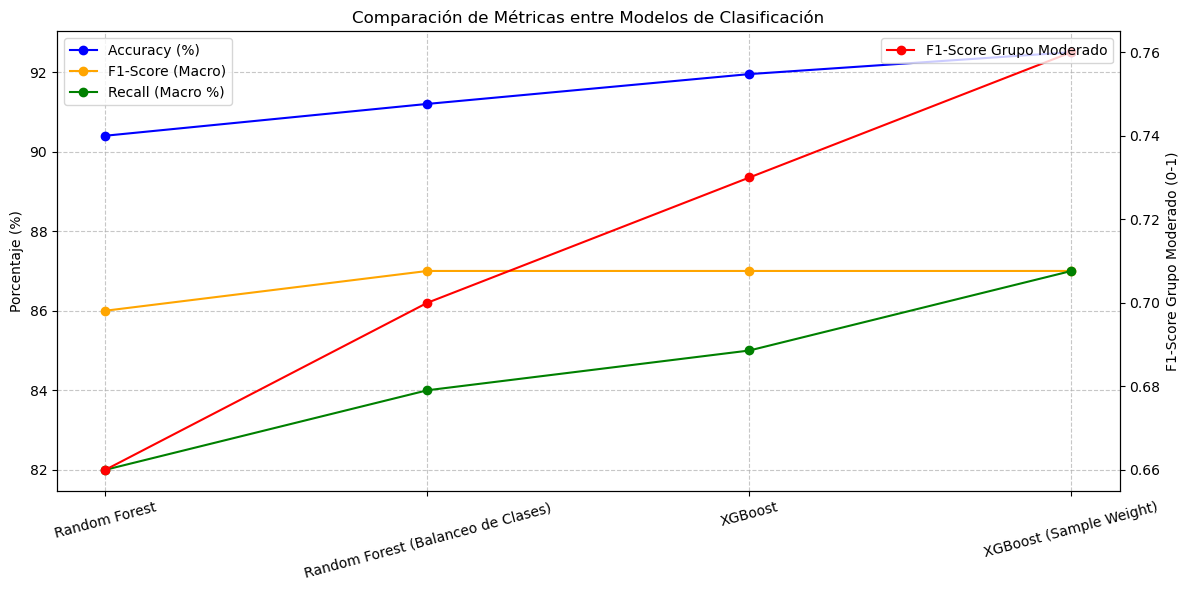

In [185]:
# Crear un diccionario con los datos de las métricas
data = {
    "Modelo": ["Random Forest", "Random Forest (Balanceo de Clases)", "XGBoost", "XGBoost (Sample Weight)"],
    "Accuracy (%)": [90.4, 91.2, 91.95, 92.5],
    "F1-Score (Macro)": [86, 87, 87, 87],
    "Recall (Macro %)": [82, 84, 85, 87],
    "F1-Score Grupo Moderado": [0.66, 0.70, 0.73, 0.76]
}

# Crear un DataFrame con los datos
df_metrics = pd.DataFrame(data)

# Mostrar la tabla
print("Cuadro Comparativo de Métricas de Predicción:")
display(df_metrics)

# Crear un gráfico comparativo con un eje secundario
fig, ax1 = plt.subplots(figsize=(12, 6))

x_labels = data["Modelo"]
x = range(len(x_labels))

# Graficar Accuracy, F1-Score (Macro) y Recall en el eje principal
ax1.plot(x, data["Accuracy (%)"], marker='o', label='Accuracy (%)', color='blue')
ax1.plot(x, data["F1-Score (Macro)"], marker='o', label='F1-Score (Macro)', color='orange')
ax1.plot(x, data["Recall (Macro %)"], marker='o', label='Recall (Macro %)', color='green')
ax1.set_ylabel("Porcentaje (%)")
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=15)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje para F1-Score Grupo Moderado
ax2 = ax1.twinx()
ax2.plot(x, data["F1-Score Grupo Moderado"], marker='o', label='F1-Score Grupo Moderado', color='red')
ax2.set_ylabel("F1-Score Grupo Moderado (0-1)")
ax2.legend(loc='upper right')

# Configurar título y diseño
plt.title("Comparación de Métricas entre Modelos de Clasificación")
plt.tight_layout()

# Mostrar el gráfico
plt.show()



## 7.7.2 Visualización de la importancia de las variables
A continuación visualizamos la importancia de las variables en el modelo XGBoost con sample_weight

In [173]:
# Obtener la importancia de las variables
importance_dict = xgb_clf.get_booster().get_score(importance_type='weight')

# Convertir el diccionario a una lista ordenada de mayor a menor importancia
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Imprimir las variables con su importancia
print("Importancia de las variables (ordenadas de mayor a menor):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Importancia de las variables (ordenadas de mayor a menor):
TENDENCIA_GASTO: 1231.0
CONSUMOSTOTAL: 1039.0
PORCENTAJE_Ficha: 805.0
FRECUENCIA_CONSUMOS: 801.0
RECENCIA: 784.0
RECENCIA_CONSUMOS: 781.0
EMPRESASUNICAS_CONSULT: 433.0
DIASCLIENTE: 369.0
PORCENTAJE_Reporte Financiero: 350.0
PORCENTAJE_Perfil: 306.0
TENDENCIA_GASTO_ES_CERO: 277.0
PORCENTAJE_Reporte Comercial: 237.0
FORMAJURIDICA_EMPRESARIO: 237.0
TENDENCIA_FRECUENCIA: 222.0
PORCENTAJE_Riesgo: 206.0
PORCENTAJE_Balance y CR: 157.0
DEPARTAMENTO_BOGOTA: 132.0
CANAL_REGISTRO_WEB: 97.0
CANAL_REGISTRO_Directorios: 91.0
DESC_SECTOR_COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS: 85.0
DEPARTAMENTO_OTROS DEPARTAMENTOS: 81.0
PORCENTAJE_Perfil Promocional: 79.0
CANAL_REGISTRO_SEM: 79.0
TAMAÑO_GRANDE: 76.0
ANTIGUEDAD_Más de 10 Años: 69.0
DESC_SECTOR_INDUSTRIAS MANUFACTURERAS: 67.0
TAMAÑO_PEQUEÑA: 67.0
TAMAÑO_MEDIANA: 64.0
ANTIGUEDAD_De 5 a 10 Años: 56.0
DESC_SECTOR_ACTIVIDADES DE SERVICIOS ADMINISTRA

<Figure size 1000x800 with 0 Axes>

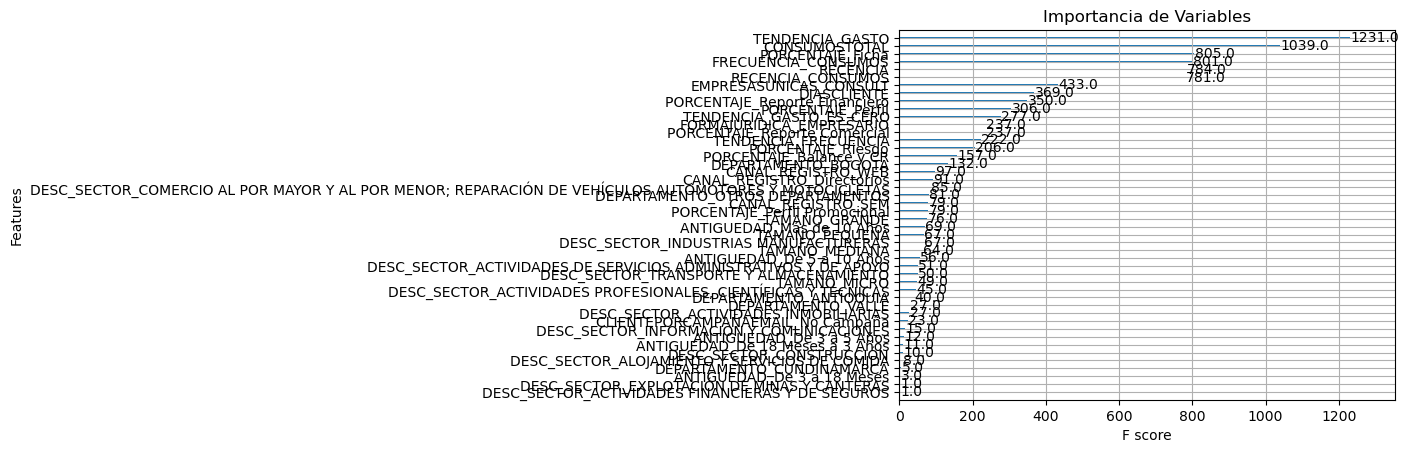

In [158]:
# Visualizar la importancia de las variables
plt.figure(figsize=(10, 8))
plot_importance(xgb_clf, importance_type='weight')
plt.title('Importancia de Variables')
plt.show()

**Interpretación de la Gráfica de Importancia de Variables**

La gráfica de importancia de variables refleja el impacto de cada característica en las predicciones del modelo XGBoost,
basándose en la métrica "weight", que mide la frecuencia con la que se utiliza una variable para dividir los datos
en los árboles de decisión.

**Variables más importantes**
Las variables ubicadas en la parte superior de la gráfica tienen un mayor impacto en la predicción del modelo. Entre ellas destacan:
- **TENDENCIA_GASTO**: Variable más influyente, utilizada con mayor frecuencia en las divisiones de los árboles (1231.0).
- **CONSUMOSTOTAL**: Refleja la actividad económica total del cliente (1039.0).
- **PORCENTAJE_Ficha** y **FRECUENCIA_CONSUMOS**: Representan patrones clave de consulta y frecuencia de actividad (805.0 y 801.0, respectivamente).
- **RECENCIA** y **RECENCIA_CONSUMOS**: Indicadores de la actividad reciente del cliente, con valores de 784.0 y 781.0.

**Variables de importancia moderada**
- **EMPRESASUNICAS_CONSULT**, **DIASCLIENTE**, y **PORCENTAJE_Reporte Financiero**: Capturan aspectos relevantes de las interacciones del cliente con el sistema.
- Variables categóricas relacionadas con el tipo de cliente y canales de registro, como **FORMAJURIDICA_EMPRESARIO** (237.0) y **CANAL_REGISTRO_WEB** (97.0), también tienen una contribución significativa.

**Variables menos importantes**
Las variables en la parte inferior de la lista, como los diferentes sectores de actividad económica (e.g., "ACTIVIDADES FINANCIERAS Y DE SEGUROS", "EXPLOTACIÓN DE MINAS Y CANTERAS") o categorías con menor representación, tuvieron una contribución limitada. Esto puede deberse a su baja variabilidad o relevancia en el conjunto de datos.

**Interpretación general**
- Las variables relacionadas con el comportamiento económico y la actividad reciente del cliente (e.g., TENDENCIA_GASTO, CONSUMOSTOTAL) son las más influyentes, mostrando que son esenciales para predecir el grupo de prioridad de un cliente.
- Las variables categóricas, como el canal de registro o el tamaño de la empresa, tienen un impacto menor pero relevante en ciertos casos específicos.
- La inclusión de diversas características asegura que el modelo capture tanto patrones generales como detalles específicos en el comportamiento de los clientes.


**Conclusión**
La gráfica confirma que las variables numéricas relacionadas con el comportamiento de compra y la actividad reciente del cliente tienen un mayor peso en la clasificación del modelo. La información sobre los productos consultados también juega un papel importante. Variables categóricas, como el sector de actividad, tienen un impacto menor pero siguen contribuyendo al modelo en cierta medida.

Intentaremos ahora obtener más información sobre las variables más imporantes usando SHAP (SHapley Additive exPlanations)

SHAP es una técnica explicativa que proporciona la contribución individual de cada variable a la predicción de cada observación. Es especialmente útil para entender cómo influyen las variables en la determinación del grupo de prioridad.

X_test shape: (584, 62)
SHAP values shape: (584, 62, 3)


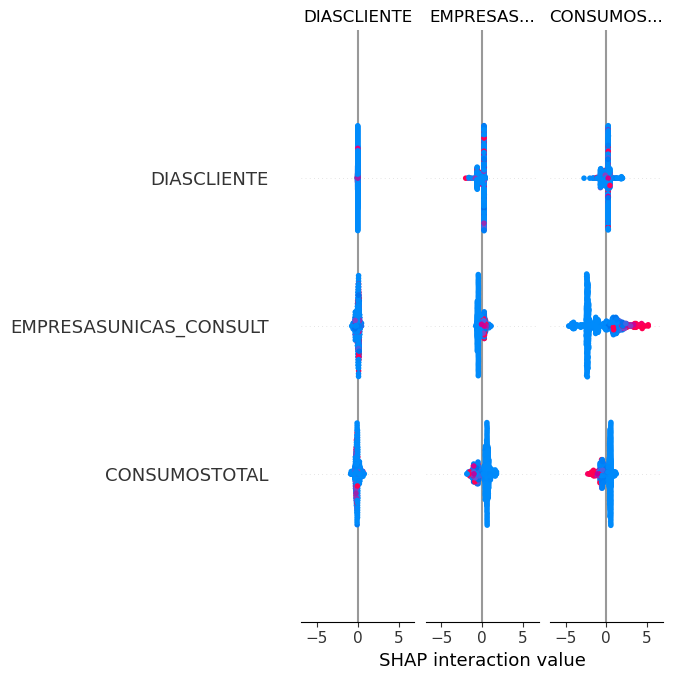

In [161]:
!pip install shap
import shap

# Asegurarse de que X_train y X_test tengan columnas explícitas
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Crear un objeto de SHAP explainer usando TreeExplainer para XGBoost
explainer = shap.TreeExplainer(xgb_clf)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test)

# Convertir X_test a un array NumPy para asegurar compatibilidad
X_test_array = X_test.values

# Verificar dimensiones para debug (opcional)
print("X_test shape:", X_test.shape)
print("SHAP values shape:", np.array(shap_values).shape)

# Visualizar la importancia global de las variables
shap.summary_plot(shap_values, X_test_array, feature_names=X.columns)

**Interpretación de la Gráfica SHAP**

La gráfica **SHAP Summary Plot** proporciona información detallada sobre cómo las variables influyen en las predicciones del modelo **XGBoost**. A continuación, se presenta un análisis de los elementos más relevantes:

---

 **1. Eje Y - Variablesimportantes**
Las variables se ordenan en el eje vertical según su impacto global en las predicciones del modelo. Las más importantes aparecen en la parte superior:

- **DIASCLIENTE**: Es la variable más relevante en la determinación del grupo de prioridad. Un mayor valor (número de días como cliente) parece influir significativamente en la probabilidad de asignación a un grupo específico.
- **EMPRESASUNICAS_CONSULT**: Tiene un impacto considerable, indicando que el número de empresas consultadas por un cliente afecta de forma importante las predicciones.
- **CONSUMOSTOTAL**: El total de consumos realizados también presenta un fuerte impacto en la determinación del grupo de prioridad.

Estas variables tienen una influencia consistente en el modelo y son críticas para distinguir entre los grupos.

---

**2. Eje X - Valores SHAP**
El eje horizontal muestra los **valores SHAP**, que indican la magnitud y la dirección del impacto de cada variable en las predicciones:

- Valores positivos **(SHAP > 0)** desplazan la predicción hacia **mayores probabilidades** de pertenecer a una clase específica (grupo de prioridad alta).
- Valores negativos **(SHAP < 0)** reducen la probabilidad de pertenecer a un grupo de prioridad alta.

---

**3. Distribución de los Valores SHAP**
Los puntos **azules** y **rosados** representan los valores SHAP calculados para cada observación en el conjunto de prueba:

- **Distribución Horizontal**: La dispersión de los puntos en cada variable indica la variabilidad del impacto. Por ejemplo:
   - **DIASCLIENTE** tiene una amplia dispersión, lo que sugiere que esta variable afecta de manera variable a las predicciones (tanto positiva como negativamente).
   - **CONSUMOSTOTAL** muestra una concentración de valores SHAP cercanos a cero y positivos, indicando un impacto estable pero moderado.

- **Colores (Azul-Rosa)**: El color representa el **valor original** de la variable:
   - **Azul**: Valores bajos de la variable.
   - **Rosa**: Valores altos de la variable.

Por ejemplo, en **DIASCLIENTE**:
   - Los valores **altos** (rosados) tienden a desplazar las predicciones hacia el lado positivo (mayor prioridad).
   - Los valores **bajos** (azules) tienden a reducir la probabilidad de pertenencia a un grupo de alta prioridad.

---

**4. Relación con el Modelo**
- La gráfica destaca que las variables **DIASCLIENTE**, **EMPRESASUNICAS_CONSULT** y **CONSUMOSTOTAL** son **factores determinantes** para las predicciones del modelo.
- El comportamiento de los valores SHAP confirma que:
   - **Clientes con más tiempo en la base de datos** (DIASCLIENTE) y **más empresas consultadas** tienen una mayor probabilidad de asignación a grupos de prioridad alta.
   - **El consumo total** también impacta significativamente, aunque con menor dispersión.

---

**Conclusión**
La gráfica **SHAP Summary Plot** permite concluir que las variables **DIASCLIENTE**, **EMPRESASUNICAS_CONSULT** y **CONSUMOSTOTAL** son las características más influyentes para el modelo. Las observaciones con valores altos en estas variables tienden a clasificarse en grupos de **mayor prioridad**, mientras que los valores bajos reducen esta probabilidad.

Este análisis sugiere que el modelo está capturando patrones relevantes y lógicos en los datos, alineados con los criterios esperados del negocio.


# 8. Recomendaciones para CrossSelling, Upselling y Fidelización
## 8.1 Recomendaciones para CrossSelling, Upselling y Fidelización entre los grupos de prioridad moderada y prioridad alta

Para generar recomendaciones específicas sobre cross-selling, upselling y fidelización, necesitamos analizar las características que diferencian a los grupos de prioridad, en particular los clientes de prioridad moderada (Grupo 2) y de alta prioridad (Grupo 3). 

Para ello realizaremos un análisis comparativo entre ambos grupos siguiendo los siguientes pasos:

1. **Subconjuntos por prioridad**:  
   Separamos los datos en dos grupos para facilitar el análisis:  
   - **Grupo Moderado**: Clientes con prioridad moderada.  
   - **Grupo Alta**: Clientes con máxima prioridad.

2. **Cálculo de estadísticas**:  
   Se calcula la **media** de todas las variables numéricas para ambos grupos con el objetivo de identificar **diferencias clave** en su comportamiento y características.

3. **Diferencia entre medias**:  
   Se calcula la **diferencia entre las medias** de cada variable.  
   Esto permite identificar las variables donde los clientes del **Grupo Alta** superan significativamente a los del **Grupo Moderado**.

4. **Visualización**:  
   Se utiliza un **gráfico de barras horizontales** para destacar:  
   - Las variables con **mayor diferencia de valores medios**.  
   - Las áreas donde los clientes de alta prioridad muestran un comportamiento superior.  

   Esta representación facilita la identificación rápida de las **áreas clave** para generar recomendaciones enfocadas en **cross-selling**, **upselling** y **fidelización**.

Comparación de Medias entre Grupo Moderado y Grupo Alta Prioridad:
                               Media_Grupo_Moderada  Media_Grupo_Alta  \
CONSUMOSTOTAL                                 31.66             96.76   
EMPRESASUNICAS_CONSULT                        20.28             39.42   
TENDENCIA_GASTO                               -7.20             -1.89   
GRUPO_PRIORIDAD                                2.00              3.00   
PORCENTAJE_Ficha                               0.44              0.52   
PORCENTAJE_Reporte Financiero                  0.09              0.12   
PORCENTAJE_Perfil                              0.05              0.08   
PORCENTAJE_Balance y CR                        0.06              0.07   
PORCENTAJE_Riesgo                              0.08              0.09   
TENDENCIA_FRECUENCIA_ES_CERO                   0.00              0.00   

                               Diferencia  
CONSUMOSTOTAL                       65.10  
EMPRESASUNICAS_CONSULT              19.13

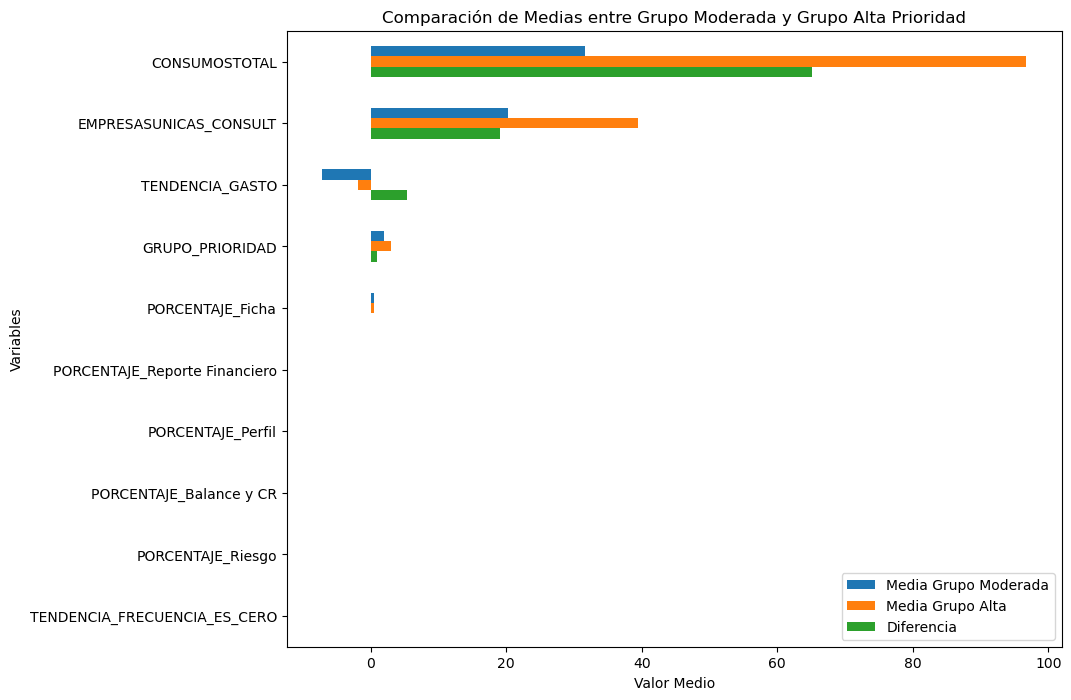

In [164]:
# Crear un subconjunto del dataframe con los grupos de prioridad moderada (2) y alta prioridad (3)
grupo_moderada = clientes_modelo_agrupados_df[clientes_modelo_agrupados_df['GRUPO_PRIORIDAD'] == 2]
grupo_alta = clientes_modelo_agrupados_df[clientes_modelo_agrupados_df['GRUPO_PRIORIDAD'] == 3]

# Calcular estadísticas descriptivas para las variables numéricas
estadisticas_moderada = grupo_moderada.describe()
estadisticas_alta = grupo_alta.describe()

# Comparar la media de cada variable entre los dos grupos
comparacion_medias = pd.DataFrame({
    "Media_Grupo_Moderada": estadisticas_moderada.loc['mean'],
    "Media_Grupo_Alta": estadisticas_alta.loc['mean'],
    "Diferencia": estadisticas_alta.loc['mean'] - estadisticas_moderada.loc['mean']
})

# Ordenar por la mayor diferencia para ver las variables más relevantes
comparacion_medias_ordenadas = comparacion_medias.sort_values(by="Diferencia", ascending=False)

# Mostrar las primeras variables con mayor diferencia
print("Comparación de Medias entre Grupo Moderado y Grupo Alta Prioridad:")
print(comparacion_medias_ordenadas.head(10))

# Visualizar la comparación entre los grupos (opcional)
import matplotlib.pyplot as plt

# Crear un gráfico de barras para las diferencias en las variables más relevantes
comparacion_medias_ordenadas.head(10).plot(kind='barh', figsize=(10, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Comparación de Medias entre Grupo Moderada y Grupo Alta Prioridad")
plt.xlabel("Valor Medio")
plt.ylabel("Variables")
plt.gca().invert_yaxis()
plt.legend(["Media Grupo Moderada", "Media Grupo Alta", "Diferencia"])
plt.show()

A partir de la comparación de medias entre los grupos **prioridad moderada** y **prioridad alta**, identificamos las variables clave que explican las diferencias. A continuación, se detallan estrategias específicas para hacer que los clientes del **grupo moderado** asciendan al **grupo alta prioridad**.

---

**Upselling**: Incrementar el Volumen y Frecuencia de Compras
- **Hallazgo clave**:  
  La variable **`CONSUMOSTOTAL`** presenta una diferencia significativa de **65.10** puntos entre ambos grupos. Los clientes de alta prioridad tienen un consumo mucho mayor.  

- **Recomendaciones**:
  - Implementar **descuentos por volumen** o **promociones escalonadas** que incentiven a los clientes del grupo moderado a aumentar su nivel de consumo.
  - Ofrecer **productos premium** o paquetes con beneficios exclusivos.
  - Crear **programas de lealtad** que recompensen el aumento en el volumen de compras.

---

**Cross-Selling**: Diversificación en la Compra de Productos/Servicios
- **Hallazgo clave**:  
  La variable **`EMPRESASUNICAS_CONSULT`** muestra una diferencia de **19.13**, indicando que los clientes de alta prioridad interactúan con un mayor número de empresas o servicios.  

- **Recomendaciones**:
  - Promover productos o servicios **complementarios** mediante **campañas personalizadas**.
  - Implementar análisis de patrones de compra para ofrecer **recomendaciones** de servicios adicionales que suelen consumir los clientes de alta prioridad.
  - Ofrecer **pruebas gratuitas** o descuentos en servicios/productos que aún no han adquirido.

---

**Fidelización**: Mejorar la Recurrencia y Satisfacción del Cliente
- **Hallazgo clave**:  
  La variable **`TENDENCIA_GASTO`** presenta una diferencia positiva de **5.31**, lo que indica que los clientes de alta prioridad mantienen un gasto más constante.  

- **Recomendaciones**:
  - Diseñar estrategias de **fidelización a largo plazo** que premien la regularidad en el gasto (programas de puntos, suscripciones, etc.).
  - Monitorear a los clientes con **tendencia de gasto negativa** y ofrecer **promociones personalizadas** para reactivarlos.
  - Crear **comunicaciones proactivas** para incentivar la actividad y prevenir la pérdida de clientes.

---

**Optimización de la oferta de productos y servicios**
- **Hallazgo clave**:  
  Las variables **`PORCENTAJE_Ficha`**, **`PORCENTAJE_Reporte Financiero`** y **`PORCENTAJE_Perfil`** muestran diferencias moderadas entre los grupos, lo que sugiere una oportunidad de mejora en la oferta de productos.  

- **Recomendaciones**:
  - Identificar y promover los **servicios más utilizados** por clientes de alta prioridad a los clientes del grupo moderado.
  - Diseñar **paquetes combinados** que incluyan estos servicios clave con beneficios adicionales.
  - Personalizar las ofertas en función de las necesidades específicas de cada cliente según su sector.

---

Resumen visual de prioridades
La gráfica muestra que **`CONSUMOSTOTAL`** y **`EMPRESASUNICAS_CONSULT`** son las variables con **mayor impacto**, seguidas por **`TENDENCIA_GASTO`**. Estas áreas son las más críticas para enfocar las estrategias de **upselling**, **cross-selling** y **fidelización**.  

Implementando estrategias como **descuentos escalonados**, **promociones personalizadas** y **programas de fidelización**, se pueden incentivar a los clientes del grupo moderado a aumentar su consumo, diversificar sus compras y mejorar su recurrencia, acercándolos al grupo de alta prioridad.


## 8.2 Recomendaciones para CrossSelling, Upselling y Fidelización entre los grupos de prioridad baja y prioridad moderada

Ahora nos centraremos en los grupos de prioridad baja (los clientes con un número bajo de compras) con los de prioridad moderada (consumo moderado).

Comparación de Medias entre Grupo Baja y Grupo Moderada:
                               Media_Grupo_Baja  Media_Grupo_Moderada  \
RECENCIA_CONSUMOS                        331.44                699.97   
CONSUMOSTOTAL                             14.04                 31.66   
EMPRESASUNICAS_CONSULT                    10.80                 20.28   
DIASCLIENTE                               99.08                106.31   
GRUPO_PRIORIDAD                            1.00                  2.00   
TENDENCIA_FRECUENCIA                       0.05                  1.00   
FRECUENCIA_CONSUMOS                        0.61                  1.28   
PORCENTAJE_Ficha                           0.23                  0.44   
PORCENTAJE_Reporte Financiero              0.02                  0.09   
PORCENTAJE_Riesgo                          0.02                  0.08   

                               Diferencia  
RECENCIA_CONSUMOS                  368.53  
CONSUMOSTOTAL                       17.63  
EMPRESA

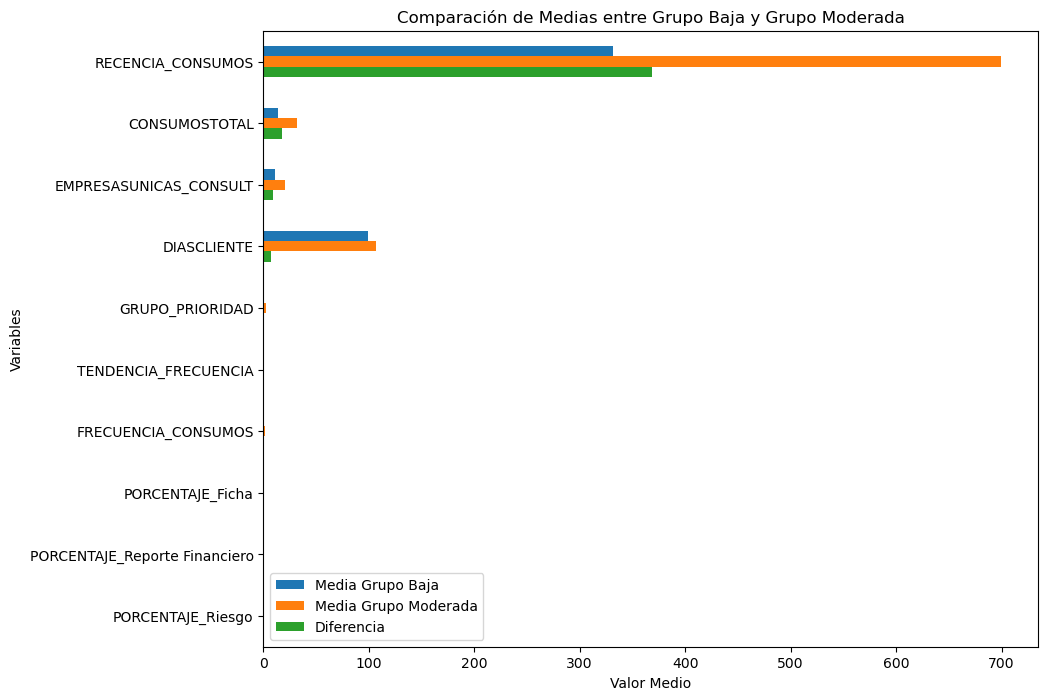

In [167]:
# Crear un subconjunto del dataframe con los grupos de prioridad baja (1) y moderada (2)
grupo_baja = clientes_modelo_agrupados_df[clientes_modelo_agrupados_df['GRUPO_PRIORIDAD'] == 1]
grupo_moderada = clientes_modelo_agrupados_df[clientes_modelo_agrupados_df['GRUPO_PRIORIDAD'] == 2]

# Calcular estadísticas descriptivas para las variables numéricas
estadisticas_baja = grupo_baja.describe()
estadisticas_moderada = grupo_moderada.describe()

# Comparar la media de cada variable entre los dos grupos
comparacion_medias = pd.DataFrame({
    "Media_Grupo_Baja": estadisticas_baja.loc['mean'],
    "Media_Grupo_Moderada": estadisticas_moderada.loc['mean'],
    "Diferencia": estadisticas_moderada.loc['mean'] - estadisticas_baja.loc['mean']
})

# Ordenar por la mayor diferencia para ver las variables más relevantes
comparacion_medias_ordenadas = comparacion_medias.sort_values(by="Diferencia", ascending=False)

# Mostrar las primeras variables con mayor diferencia
print("Comparación de Medias entre Grupo Baja y Grupo Moderada:")
print(comparacion_medias_ordenadas.head(10))

# Visualizar la comparación entre los grupos
import matplotlib.pyplot as plt

# Crear un gráfico de barras para las diferencias en las variables más relevantes
comparacion_medias_ordenadas.head(10).plot(kind='barh', figsize=(10, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Comparación de Medias entre Grupo Baja y Grupo Moderada")
plt.xlabel("Valor Medio")
plt.ylabel("Variables")
plt.gca().invert_yaxis()
plt.legend(["Media Grupo Baja", "Media Grupo Moderada", "Diferencia"])
plt.show()


**Recomendaciones de CrossSelling, Upselling y Fidelización**  

---

**Mejorar la Recencia de Consumos**

**Hallazgo clave**: El grupo de baja prioridad tiene un mayor tiempo sin realizar consumos.  
**Acciones**:  
- Ofrecer **recordatorios personalizados** y promociones limitadas en el tiempo para reactivar clientes inactivos.  
- Implementar **campañas de email marketing** con recomendaciones basadas en su historial de compras.  
- Proporcionar **descuentos exclusivos** para incentivar una próxima compra.  

---

**Incrementar el Consumo Total**

**Hallazgo claveo**: Los clientes de baja prioridad gastan considerablemente menos.  
**Acciones**:  
- Aplicar estrategias de **upselling**, promoviendo productos más avanzados o premium.  
- Implementar **descuentos por volumen** para animar a compras más grandes.  
- Ofrecer **programas de recompensas** para aumentar el ticket promedio, como puntos acumulativos.  

---

**Aumentar la Frecuencia de Consumos**  

**Hallazgo clave**: Los clientes de baja prioridad compran con menor frecuencia.  
**Acciones**:  
- Introducir **campañas de suscripción** o planes con ventajas recurrentes.  
- Crear **recordatorios automatizados** y ofertas mensuales.  
- Lanzar **campañas de fidelización** con incentivos a clientes que realicen compras periódicas.  

---

**Promover el Uso de Productos Específicos** 

**Hallazgo clave**: Los clientes de prioridad moderada utilizan más los productos **Ficha**, **Reporte Financiero** y **Riesgo**.  
**Acciones**:  
- Implementar **cross-selling**, recomendando estos productos a los clientes de baja prioridad.  
- Ofrecer **paquetes promocionales** que incluyan los productos clave con descuento.  
- Mostrar **casos de éxito** y beneficios claros de estos productos mediante contenidos informativos.  

---

**Fortalecer la Relación con el Cliente**  

**Hallazgo clave**: Los clientes moderados tienen una relación un poco más larga con la empresa.  
**Acciones**:  
- Implementar programas de **customer success** para acompañar al cliente en su ciclo de vida.  
- Ofrecer **atención personalizada** y soporte proactivo para mejorar su experiencia.  
- Desarrollar programas de **fidelización** con beneficios a largo plazo, como membresías o recompensas exclusivas.  

---

**Conclusión**  

El objetivo es **reducir la recencia de los consumos**, **aumentar la frecuencia** y **promover productos clave** que destacan en el grupo moderado. Estrategias de **cross-selling**, **upselling** y **fidelización** enfocadas en las variables identificadas pueden convertir a clientes de **baja prioridad** en clientes **moderados** y, eventualmente, de **alta prioridad**.  


Python 3.12.7
